In [2]:
import pandas as pd

In [3]:
KCPDDataset2024 = pd.read_csv("datasets/KCPD_Crime_Data_2024_20241027.csv", low_memory=False)
KCPDDataset2023 = pd.read_csv("datasets/KCPD_Crime_Data_2023_20241027.csv", low_memory=False)
KCPDDataset2022 = pd.read_csv("datasets/KCPD_Crime_Data_2022_20241027.csv", low_memory=False)
KCPDDataset2021 = pd.read_csv("datasets/KCPD_Crime_Data_2021_20241027.csv", low_memory=False)
KCPDDataset2020 = pd.read_csv("datasets/KCPD_Crime_Data_2020_20241027.csv", low_memory=False)


In [4]:
print(KCPDDataset2024.shape)
print(KCPDDataset2023.shape)
print(KCPDDataset2023.shape)
print(KCPDDataset2021.shape)
print(KCPDDataset2020.shape)


(89126, 24)
(108702, 24)
(108702, 24)
(92127, 24)
(96220, 23)


In [5]:
for dataset in [KCPDDataset2024, KCPDDataset2023, KCPDDataset2022, KCPDDataset2021, KCPDDataset2020]:
    dataset.rename(columns={'Fire Arm Used Flag': 'Firearm_Used_Flag', 'Firearm Used Flag': 'Firearm_Used_Flag','Reported Time' : 'Reported_Time',
                           'From Time':'From_Time','To Time':'To_Time','Zip Code':'Zip_Code'}, inplace=True)

In [6]:
KCDPFinal = pd.concat([KCPDDataset2020, KCPDDataset2021, KCPDDataset2022, KCPDDataset2023, KCPDDataset2024], ignore_index=True, join="inner")


In [7]:
print("The number of columns and rows before cleaning:")
print(KCDPFinal.shape)

The number of columns and rows before cleaning:
(488023, 23)


In [8]:
KCDPFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488023 entries, 0 to 488022
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Report_No          488023 non-null  object 
 1   Reported_Date      488023 non-null  object 
 2   Reported_Time      488023 non-null  object 
 3   From_Date          488017 non-null  object 
 4   From_Time          488017 non-null  object 
 5   To_Date            230928 non-null  object 
 6   To_Time            163382 non-null  object 
 7   Offense            488023 non-null  object 
 8   IBRS               442699 non-null  object 
 9   Description        442699 non-null  object 
 10  Beat               488006 non-null  object 
 11  Address            488023 non-null  object 
 12  City               488020 non-null  object 
 13  Zip_Code           455154 non-null  object 
 14  Rep_Dist           403560 non-null  object 
 15  Area               488010 non-null  object 
 16  DV

In [9]:
# Clean the dataset
KCDPFinal['City'] = 'KANSAS CITY'
KCDPFinal.Sex.fillna('U', inplace=True)
KCDPFinal.Race.fillna('U', inplace=True)
KCDPFinal.Age.fillna(round(KCDPFinal.Age.mean()), inplace=True)

In [10]:
KCDPFinal.drop_duplicates(inplace=True)


In [11]:
# Filter out rows with null values in important columns
important_columns = ['IBRS', 'Rep_Dist', 'From_Time', 'From_Date', 'Beat', 'Area', 'Zip_Code']
KCDPFinal = KCDPFinal.dropna(subset=important_columns)

In [12]:
# Display the number of null values in each feature
print("\nDisplay the null values in each feature\n")
KCDPNulls = KCDPFinal.isnull().sum().sort_values(ascending=False)
print(KCDPNulls)


Display the null values in each feature

To_Time              224425
To_Date              175445
Location              25819
Zip_Code                  0
Firearm_Used_Flag         0
Age                       0
Sex                       0
Race                      0
Involvement               0
DVFlag                    0
Area                      0
Rep_Dist                  0
Report_No                 0
City                      0
Reported_Date             0
Beat                      0
Description               0
IBRS                      0
Offense                   0
From_Time                 0
From_Date                 0
Reported_Time             0
Address                   0
dtype: int64


In [13]:
# Split the date columns into multiple columns
# Reported date
KCDPFinal['Reported_Date'] = pd.to_datetime(KCDPFinal['Reported_Date'], errors='coerce')
KCDPFinal['Reported_year'] = KCDPFinal['Reported_Date'].dt.year
KCDPFinal['Reported_month'] = KCDPFinal['Reported_Date'].dt.month
KCDPFinal['Reported_day'] = KCDPFinal['Reported_Date'].dt.day

In [14]:
# From_Date
KCDPFinal['From_Date'] = pd.to_datetime(KCDPFinal['From_Date'], errors='coerce')
KCDPFinal['From_year'] = KCDPFinal['From_Date'].dt.year
KCDPFinal['From_month'] = KCDPFinal['From_Date'].dt.month
KCDPFinal['From_day'] = KCDPFinal['From_Date'].dt.day

In [15]:
# Drop the original date columns
KCDPFinal.drop(['Reported_Date', 'From_Date'], axis=1, inplace=True)

In [16]:
# Split time columns safely
KCDPFinal[['Reported_hour', 'Reported_minute']] = KCDPFinal['Reported_Time'].str.split(":", n=2, expand=True)
KCDPFinal[['From_hour', 'From_minute']] = KCDPFinal['From_Time'].str.split(":", n=2, expand=True)

In [17]:
# Rearranging the DataFrame to include only useful columns
KCDPFinal = KCDPFinal[['Report_No', 'Reported_year', 'Reported_month', 'Reported_day', 
                       'Reported_hour', 'Reported_minute', 'From_year', 'From_month', 
                       'From_day', 'From_hour', 'From_minute', 'Offense', 'IBRS', 
                       'Description', 'Beat', 'Address', 'City', 'Zip_Code', 
                       'Rep_Dist', 'Area', 'DVFlag', 'Involvement', 
                       'Race', 'Sex', 'Age', 'Firearm_Used_Flag']]

In [18]:
KCDPFinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349567 entries, 1 to 488022
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Report_No          349567 non-null  object 
 1   Reported_year      349567 non-null  int32  
 2   Reported_month     349567 non-null  int32  
 3   Reported_day       349567 non-null  int32  
 4   Reported_hour      349567 non-null  object 
 5   Reported_minute    349567 non-null  object 
 6   From_year          349567 non-null  int32  
 7   From_month         349567 non-null  int32  
 8   From_day           349567 non-null  int32  
 9   From_hour          349567 non-null  object 
 10  From_minute        349567 non-null  object 
 11  Offense            349567 non-null  object 
 12  IBRS               349567 non-null  object 
 13  Description        349567 non-null  object 
 14  Beat               349567 non-null  object 
 15  Address            349567 non-null  object 
 16  City   

In [19]:
KCDPFinal.isnull().sum()

Report_No            0
Reported_year        0
Reported_month       0
Reported_day         0
Reported_hour        0
Reported_minute      0
From_year            0
From_month           0
From_day             0
From_hour            0
From_minute          0
Offense              0
IBRS                 0
Description          0
Beat                 0
Address              0
City                 0
Zip_Code             0
Rep_Dist             0
Area                 0
DVFlag               0
Involvement          0
Race                 0
Sex                  0
Age                  0
Firearm_Used_Flag    0
dtype: int64

In [20]:
KCDPFinal_encoded = KCDPFinal.copy()


In [21]:
from sklearn import preprocessing

categorical_features = ['Offense', 'IBRS', 'Description', 'Beat', 'Area', 'DVFlag', 'Involvement', 'Race', 'Sex', 'Firearm_Used_Flag']
label_encoder = preprocessing.LabelEncoder()

In [22]:
for feature in categorical_features:
    # Fill NaN values and encode the feature
    KCDPFinal_encoded[feature].fillna('Unknown', inplace=True)
    KCDPFinal_encoded[f'{feature}_encoded'] = label_encoder.fit_transform(KCDPFinal_encoded[feature].astype(str))

In [23]:
# Rearrange columns in KCDPFinal_encoded
KCDPFinal_encoded = KCDPFinal_encoded[['Report_No', 'Reported_year', 'Reported_month', 'Reported_day', 
                                       'Reported_hour', 'Reported_minute', 'From_year', 'From_month', 
                                       'From_day', 'From_hour', 'From_minute', 'Offense_encoded', 
                                       'IBRS_encoded', 'Description_encoded', 'Beat_encoded', 
                                       'Zip_Code', 'Rep_Dist', 'Area_encoded', 'DVFlag_encoded', 
                                       'Involvement_encoded', 'Race_encoded', 'Sex_encoded', 
                                       'Age', 'Firearm_Used_Flag_encoded']]

In [24]:
# Save DataFrames to CSV files
output_file_path_original = 'datasets/KCDP_Final_Crime_Data_Original_1.csv'
output_file_path_encoded = 'datasets/KCDP_Final_Crime_Data_Encoded.csv'

In [25]:
KCDPFinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349567 entries, 1 to 488022
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Report_No          349567 non-null  object 
 1   Reported_year      349567 non-null  int32  
 2   Reported_month     349567 non-null  int32  
 3   Reported_day       349567 non-null  int32  
 4   Reported_hour      349567 non-null  object 
 5   Reported_minute    349567 non-null  object 
 6   From_year          349567 non-null  int32  
 7   From_month         349567 non-null  int32  
 8   From_day           349567 non-null  int32  
 9   From_hour          349567 non-null  object 
 10  From_minute        349567 non-null  object 
 11  Offense            349567 non-null  object 
 12  IBRS               349567 non-null  object 
 13  Description        349567 non-null  object 
 14  Beat               349567 non-null  object 
 15  Address            349567 non-null  object 
 16  City   

In [26]:
KCDPFinal_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349567 entries, 1 to 488022
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Report_No                  349567 non-null  object 
 1   Reported_year              349567 non-null  int32  
 2   Reported_month             349567 non-null  int32  
 3   Reported_day               349567 non-null  int32  
 4   Reported_hour              349567 non-null  object 
 5   Reported_minute            349567 non-null  object 
 6   From_year                  349567 non-null  int32  
 7   From_month                 349567 non-null  int32  
 8   From_day                   349567 non-null  int32  
 9   From_hour                  349567 non-null  object 
 10  From_minute                349567 non-null  object 
 11  Offense_encoded            349567 non-null  int32  
 12  IBRS_encoded               349567 non-null  int32  
 13  Description_encoded        349567 

In [27]:

KCDPFinal.to_csv(output_file_path_original, index=False)
KCDPFinal_encoded.to_csv(output_file_path_encoded, index=False)

In [28]:
### visulization

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [30]:
data = pd.read_csv("datasets/KCDP_Final_Crime_Data_Original_1.csv", low_memory=False)


In [31]:
# Filter data for the years 2020 to 2024
filtered_data = data[(data['Reported_year'] >= 2020) & (data['Reported_year'] <= 2024)]

In [32]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349353 entries, 0 to 349566
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Report_No          349353 non-null  object 
 1   Reported_year      349353 non-null  int64  
 2   Reported_month     349353 non-null  int64  
 3   Reported_day       349353 non-null  int64  
 4   Reported_hour      349353 non-null  int64  
 5   Reported_minute    349353 non-null  int64  
 6   From_year          349353 non-null  int64  
 7   From_month         349353 non-null  int64  
 8   From_day           349353 non-null  int64  
 9   From_hour          349353 non-null  int64  
 10  From_minute        349353 non-null  int64  
 11  Offense            349353 non-null  object 
 12  IBRS               349353 non-null  object 
 13  Description        349353 non-null  object 
 14  Beat               349353 non-null  float64
 15  Address            349353 non-null  object 
 16  City   

In [33]:
# Check unique years in filtered_data
unique_years = filtered_data['Reported_year'].unique()
print("Unique years in filtered data:", unique_years)


Unique years in filtered data: [2020 2021 2022 2023 2024]


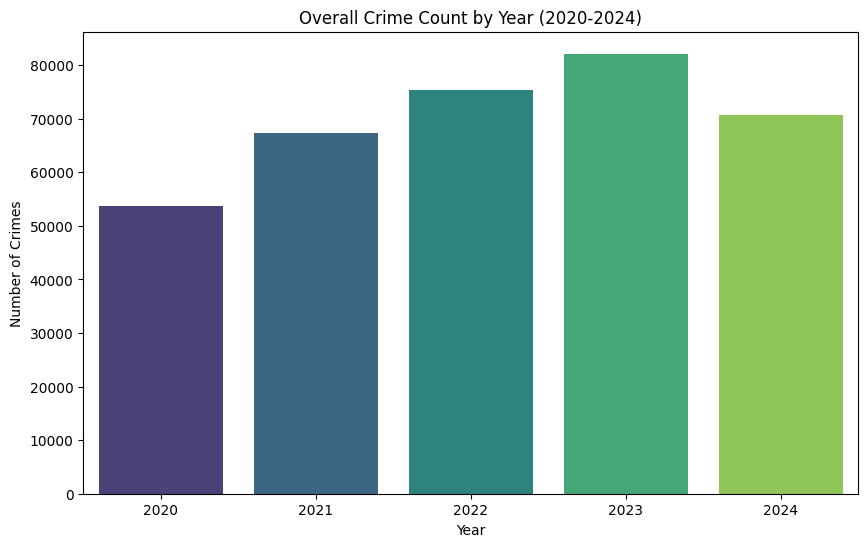

In [34]:
# 1. Overall Crime Count by Year
plt.figure(figsize=(10, 6))
sns.countplot(x='Reported_year', data=filtered_data, palette="viridis")
plt.title('Overall Crime Count by Year (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

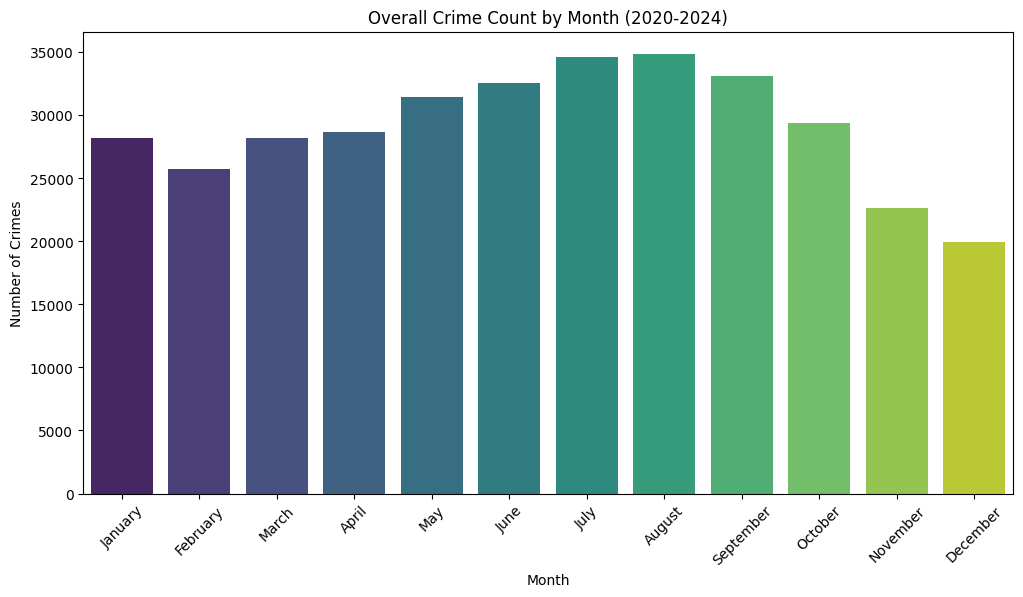

In [35]:
# 2. Crime Count by Month (Across All Years)
plt.figure(figsize=(12, 6))
sns.countplot(x='Reported_month', data=filtered_data, palette="viridis")
plt.title('Overall Crime Count by Month (2020-2024)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=np.arange(12), labels=[calendar.month_name[i + 1] for i in range(12)], rotation=45)
plt.show()

C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\642867554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'Age_Group'] = pd.cut(filtered_data['Age'], bins=age_bins, labels=age_labels)


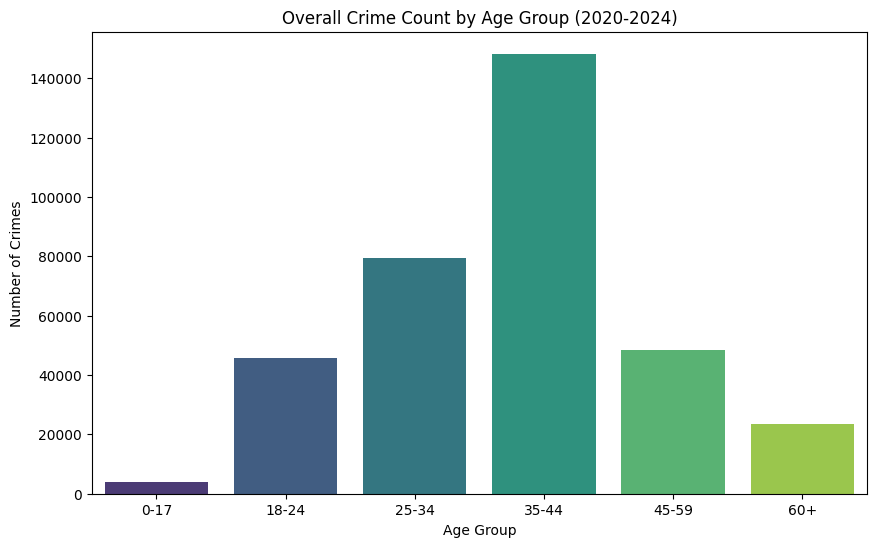

In [36]:
# Age Group Creation without warning
age_bins = [0, 18, 25, 35, 45, 60, 100]
age_labels = ['0-17', '18-24', '25-34', '35-44', '45-59', '60+']
filtered_data.loc[:, 'Age_Group'] = pd.cut(filtered_data['Age'], bins=age_bins, labels=age_labels)

# 3. Overall Crime Count by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', data=filtered_data, palette="viridis")
plt.title('Overall Crime Count by Age Group (2020-2024)')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.show()

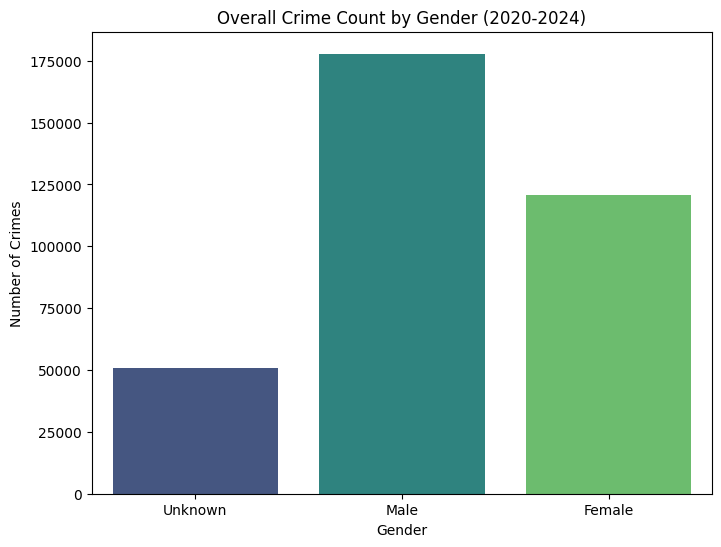

In [37]:
# 4. Gender Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=filtered_data, palette="viridis")
plt.title('Overall Crime Count by Gender (2020-2024)')
plt.xlabel('Gender')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=[0, 1, 2], labels=['Unknown', 'Male', 'Female'])
plt.show()

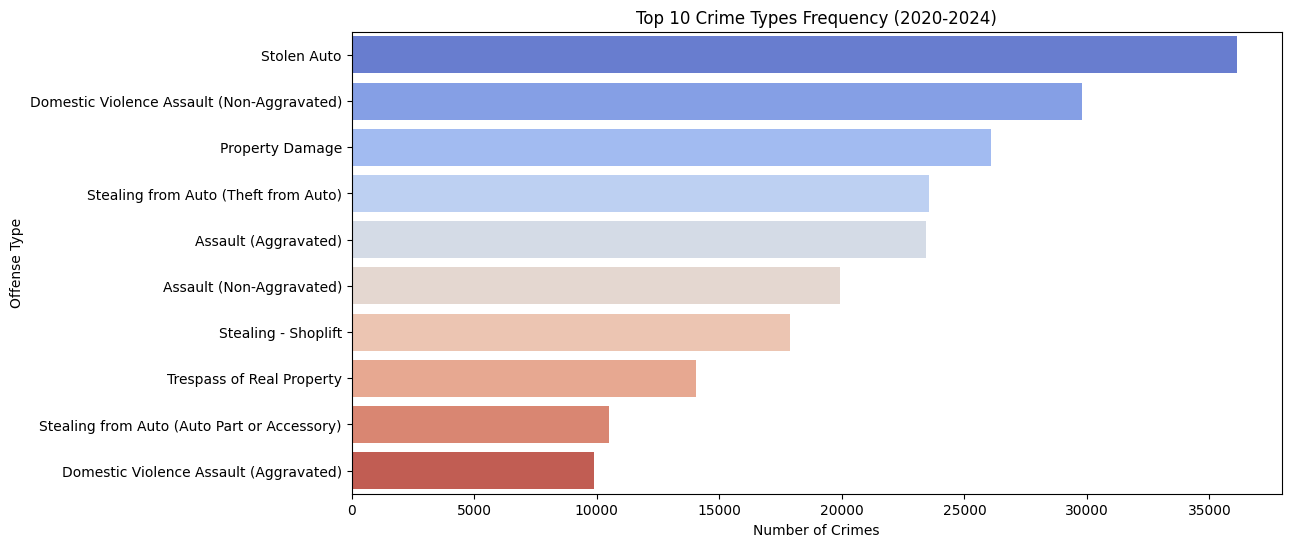

In [38]:
# 5. Top 10 Offense Types
top_10_offenses = filtered_data['Offense'].value_counts().nlargest(10).index
top_10_data = filtered_data[filtered_data['Offense'].isin(top_10_offenses)]

plt.figure(figsize=(12, 6))
sns.countplot(y='Offense', data=top_10_data, order=top_10_offenses, palette="coolwarm")
plt.title('Top 10 Crime Types Frequency (2020-2024)')
plt.xlabel('Number of Crimes')
plt.ylabel('Offense Type')
plt.show()


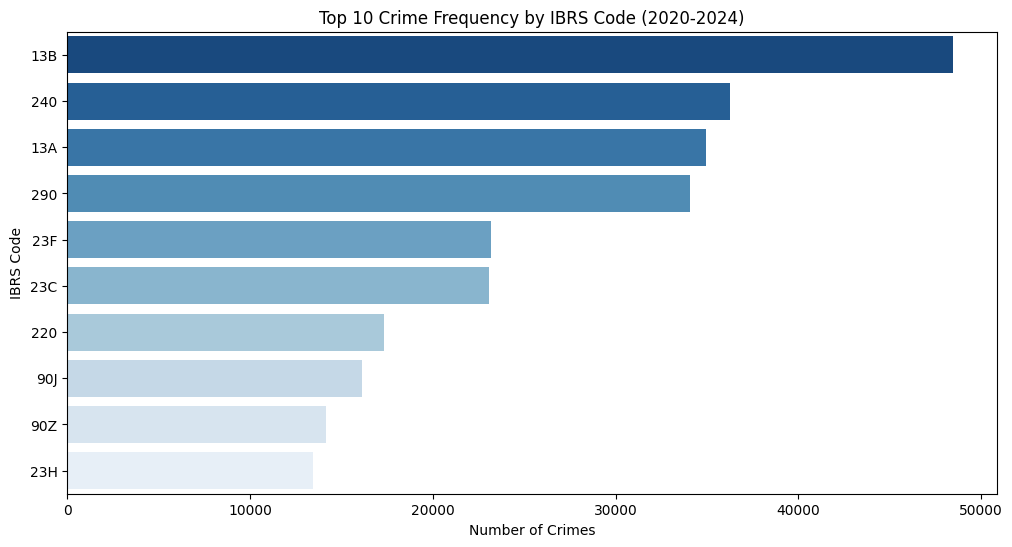

In [39]:
# 6. Top 10 IBRS Codes
top_10_IBRS = filtered_data['IBRS'].value_counts().nlargest(10).index
top_10_IBRS_data = filtered_data[filtered_data['IBRS'].isin(top_10_IBRS)]

plt.figure(figsize=(12, 6))
sns.countplot(y='IBRS', data=top_10_IBRS_data, order=top_10_IBRS, palette="Blues_r")
plt.title('Top 10 Crime Frequency by IBRS Code (2020-2024)')
plt.xlabel('Number of Crimes')
plt.ylabel('IBRS Code')
plt.show()


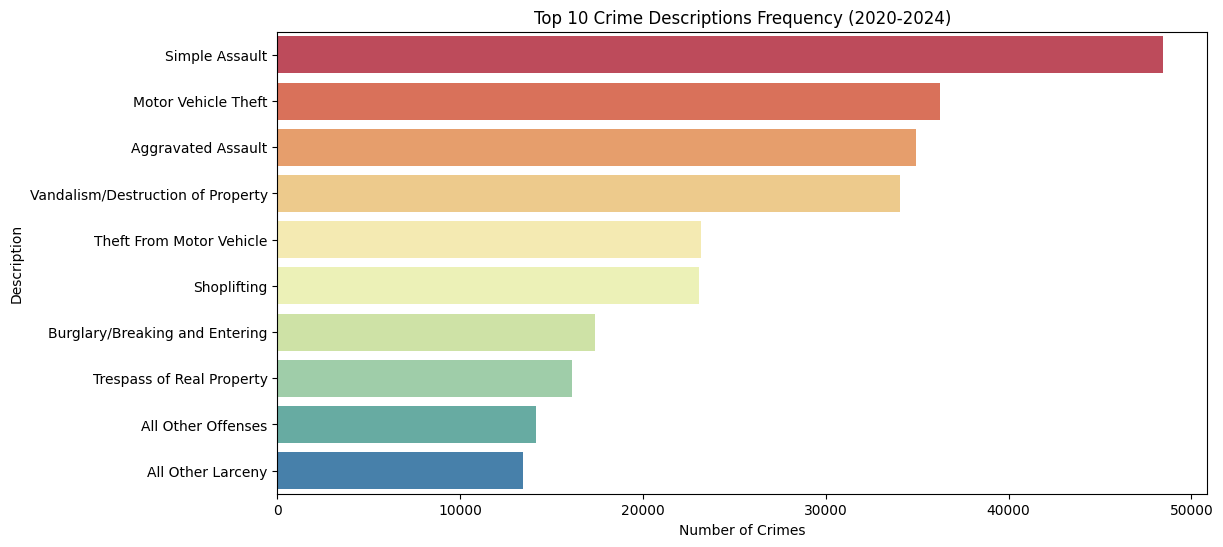

In [40]:
# 7. Top 10 Crime Descriptions
top_10_descriptions = filtered_data['Description'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.countplot(y='Description', data=filtered_data[filtered_data['Description'].isin(top_10_descriptions)],
                order=top_10_descriptions, palette="Spectral")
plt.title('Top 10 Crime Descriptions Frequency (2020-2024)')
plt.xlabel('Number of Crimes')
plt.ylabel('Description')
plt.show()

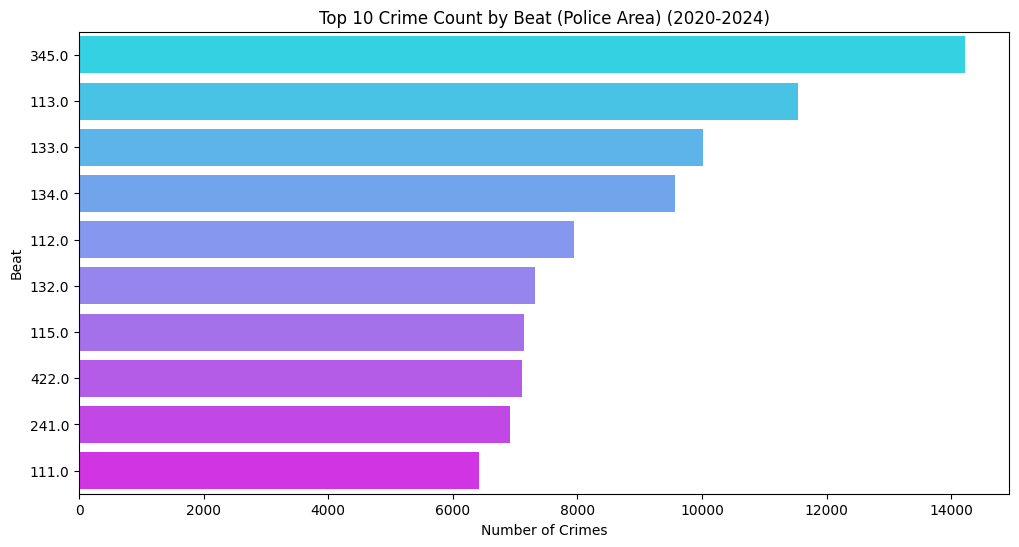

In [41]:
# 8. Top 10 Police Beats
top_10_beats = filtered_data['Beat'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.countplot(y='Beat', data=filtered_data[filtered_data['Beat'].isin(top_10_beats)],
                order=top_10_beats, palette="cool")
plt.title('Top 10 Crime Count by Beat (Police Area) (2020-2024)')
plt.xlabel('Number of Crimes')
plt.ylabel('Beat')
plt.show()

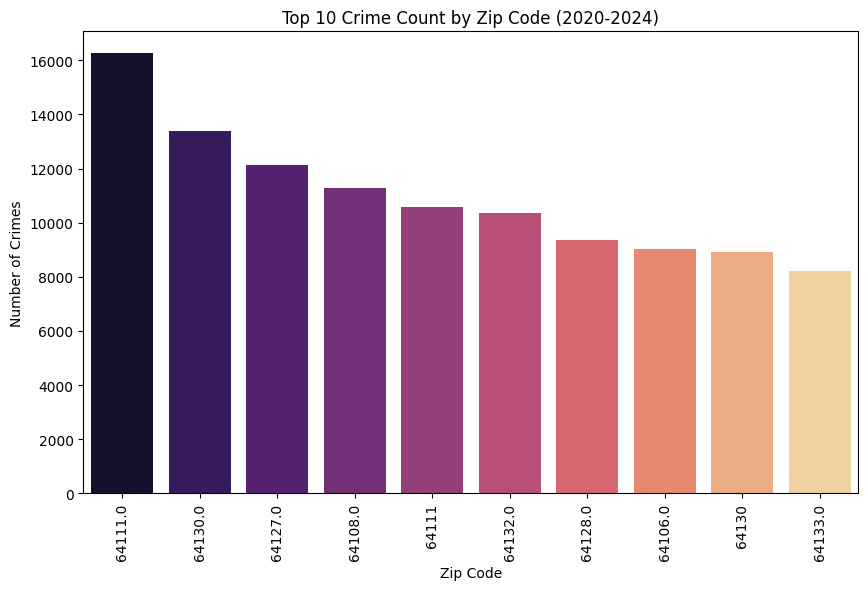

In [42]:
# Get the top 10 zip codes by crime count
top_10_zip_codes = filtered_data['Zip_Code'].value_counts().nlargest(10).index

# Plotting the top 10 zip codes
plt.figure(figsize=(10, 6))
sns.countplot(x='Zip_Code', data=filtered_data[filtered_data['Zip_Code'].isin(top_10_zip_codes)],
                order=top_10_zip_codes, palette="magma")
plt.title('Top 10 Crime Count by Zip Code (2020-2024)')
plt.xlabel('Zip Code')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

In [43]:
# Check unique years in filtered_data
unique_years = filtered_data['Reported_year'].unique()
print("Unique years in filtered data:", unique_years)


Unique years in filtered data: [2020 2021 2022 2023 2024]


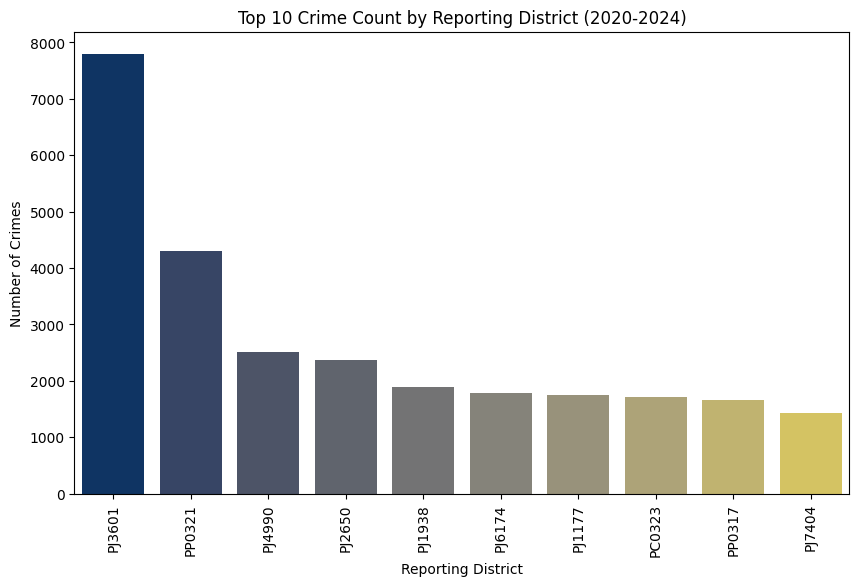

In [44]:
# 10. Crimes by Reporting District
top_10_rep_districts = filtered_data['Rep_Dist'].value_counts().nlargest(10).index

plt.figure(figsize=(10, 6))
sns.countplot(x='Rep_Dist', data=filtered_data[filtered_data['Rep_Dist'].isin(top_10_rep_districts)],
                order=top_10_rep_districts, palette="cividis")
plt.title('Top 10 Crime Count by Reporting District (2020-2024)')
plt.xlabel('Reporting District')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

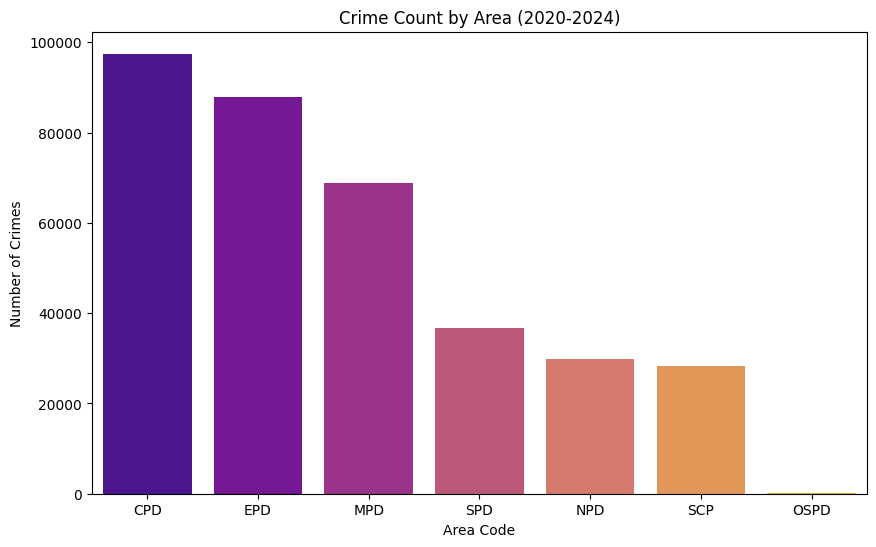

In [45]:
# 11. Crimes by Area Code
plt.figure(figsize=(10, 6))
sns.countplot(x='Area', data=filtered_data, order=filtered_data['Area'].value_counts().index, palette="plasma")
plt.title('Crime Count by Area (2020-2024)')
plt.xlabel('Area Code')
plt.ylabel('Number of Crimes')
plt.show()

C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\3487860529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DVFlag'] = filtered_data['DVFlag'].replace({'Y': True, 'True': True, 'N': False, 'False': False})


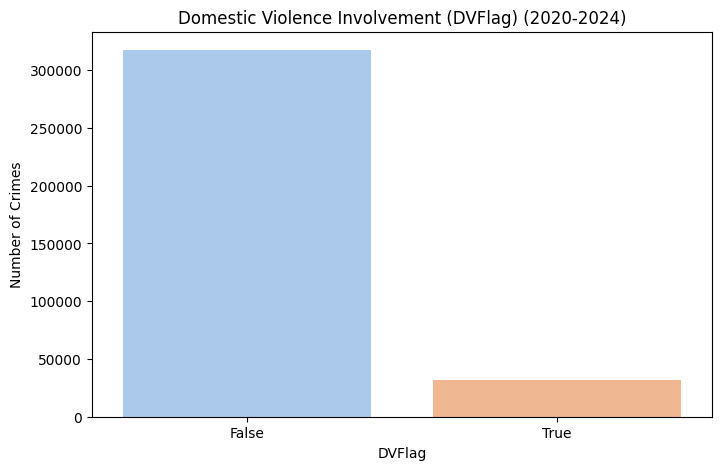

In [46]:
# Map values in DVFlag to True or False
filtered_data['DVFlag'] = filtered_data['DVFlag'].replace({'Y': True, 'True': True, 'N': False, 'False': False})

# Plot DVFlag after combining values
plt.figure(figsize=(8, 5))
sns.countplot(x='DVFlag', data=filtered_data, palette="pastel")
plt.title('Domestic Violence Involvement (DVFlag) (2020-2024)')
plt.xlabel('DVFlag')
plt.ylabel('Number of Crimes')
plt.xticks([0, 1], ['False', 'True'])
plt.show()


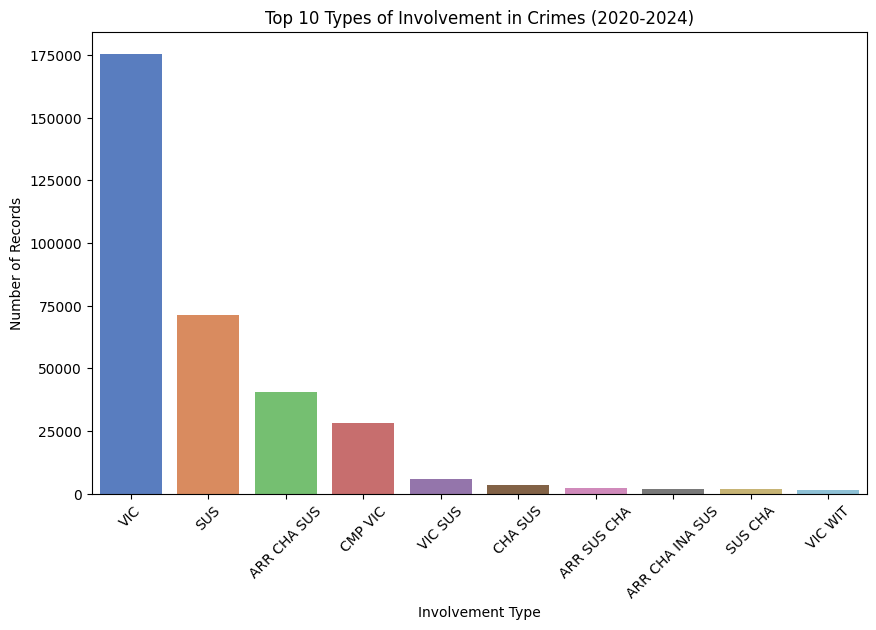

In [47]:
# 13. Involvement Type Frequency
top_10_involvement_types = filtered_data['Involvement'].value_counts().nlargest(10).index

plt.figure(figsize=(10, 6))
sns.countplot(x='Involvement', data=filtered_data[filtered_data['Involvement'].isin(top_10_involvement_types)],
                order=top_10_involvement_types, palette="muted")
plt.title('Top 10 Types of Involvement in Crimes (2020-2024)')
plt.xlabel('Involvement Type')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.show()

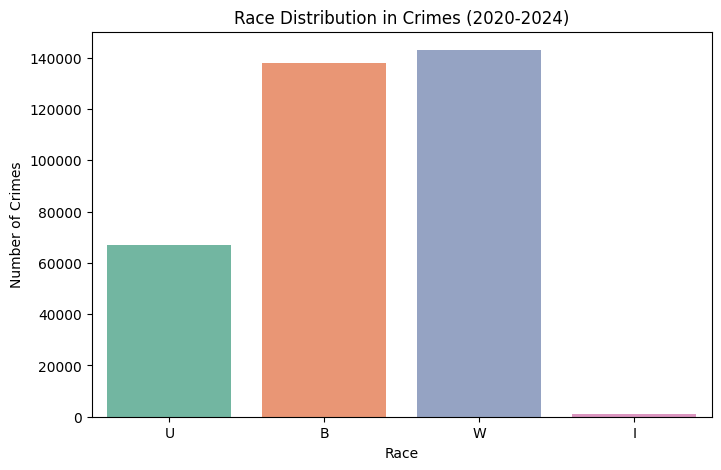

In [48]:
# 14. Race Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Race', data=filtered_data, palette="Set2")
plt.title('Race Distribution in Crimes (2020-2024)')
plt.xlabel('Race')
plt.ylabel('Number of Crimes')
plt.show()

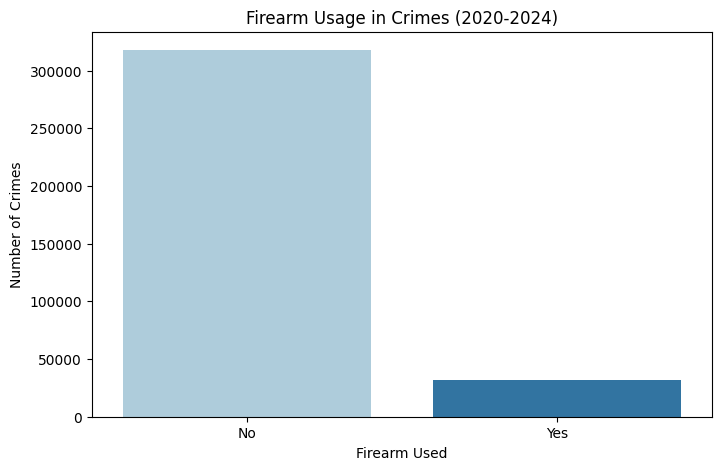

In [49]:
# 15. Firearm Usage Flag
plt.figure(figsize=(8, 5))
sns.countplot(x='Firearm_Used_Flag', data=filtered_data, palette="Paired")
plt.title('Firearm Usage in Crimes (2020-2024)')
plt.xlabel('Firearm Used')
plt.ylabel('Number of Crimes')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [50]:
###  year wise analysis of data


### Crime Analysis for Year 2020 ###



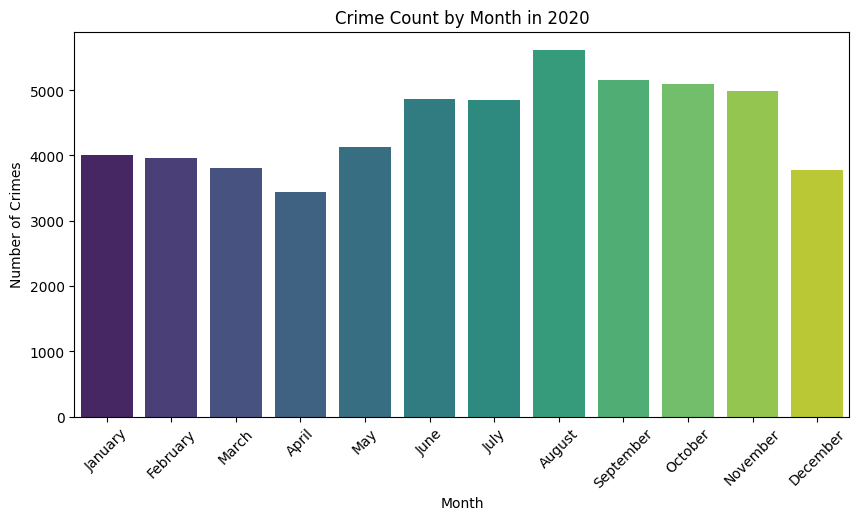

C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\2355513593.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Age_Group'] = pd.cut(year_data['Age'], bins=age_bins, labels=age_labels)


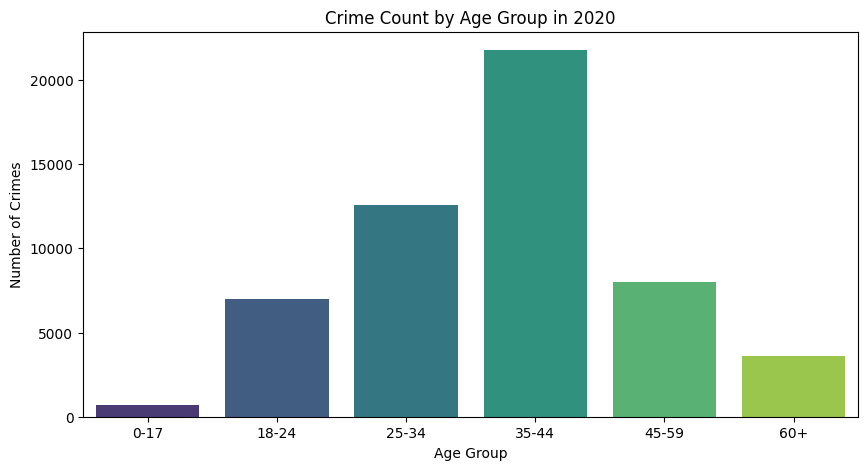

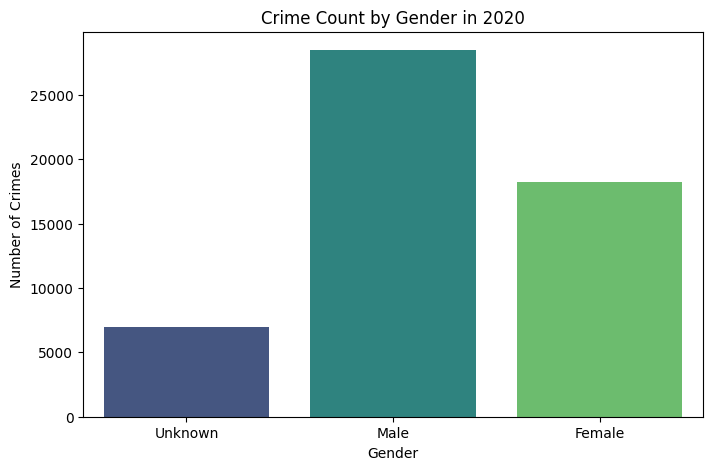

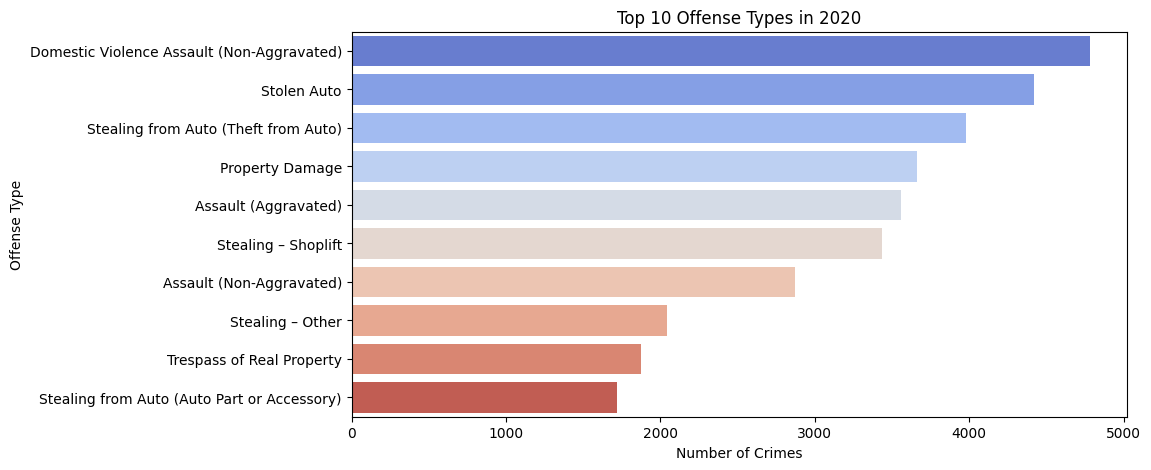

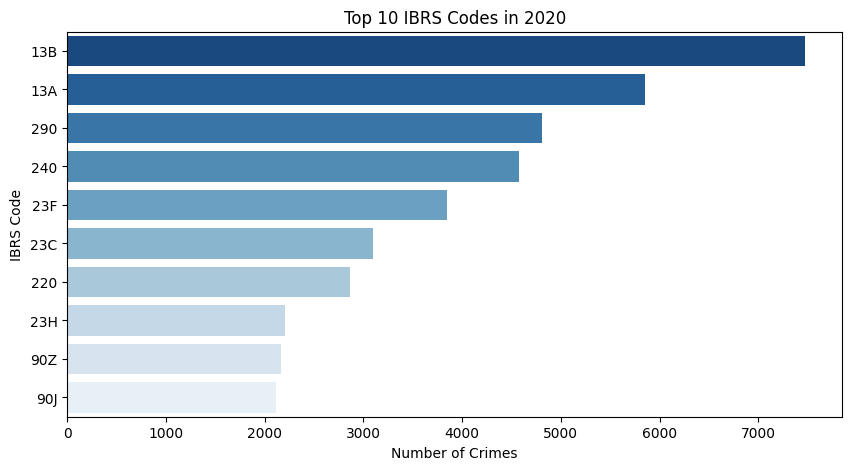

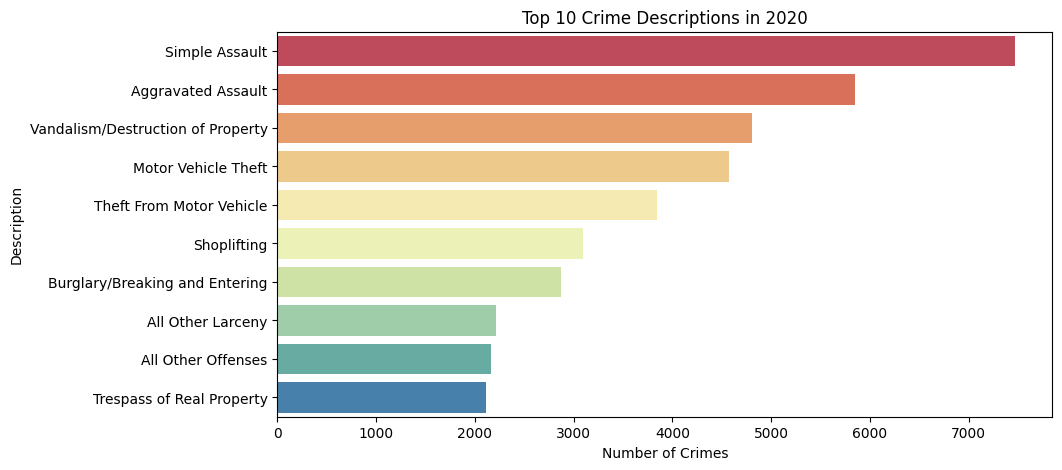

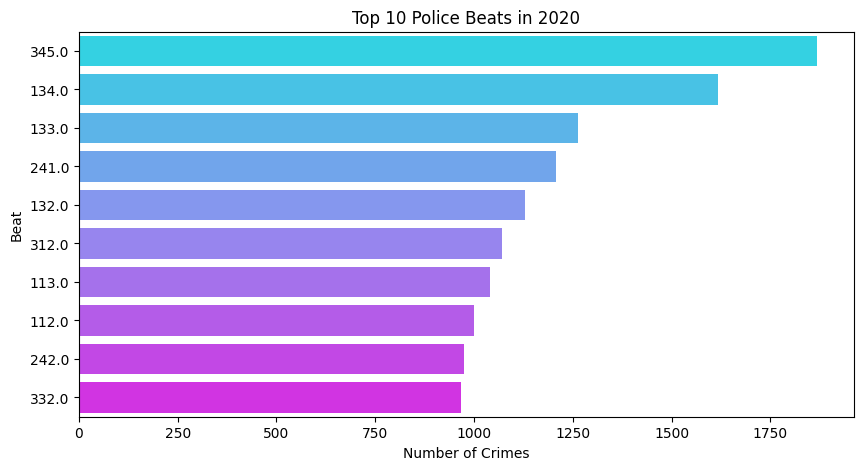

C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\2355513593.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Zip_Code'] = year_data['Zip_Code'].astype(str)  # Keep as string for leading zeros


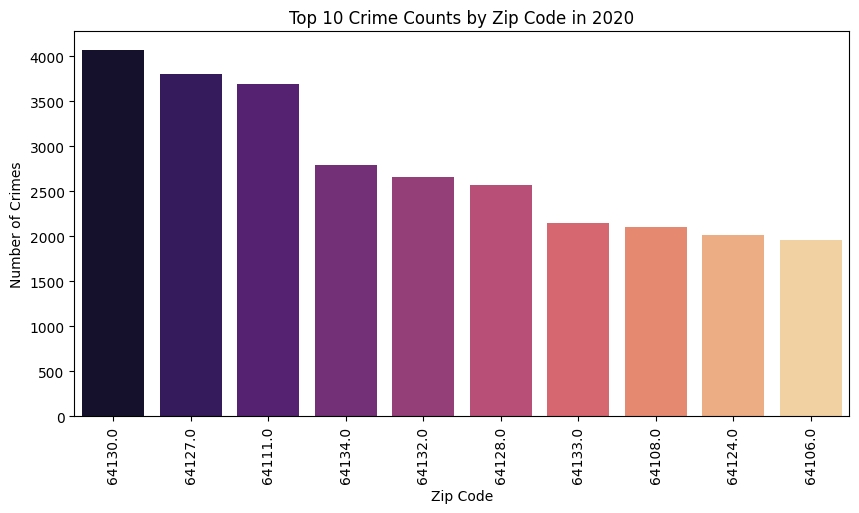

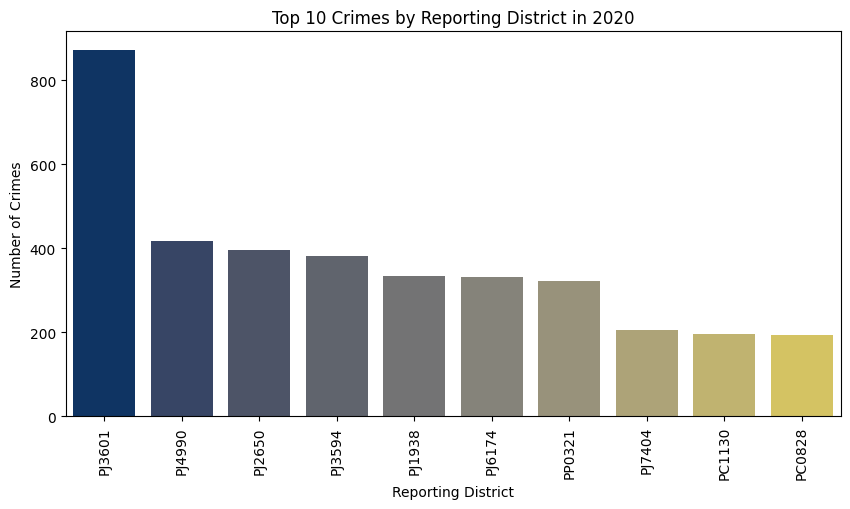

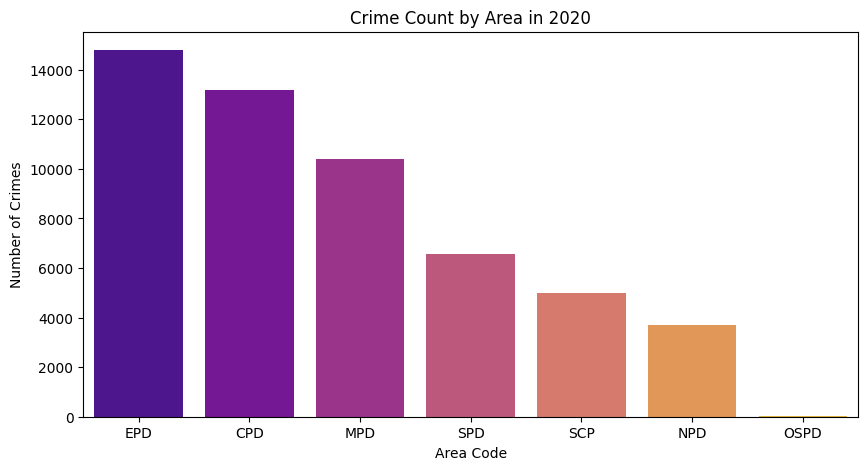

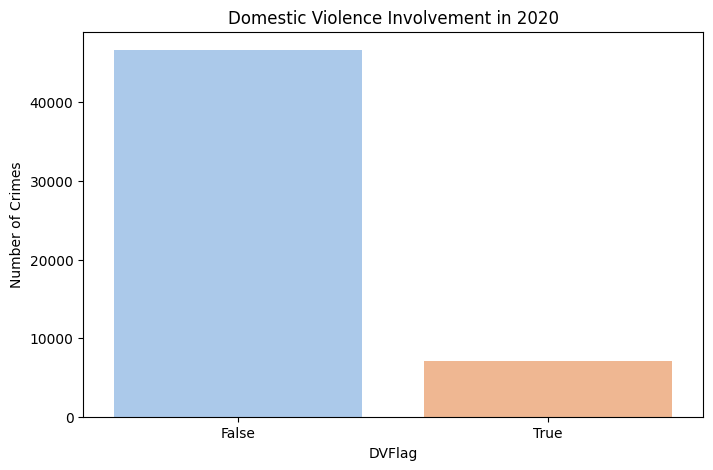

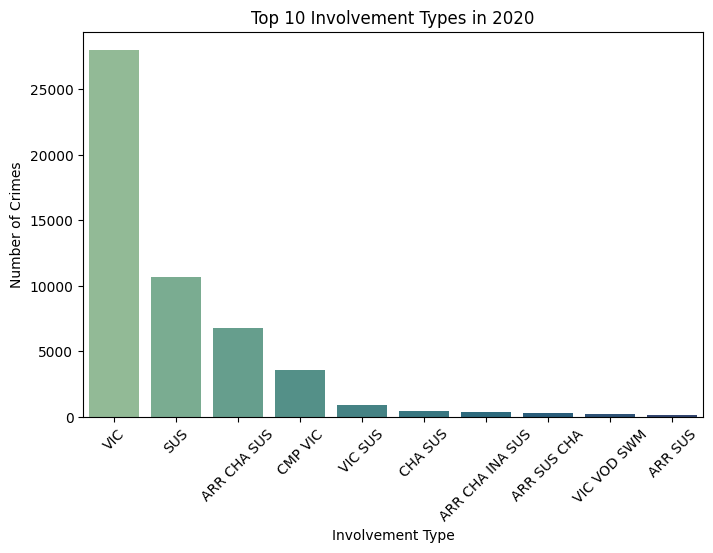

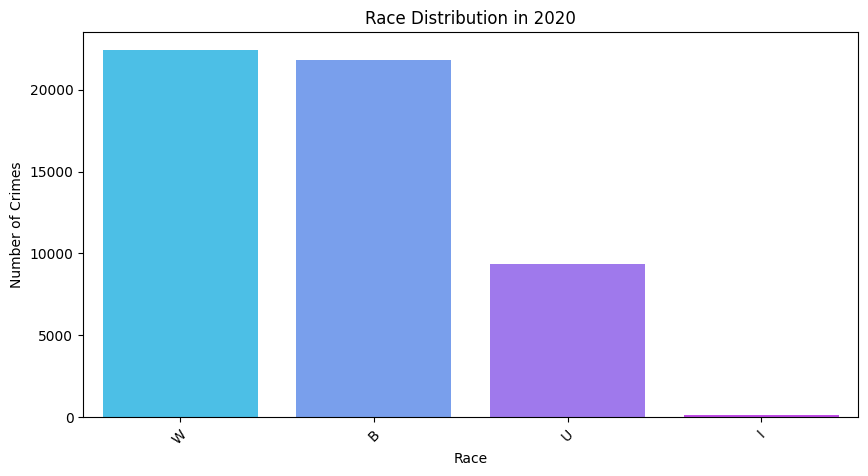

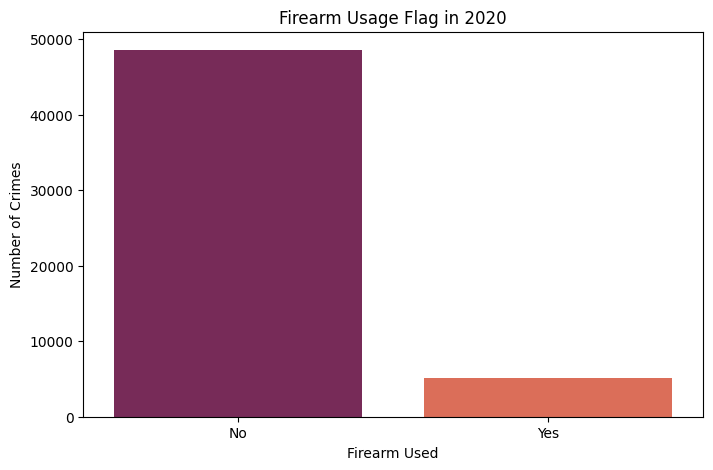


### Crime Analysis for Year 2021 ###



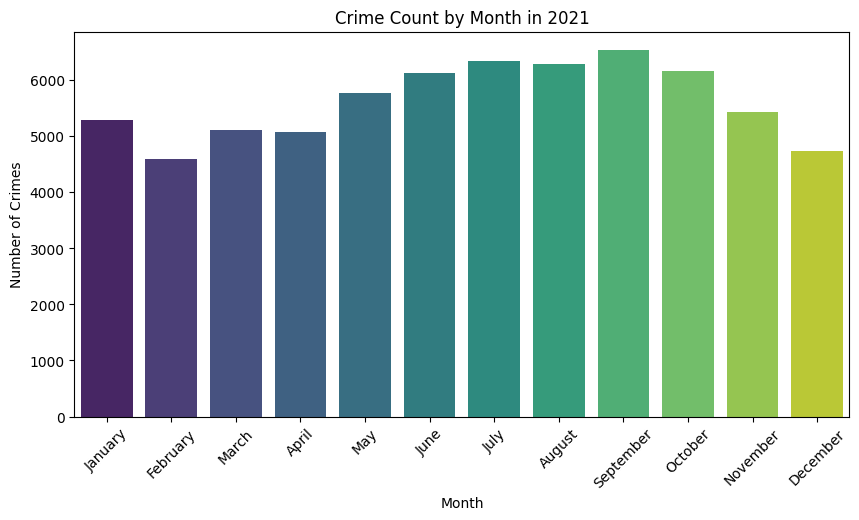

C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\2355513593.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Age_Group'] = pd.cut(year_data['Age'], bins=age_bins, labels=age_labels)


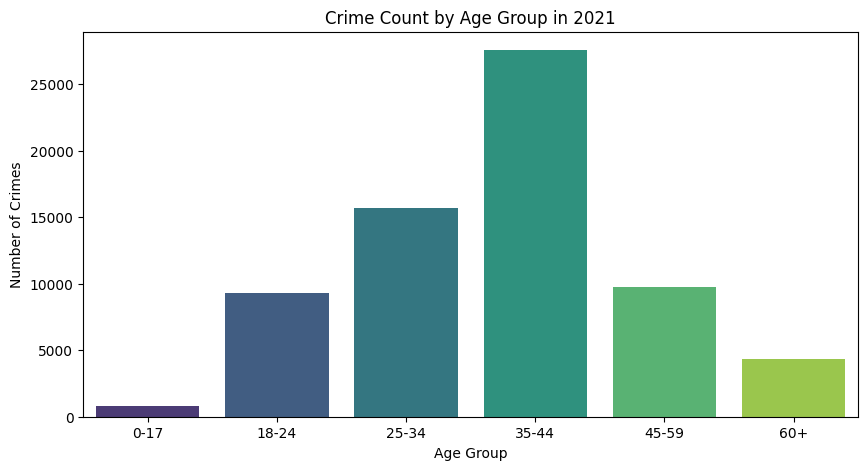

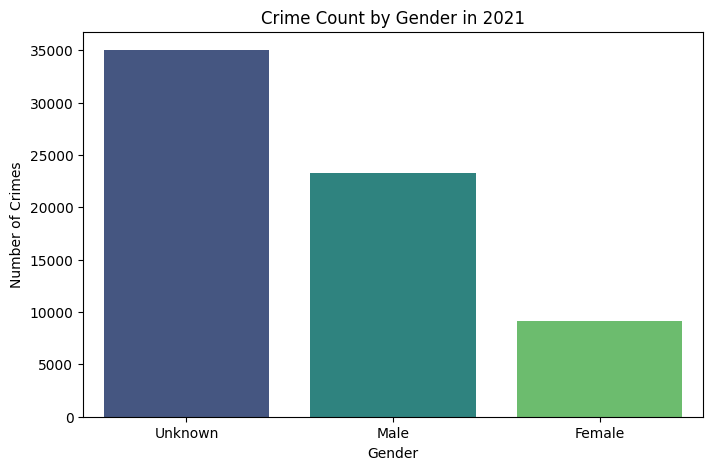

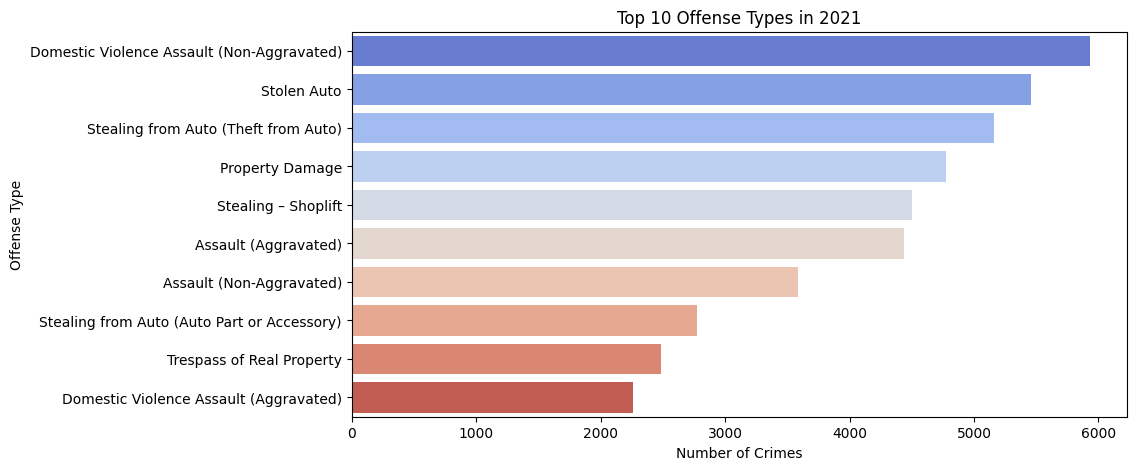

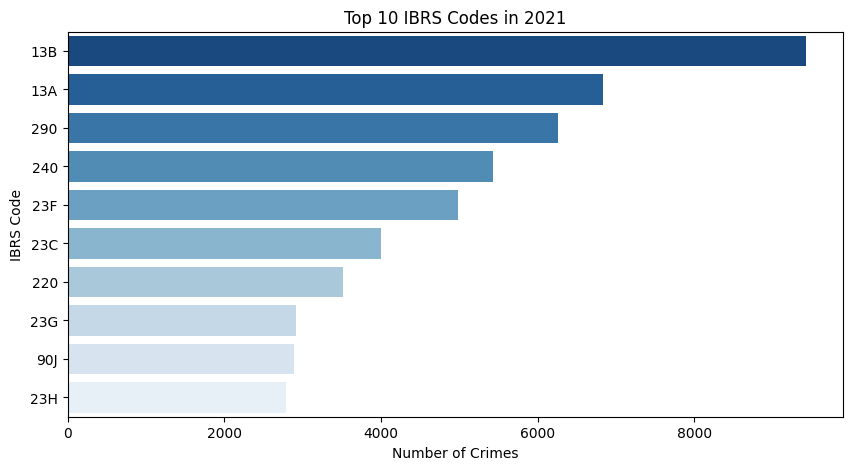

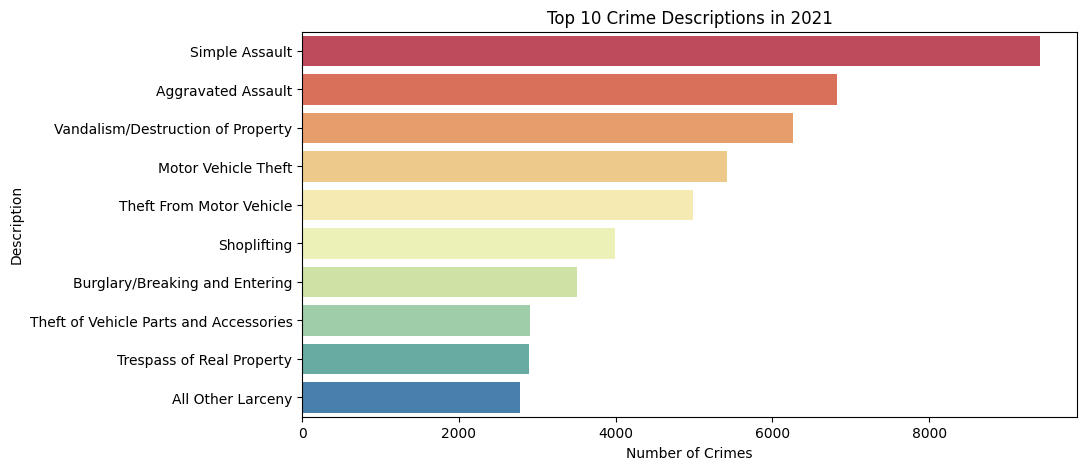

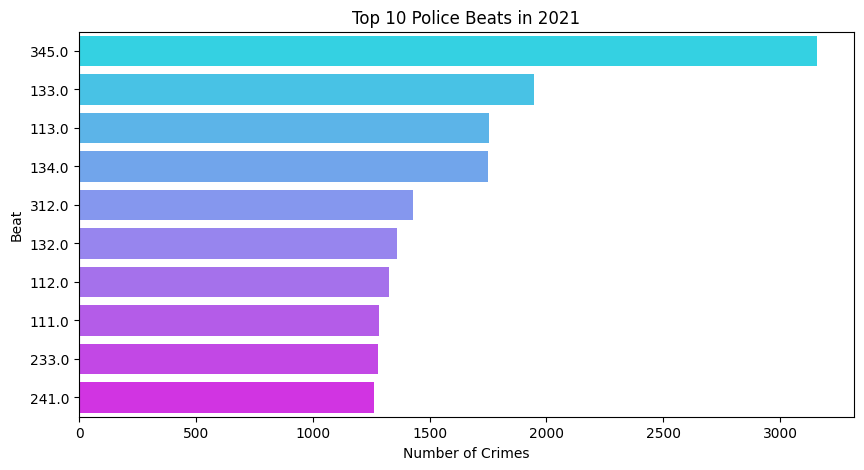

C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\2355513593.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Zip_Code'] = year_data['Zip_Code'].astype(str)  # Keep as string for leading zeros


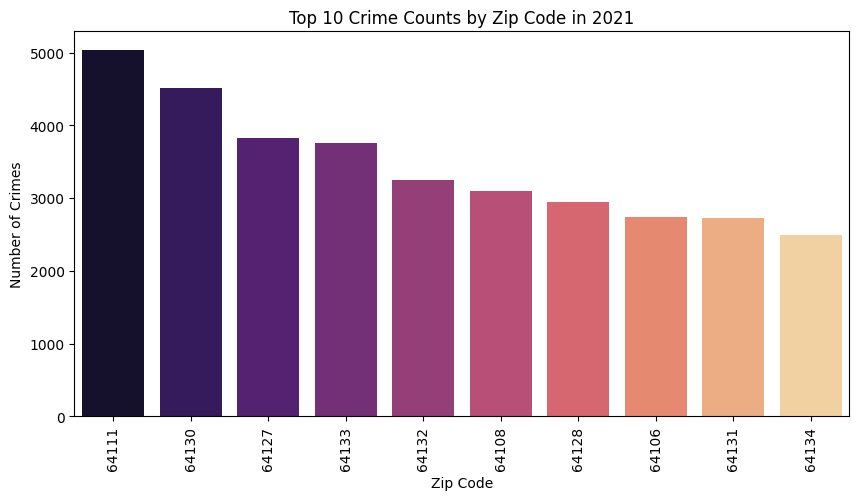

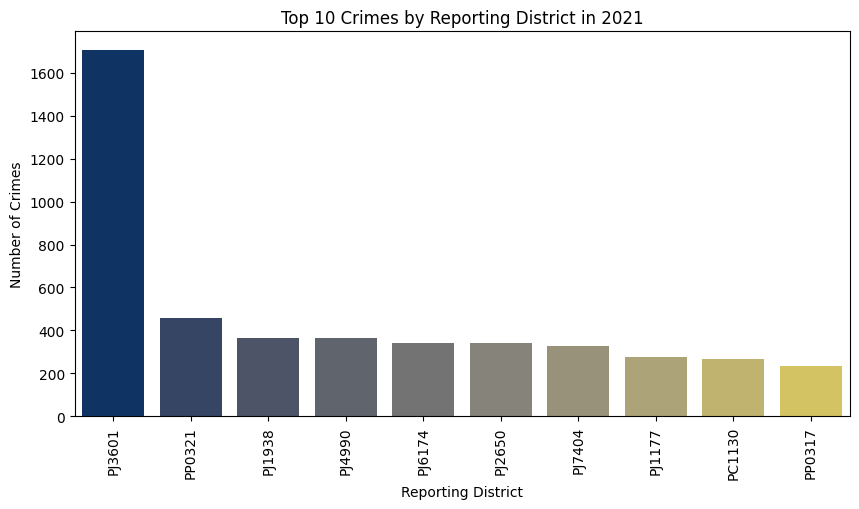

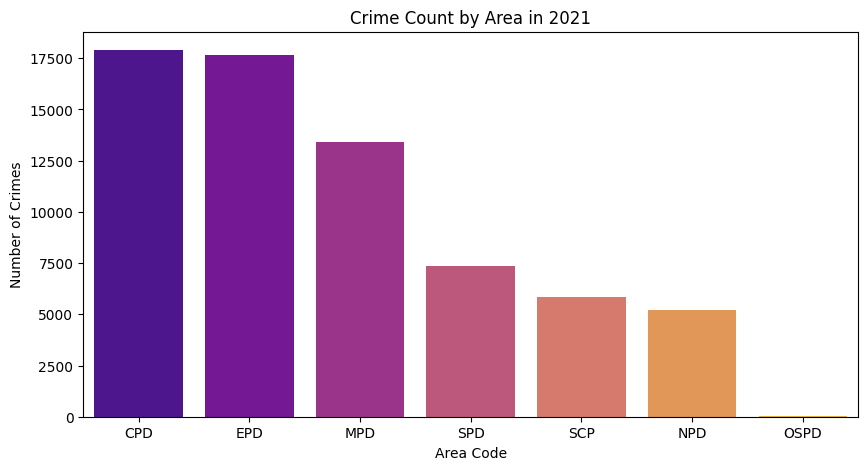

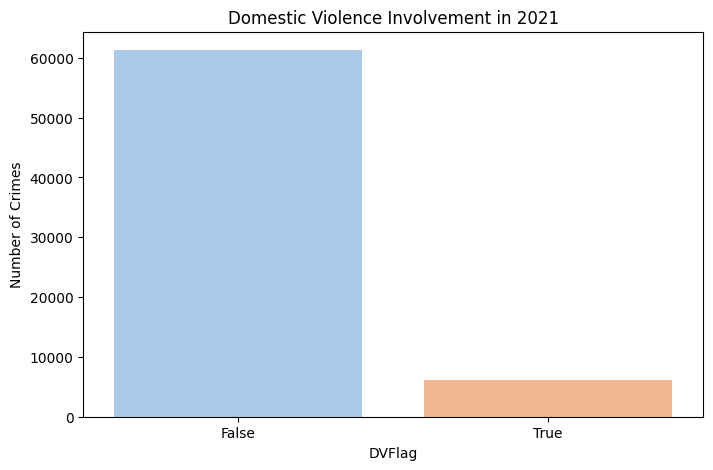

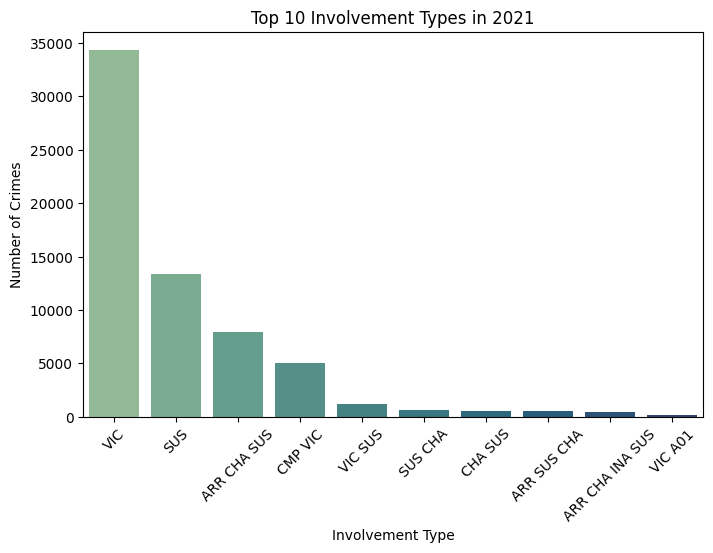

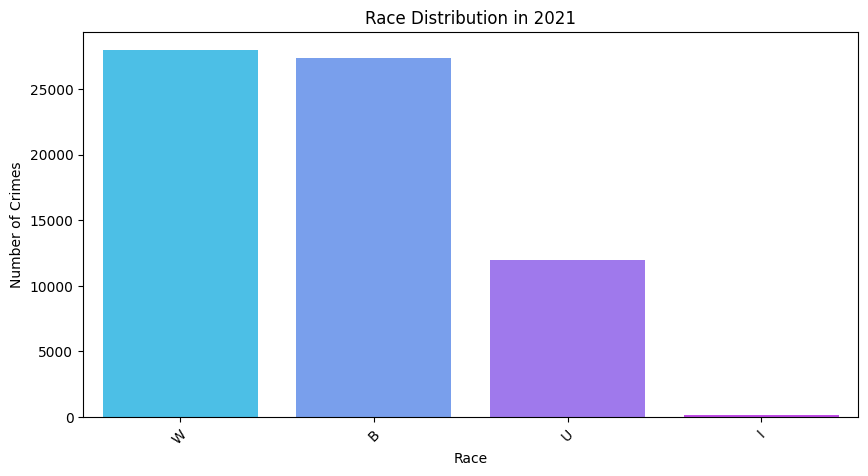

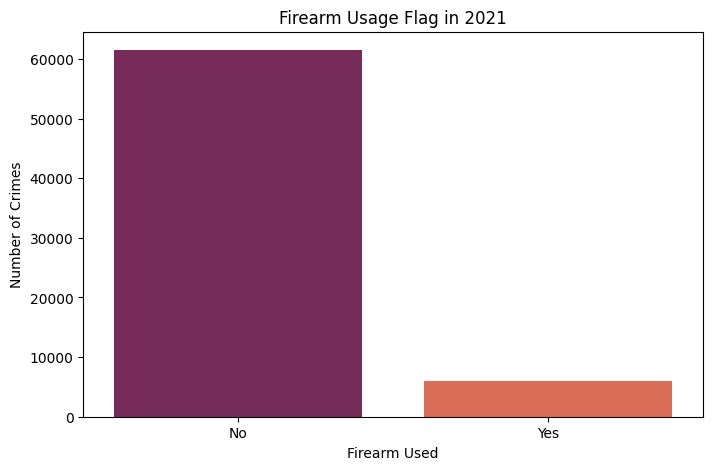


### Crime Analysis for Year 2022 ###



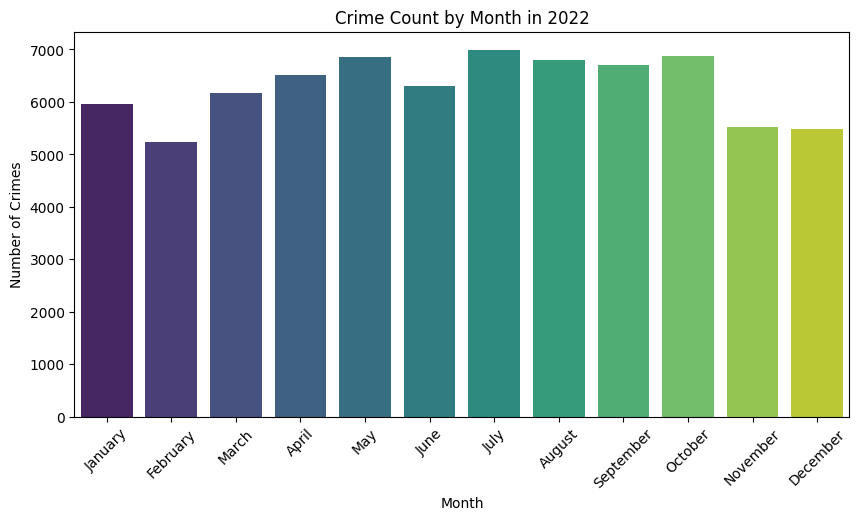

C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\2355513593.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Age_Group'] = pd.cut(year_data['Age'], bins=age_bins, labels=age_labels)


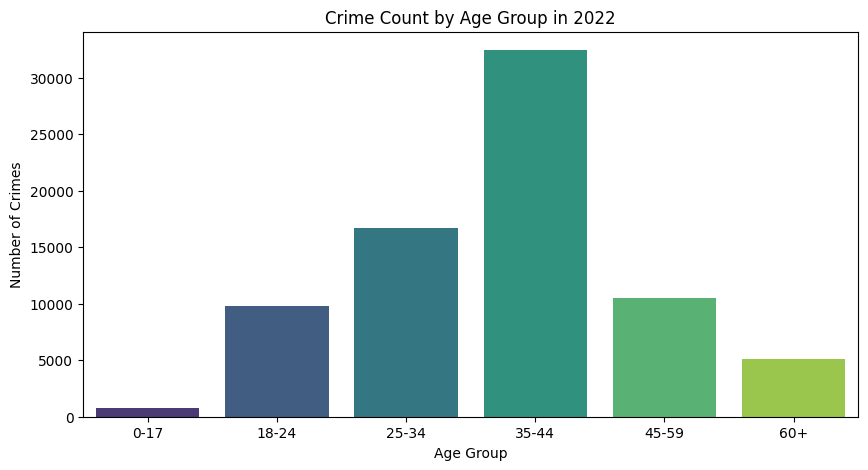

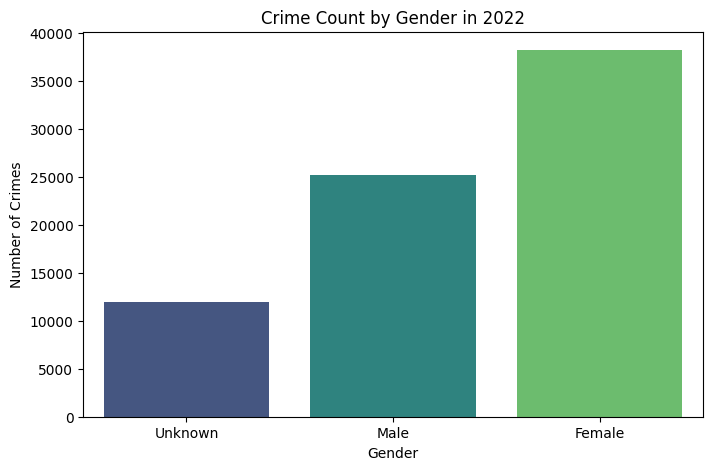

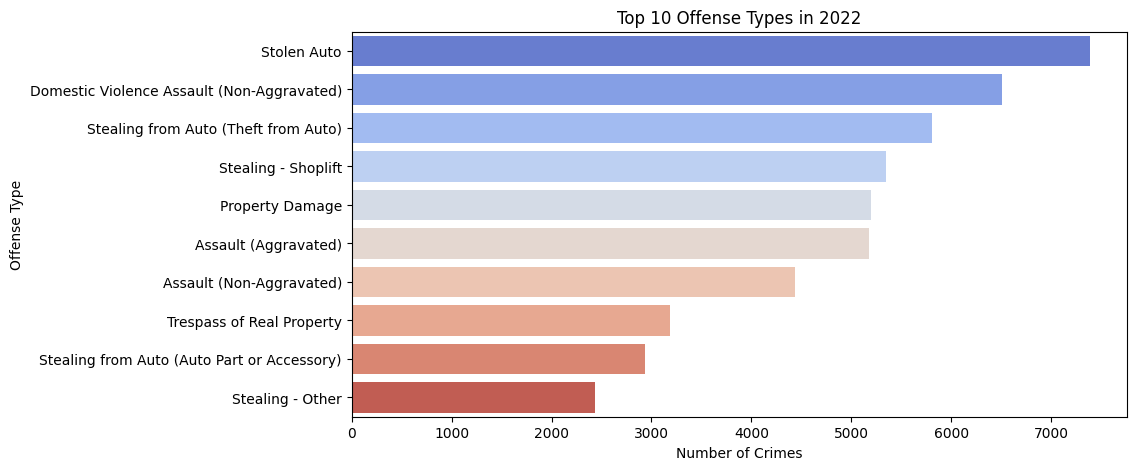

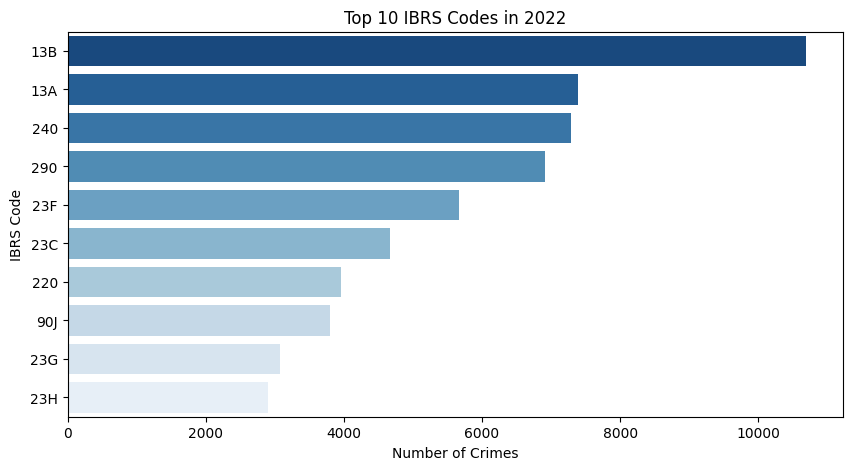

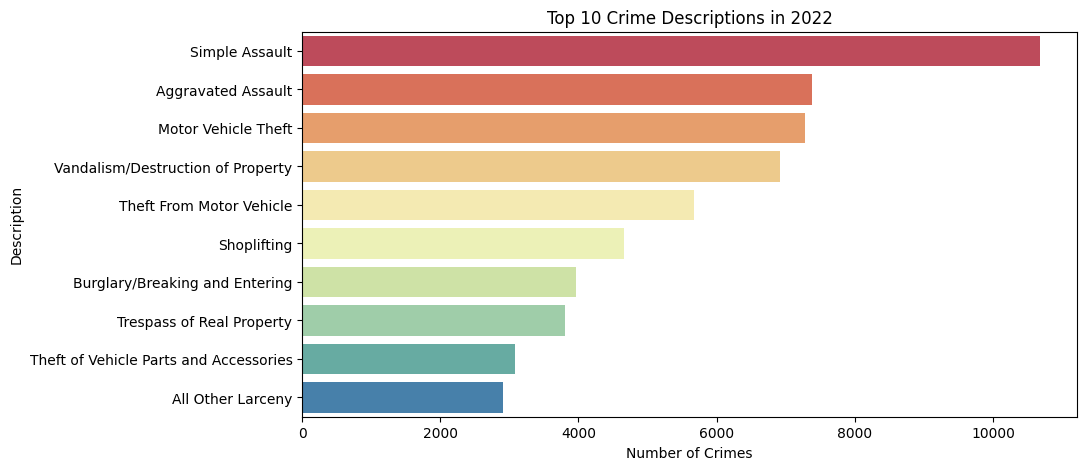

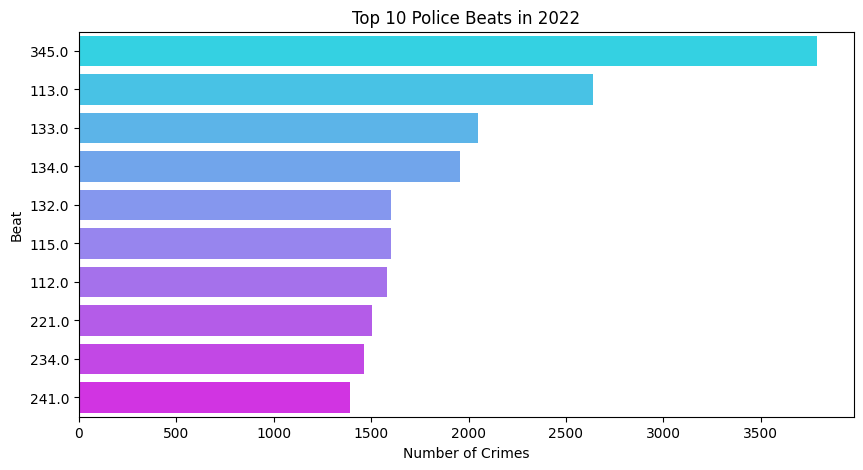

C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\2355513593.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Zip_Code'] = year_data['Zip_Code'].astype(str)  # Keep as string for leading zeros


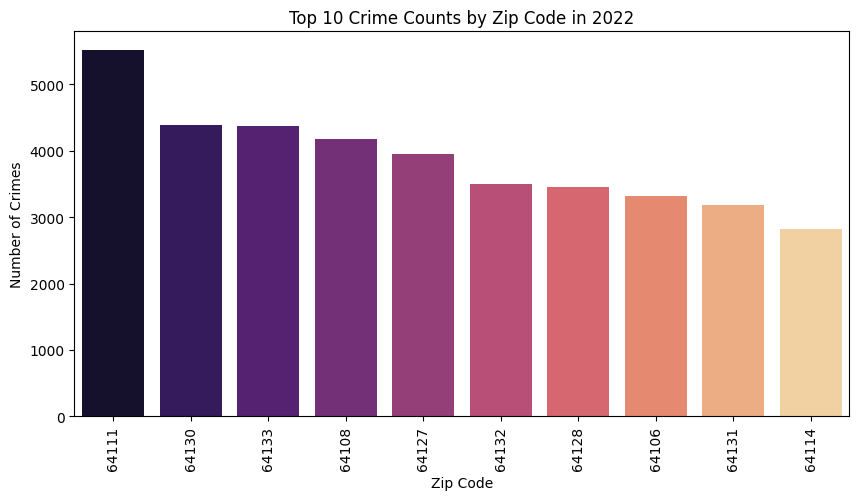

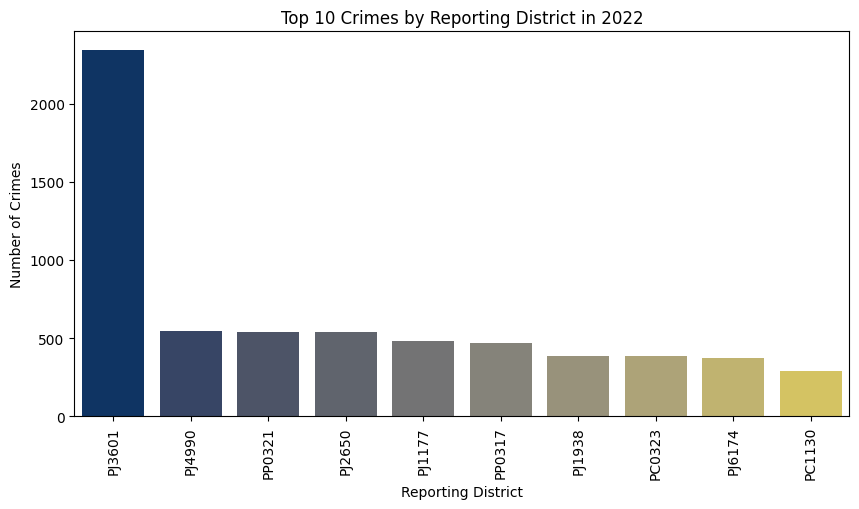

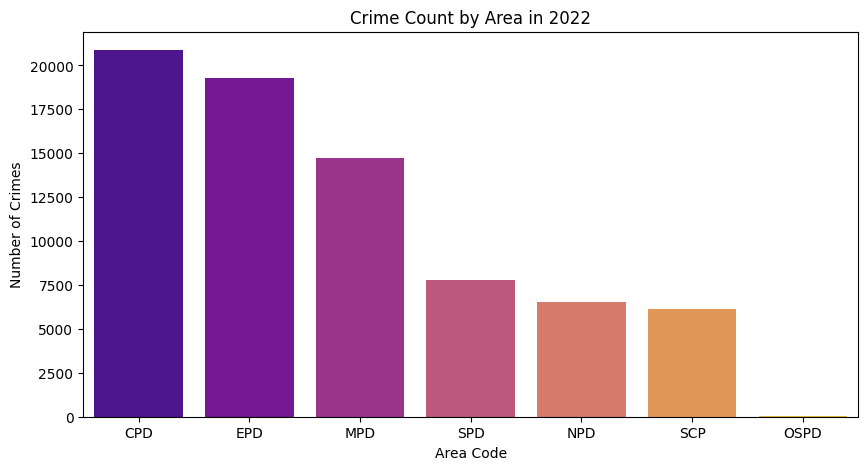

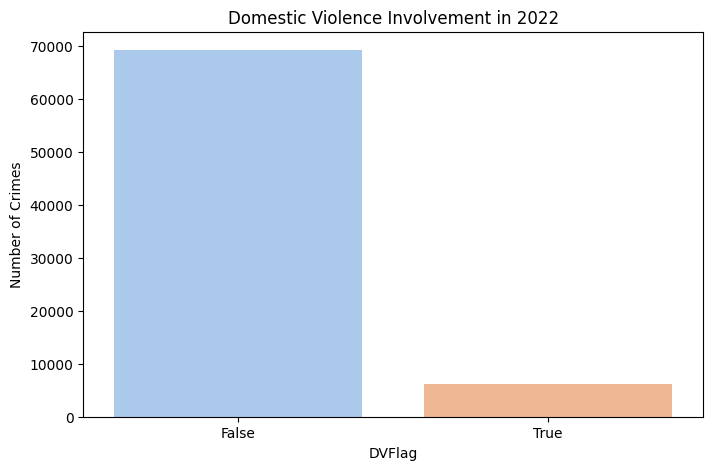

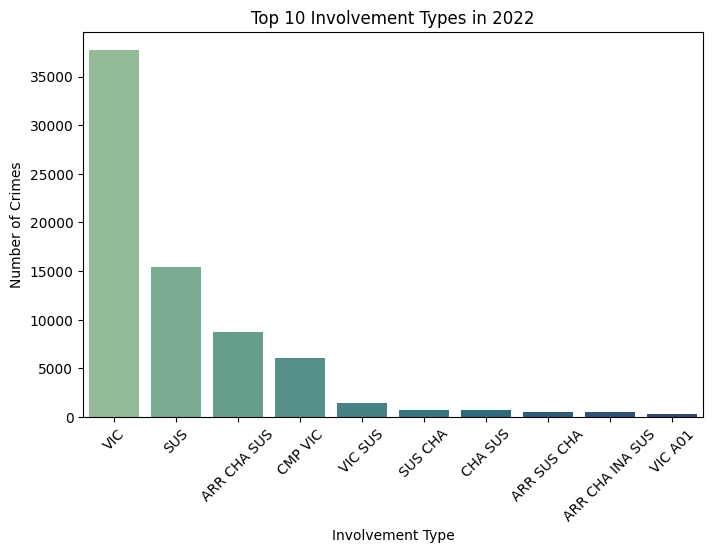

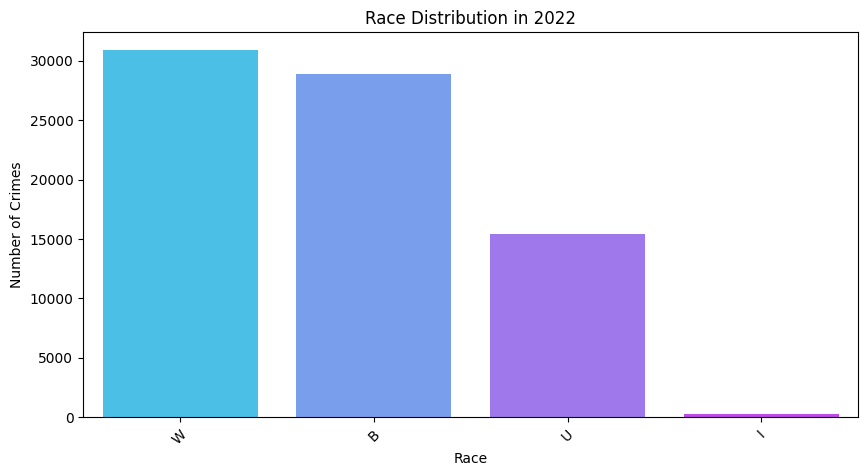

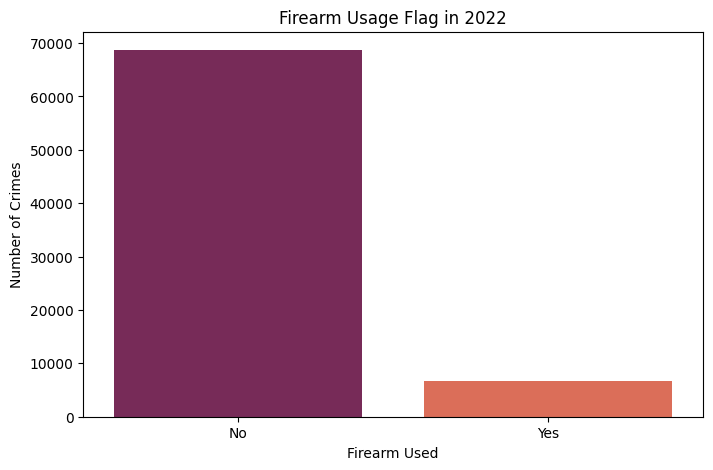


### Crime Analysis for Year 2023 ###



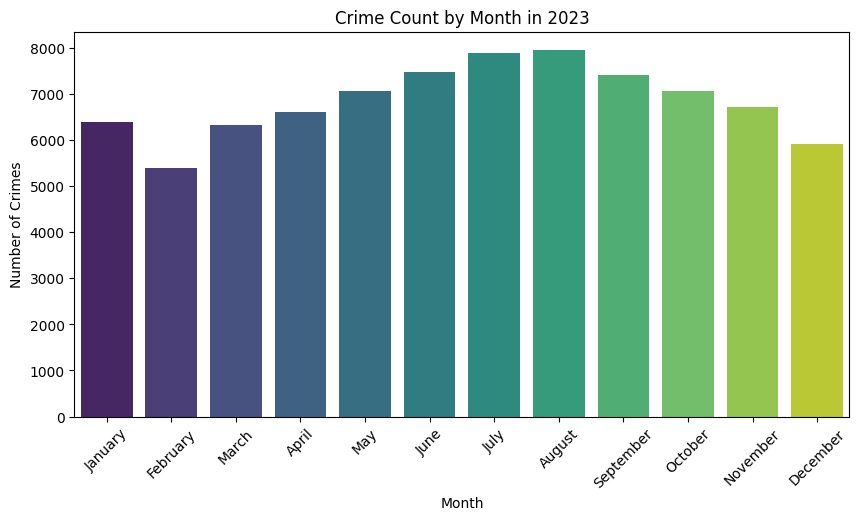

C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\2355513593.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Age_Group'] = pd.cut(year_data['Age'], bins=age_bins, labels=age_labels)


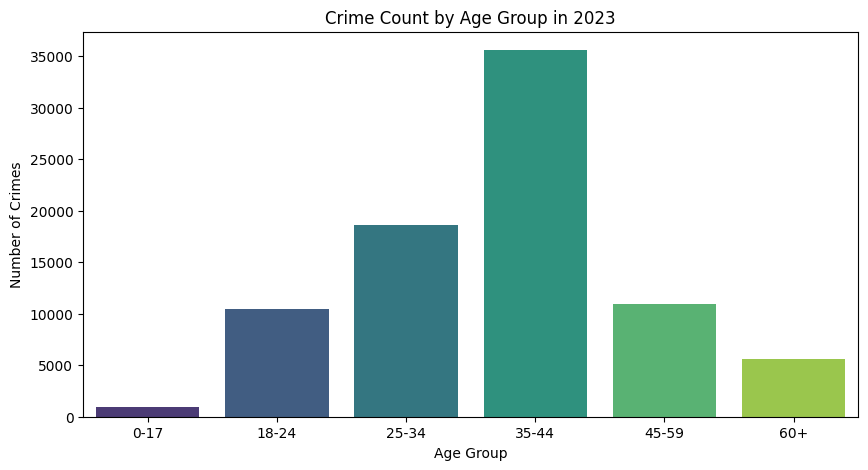

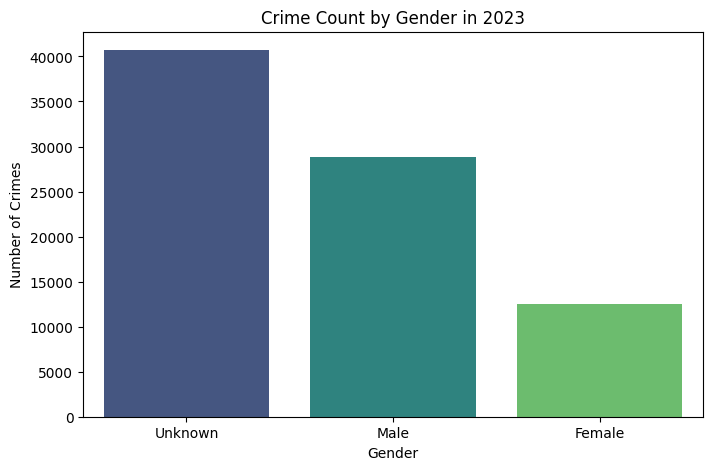

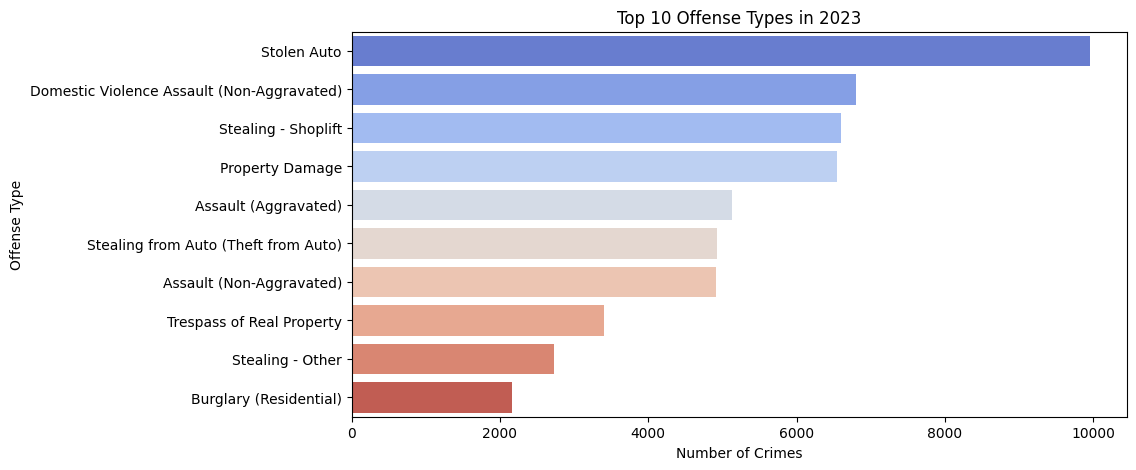

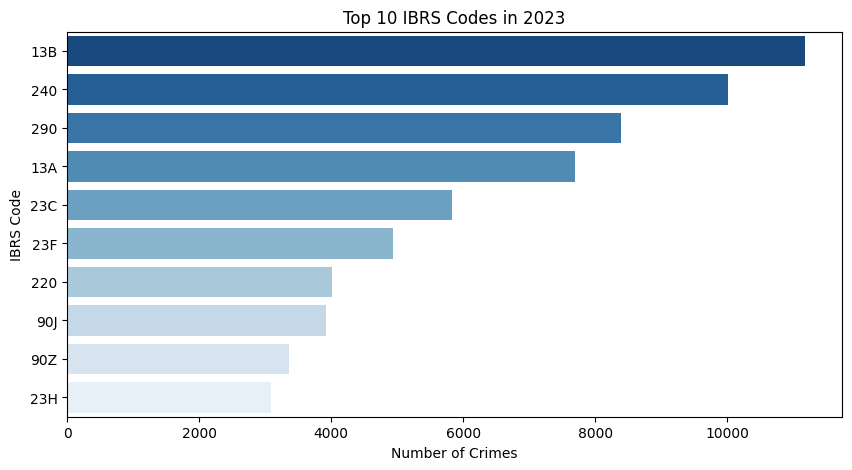

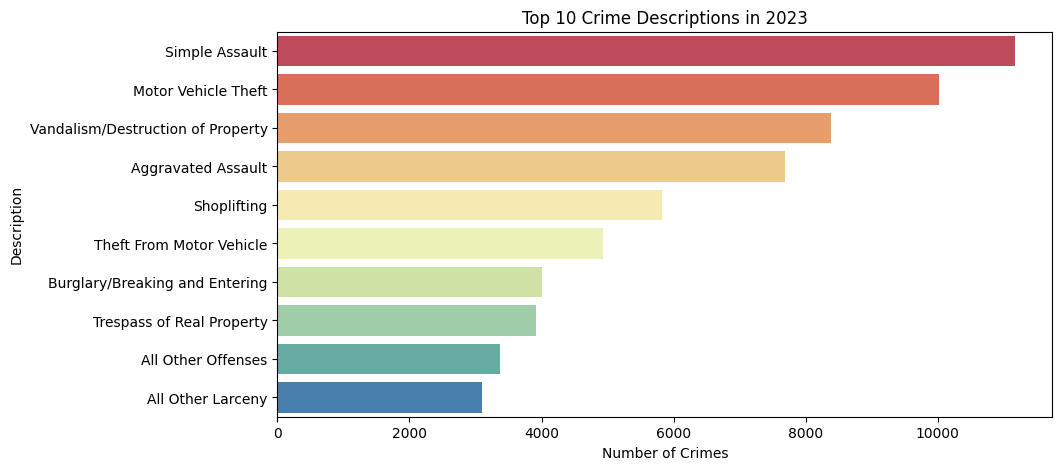

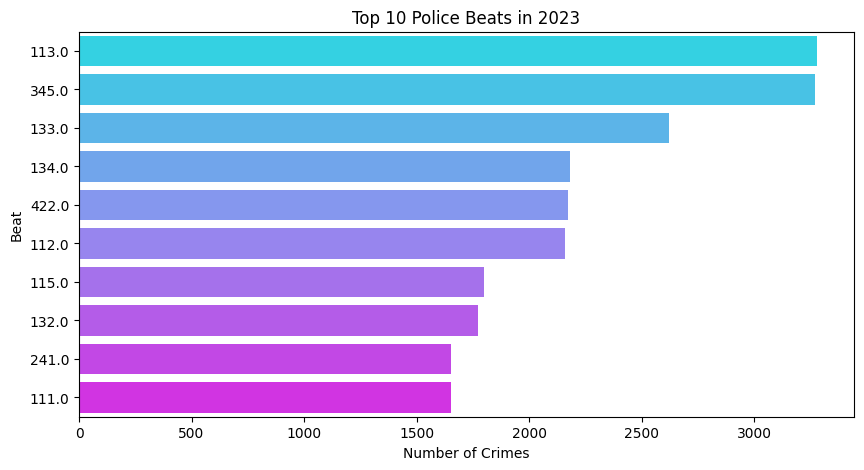

C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\2355513593.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Zip_Code'] = year_data['Zip_Code'].astype(str)  # Keep as string for leading zeros


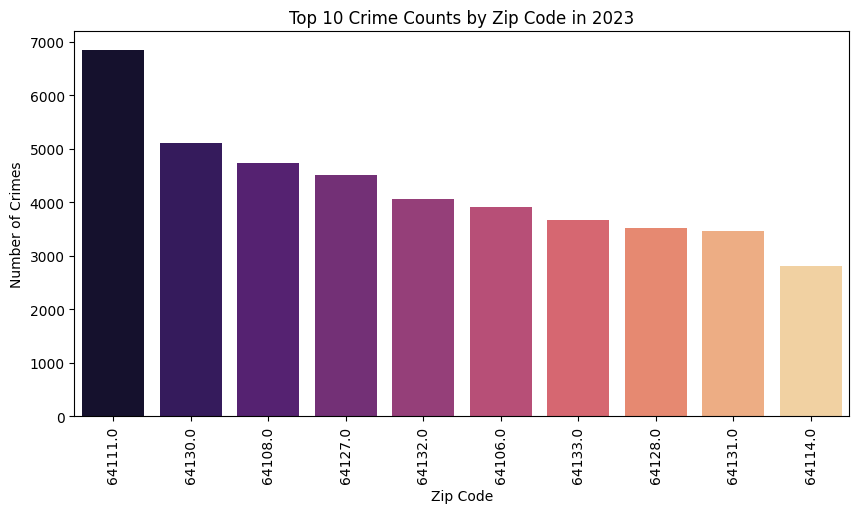

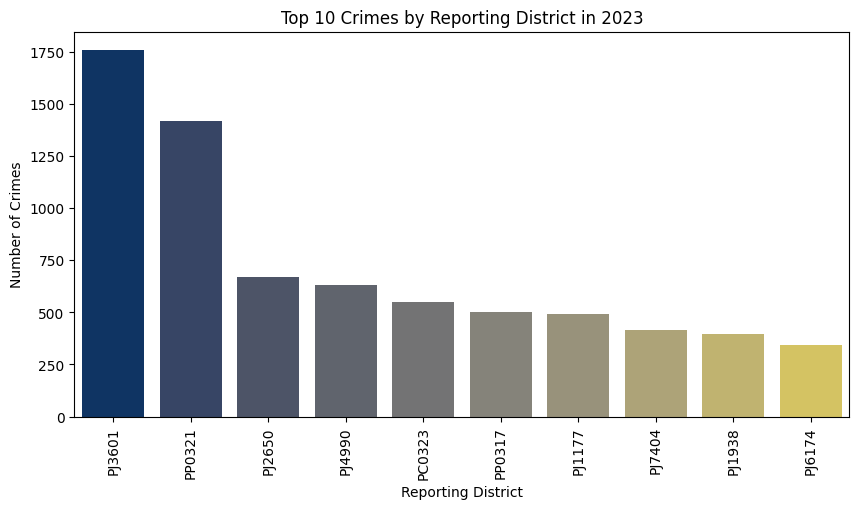

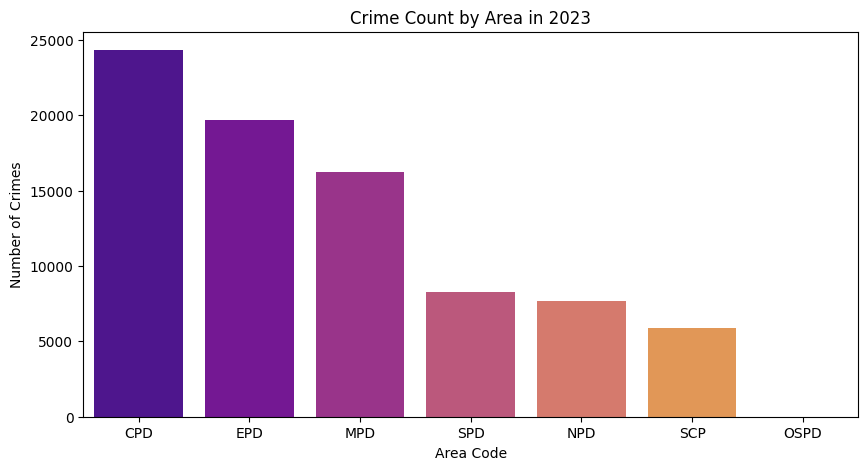

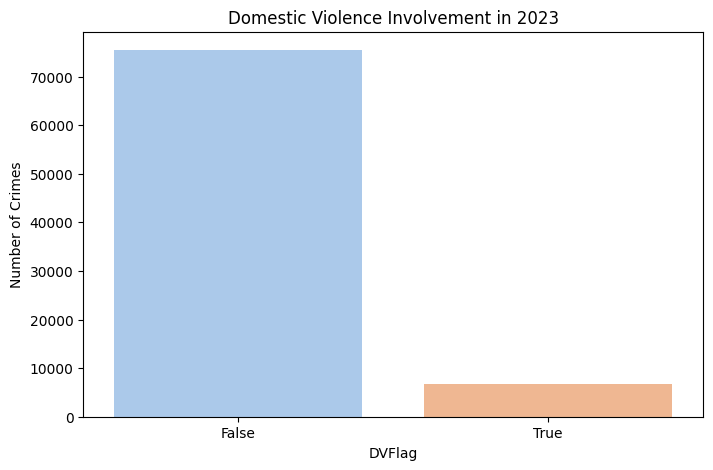

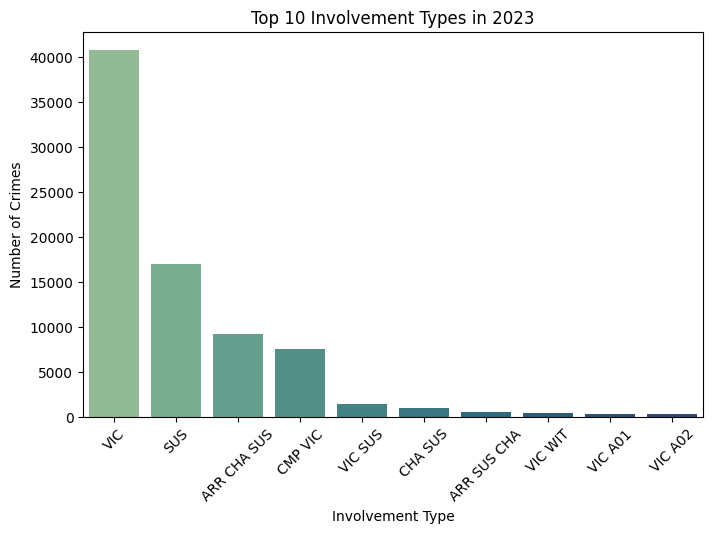

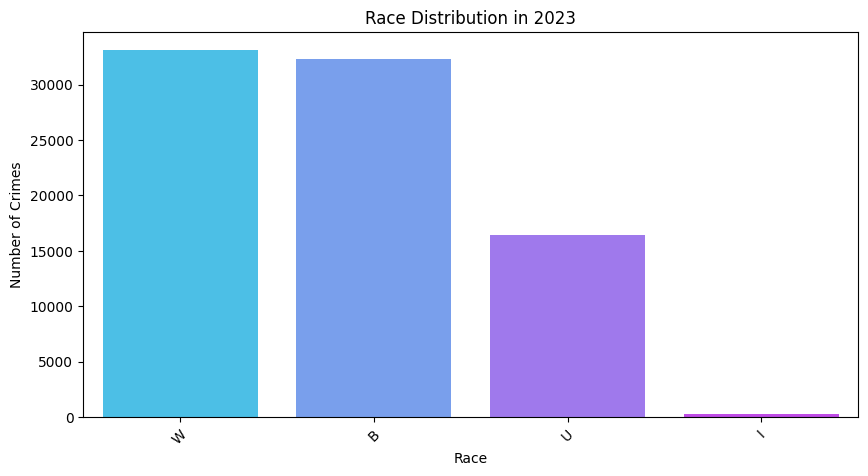

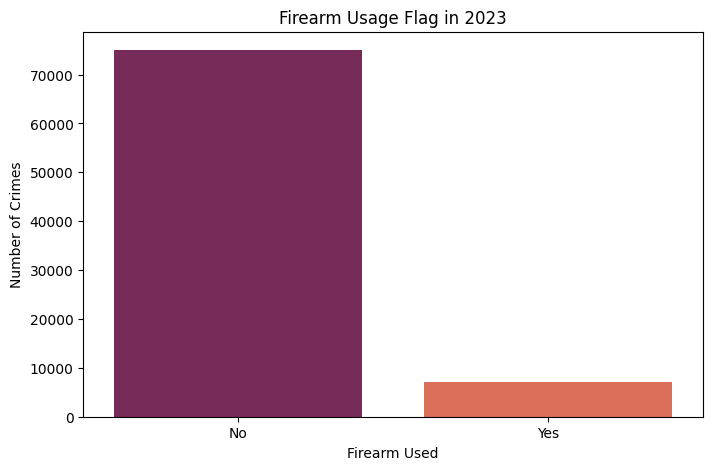


### Crime Analysis for Year 2024 ###



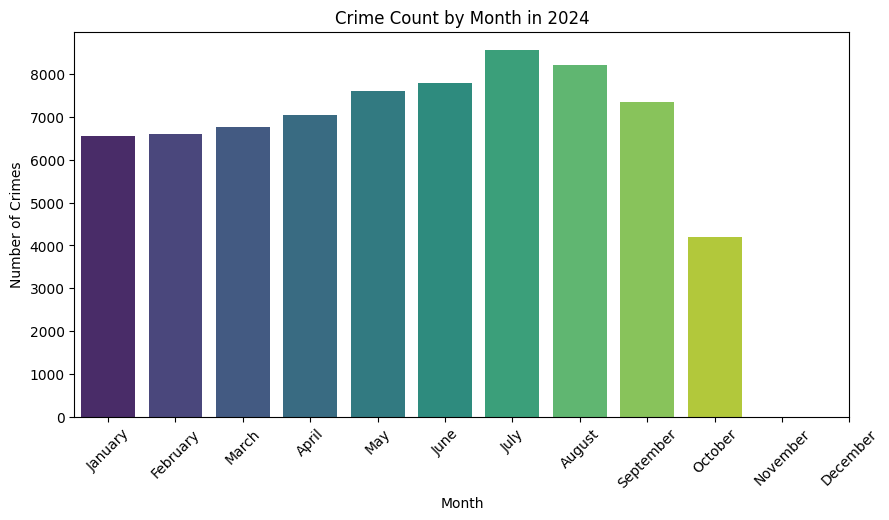

C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\2355513593.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Age_Group'] = pd.cut(year_data['Age'], bins=age_bins, labels=age_labels)


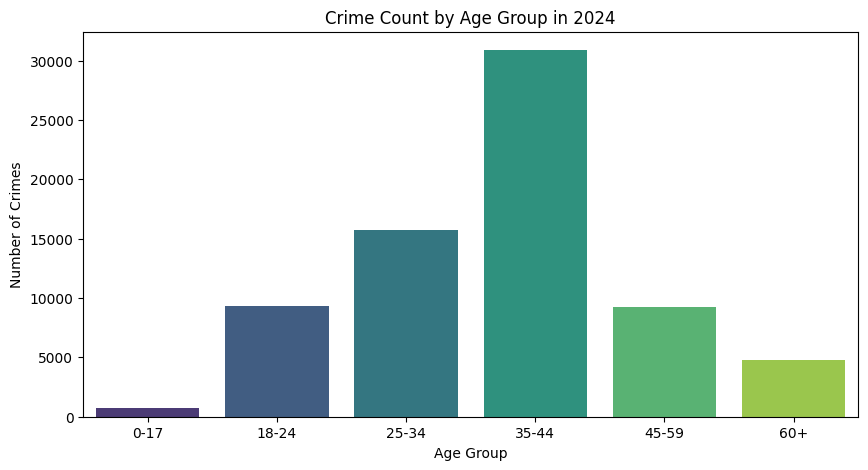

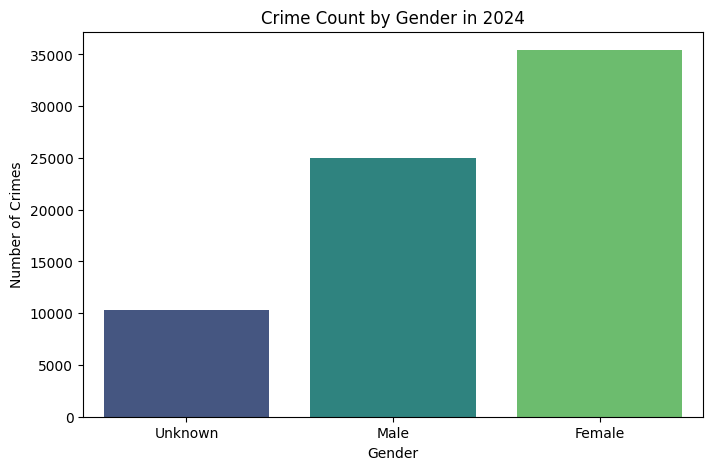

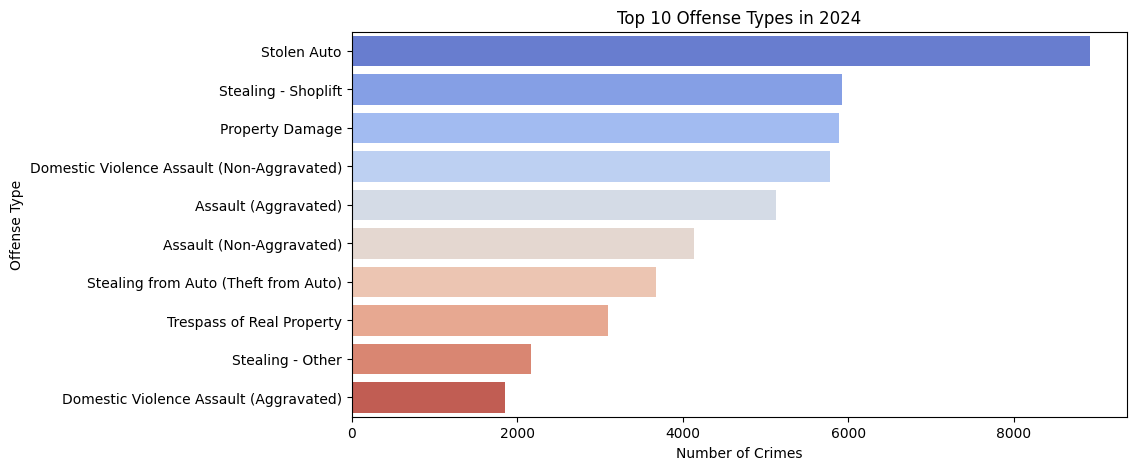

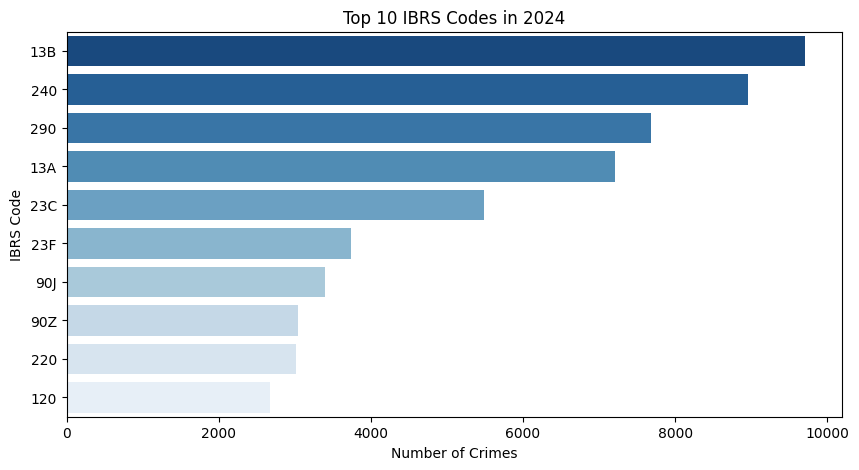

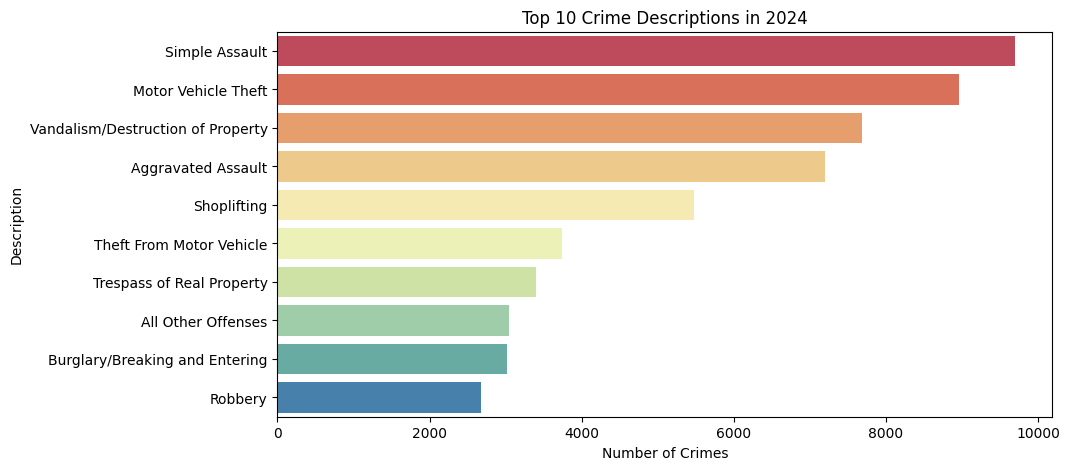

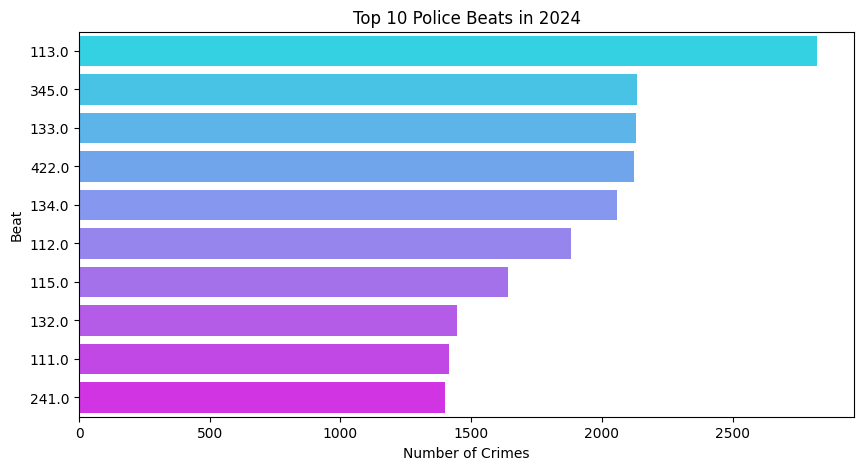

C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\2355513593.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Zip_Code'] = year_data['Zip_Code'].astype(str)  # Keep as string for leading zeros


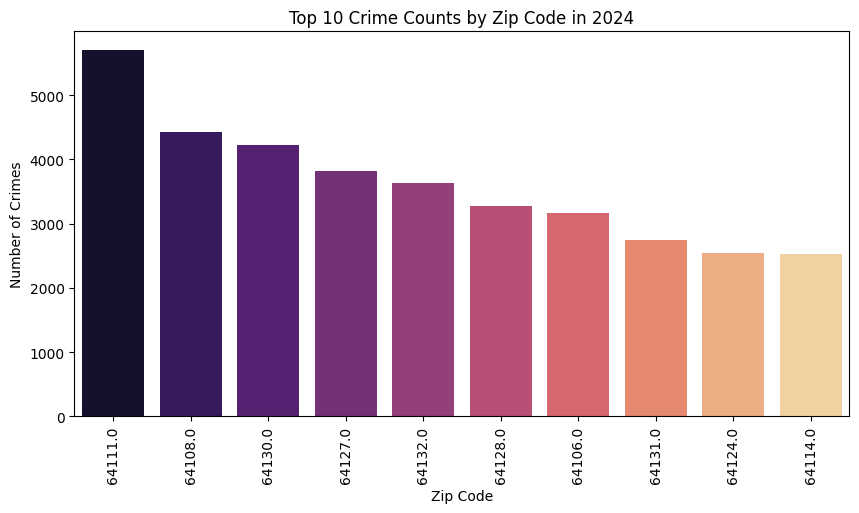

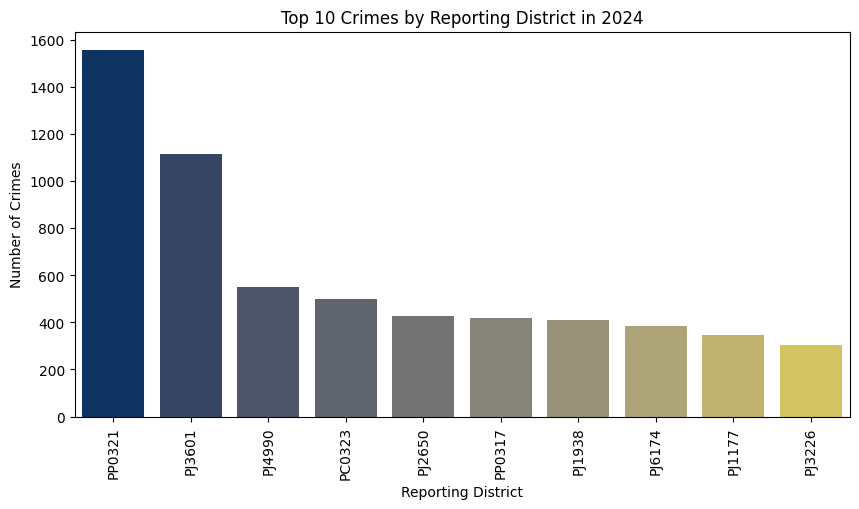

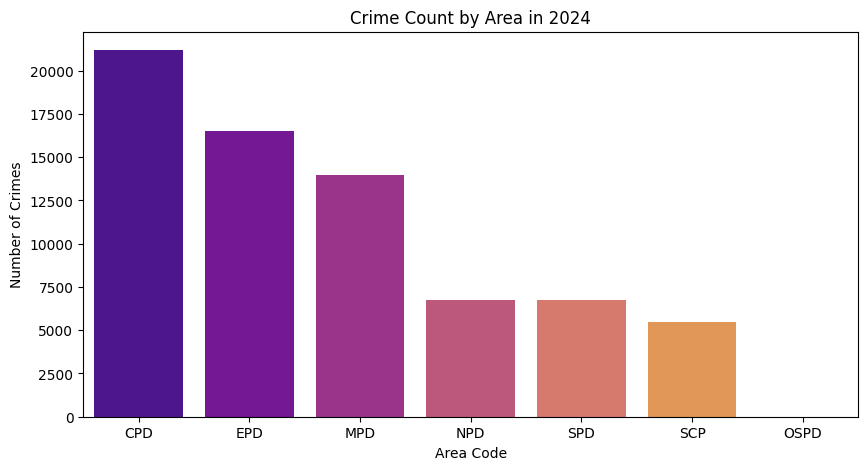

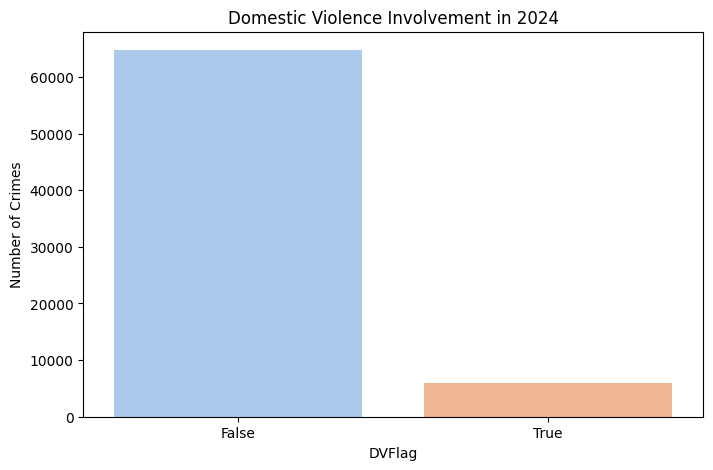

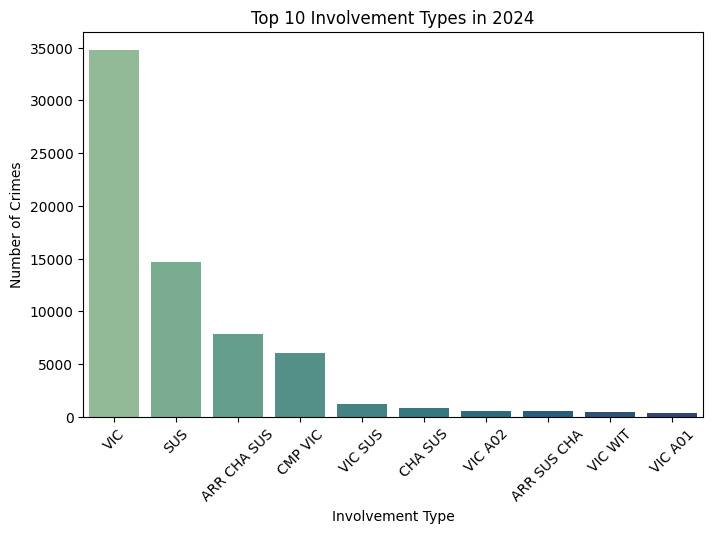

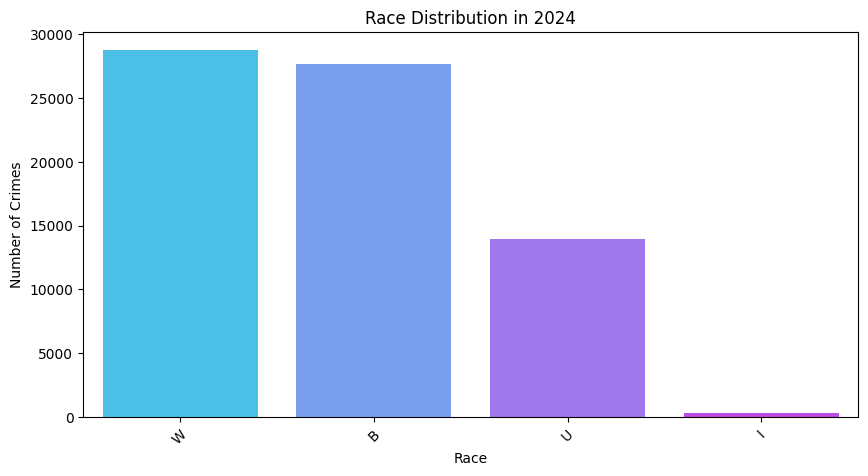

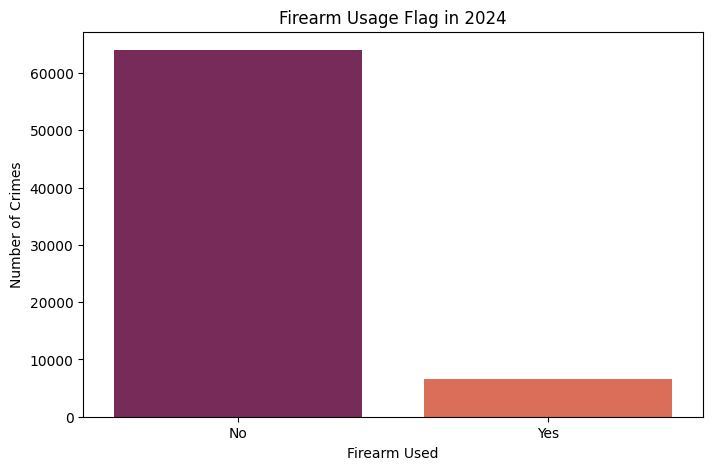

In [51]:
# Set the years to analyze
years = [2020, 2021, 2022, 2023, 2024]

# Loop through each year to display analysis one by one
for year in years:
    # Filter data for the current year
    year_data = filtered_data[filtered_data['Reported_year'] == year]
    print(f"\n### Crime Analysis for Year {year} ###\n")
    
    # 1. Crime Count by Month
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Reported_month', data=year_data, palette="viridis")
    plt.title(f'Crime Count by Month in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Crimes')
    plt.xticks(ticks=np.arange(12), labels=[calendar.month_name[i + 1] for i in range(12)], rotation=45)
    plt.show()

    # 2. Crime Count by Age Group
    age_bins = [0, 18, 25, 35, 45, 60, 100]
    age_labels = ['0-17', '18-24', '25-34', '35-44', '45-59', '60+']
    year_data['Age_Group'] = pd.cut(year_data['Age'], bins=age_bins, labels=age_labels)

    plt.figure(figsize=(10, 5))
    sns.countplot(x='Age_Group', data=year_data, palette="viridis")
    plt.title(f'Crime Count by Age Group in {year}')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Crimes')
    plt.show()

    # 3. Gender Analysis
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Sex', data=year_data, palette="viridis")
    plt.title(f'Crime Count by Gender in {year}')
    plt.xlabel('Gender')
    plt.ylabel('Number of Crimes')
    plt.xticks(ticks=[0, 1, 2], labels=['Unknown', 'Male', 'Female'])
    plt.show()

    # 4. Top 10 Offense Types
    top_offenses = year_data['Offense'].value_counts().nlargest(10).index
    top_offenses_data = year_data[year_data['Offense'].isin(top_offenses)]

    plt.figure(figsize=(10, 5))
    sns.countplot(y='Offense', data=top_offenses_data, order=top_offenses, palette="coolwarm")
    plt.title(f'Top 10 Offense Types in {year}')
    plt.xlabel('Number of Crimes')
    plt.ylabel('Offense Type')
    plt.show()

    # 5. Top 10 IBRS Codes
    top_IBRS = year_data['IBRS'].value_counts().nlargest(10).index
    top_IBRS_data = year_data[year_data['IBRS'].isin(top_IBRS)]

    plt.figure(figsize=(10, 5))
    sns.countplot(y='IBRS', data=top_IBRS_data, order=top_IBRS, palette="Blues_r")
    plt.title(f'Top 10 IBRS Codes in {year}')
    plt.xlabel('Number of Crimes')
    plt.ylabel('IBRS Code')
    plt.show()

    # 6. Top 10 Crime Descriptions
    top_descriptions = year_data['Description'].value_counts().nlargest(10).index

    plt.figure(figsize=(10, 5))
    sns.countplot(y='Description', data=year_data[year_data['Description'].isin(top_descriptions)],
                    order=top_descriptions, palette="Spectral")
    plt.title(f'Top 10 Crime Descriptions in {year}')
    plt.xlabel('Number of Crimes')
    plt.ylabel('Description')
    plt.show()

    # 7. Top 10 Police Beats
    top_beats = year_data['Beat'].value_counts().nlargest(10).index

    plt.figure(figsize=(10, 5))
    sns.countplot(y='Beat', data=year_data[year_data['Beat'].isin(top_beats)], order=top_beats, palette="cool")
    plt.title(f'Top 10 Police Beats in {year}')
    plt.xlabel('Number of Crimes')
    plt.ylabel('Beat')
    plt.show()

    # 8. Top 10 Zip Codes
    year_data['Zip_Code'] = year_data['Zip_Code'].astype(str)  # Keep as string for leading zeros
    top_zip_codes = year_data['Zip_Code'].value_counts().nlargest(10).index

    plt.figure(figsize=(10, 5))
    sns.countplot(x='Zip_Code', data=year_data[year_data['Zip_Code'].isin(top_zip_codes)], order=top_zip_codes, palette="magma")
    plt.title(f'Top 10 Crime Counts by Zip Code in {year}')
    plt.xlabel('Zip Code')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=90)
    plt.show()

    # 9. Crimes by Reporting District
    top_rep_districts = year_data['Rep_Dist'].value_counts().nlargest(10).index

    plt.figure(figsize=(10, 5))
    sns.countplot(x='Rep_Dist', data=year_data[year_data['Rep_Dist'].isin(top_rep_districts)], order=top_rep_districts, palette="cividis")
    plt.title(f'Top 10 Crimes by Reporting District in {year}')
    plt.xlabel('Reporting District')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=90)
    plt.show()

    # 10. Crimes by Area Code
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Area', data=year_data, order=year_data['Area'].value_counts().index, palette="plasma")
    plt.title(f'Crime Count by Area in {year}')
    plt.xlabel('Area Code')
    plt.ylabel('Number of Crimes')
    plt.show()

    # 11. DVFlag (Domestic Violence Involvement)
    plt.figure(figsize=(8, 5))
    sns.countplot(x='DVFlag', data=year_data, palette="pastel")
    plt.title(f'Domestic Violence Involvement in {year}')
    plt.xlabel('DVFlag')
    plt.ylabel('Number of Crimes')
    plt.xticks([0, 1], ['False', 'True'])
    plt.show()

    # 12. Top 10 Involvement Type Frequency
    plt.figure(figsize=(8, 5))
    
    # Get the top 10 most frequent Involvement types
    top_10_involvement = year_data['Involvement'].value_counts().nlargest(10).index
    top_10_data = year_data[year_data['Involvement'].isin(top_10_involvement)]
    
    # Plot the filtered data
    sns.countplot(x='Involvement', data=top_10_data, palette="crest", order=top_10_involvement)
    plt.title(f'Top 10 Involvement Types in {year}')
    plt.xlabel('Involvement Type')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=45)
    plt.show()

    # 13. Race Distribution
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Race', data=year_data, order=year_data['Race'].value_counts().index, palette="cool")
    plt.title(f'Race Distribution in {year}')
    plt.xlabel('Race')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=45)
    plt.show()

    # 14. Firearm Usage Flag
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Firearm_Used_Flag', data=year_data, palette="rocket")
    plt.title(f'Firearm Usage Flag in {year}')
    plt.xlabel('Firearm Used')
    plt.ylabel('Number of Crimes')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()


In [52]:
### teja

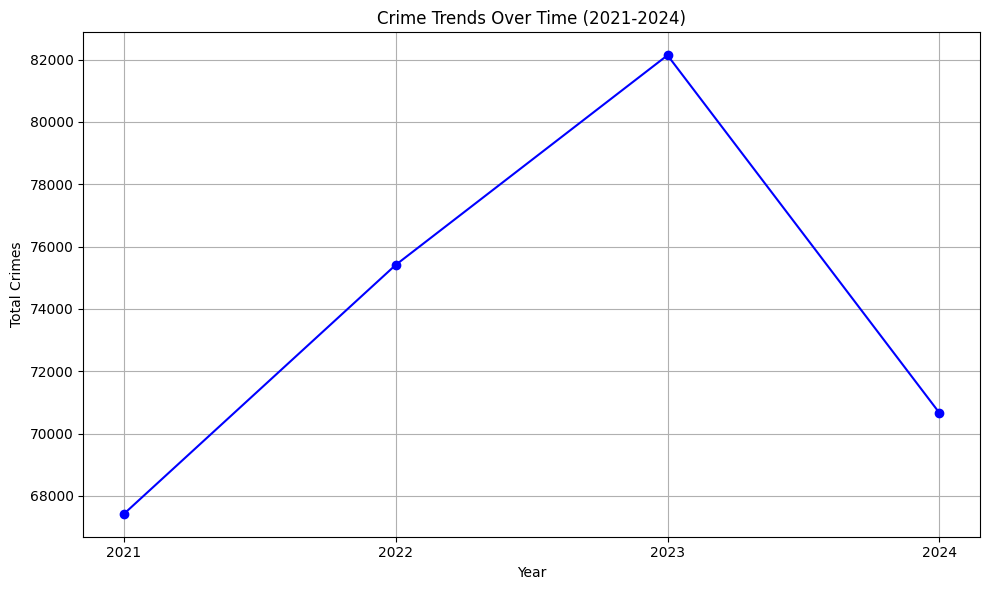

In [53]:
crime_trends = filtered_data[filtered_data['Reported_year'] >= 2021].groupby('Reported_year').size().reset_index(name='total_crimes')
plt.figure(figsize=(10, 6))
plt.plot(crime_trends['Reported_year'], crime_trends['total_crimes'], marker='o', color='b')
plt.title(f'Crime Trends Over Time (2021-{year})')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.xticks(crime_trends['Reported_year'])
plt.grid()
plt.tight_layout()
plt.show()

In [54]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349353 entries, 0 to 349566
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Report_No          349353 non-null  object  
 1   Reported_year      349353 non-null  int64   
 2   Reported_month     349353 non-null  int64   
 3   Reported_day       349353 non-null  int64   
 4   Reported_hour      349353 non-null  int64   
 5   Reported_minute    349353 non-null  int64   
 6   From_year          349353 non-null  int64   
 7   From_month         349353 non-null  int64   
 8   From_day           349353 non-null  int64   
 9   From_hour          349353 non-null  int64   
 10  From_minute        349353 non-null  int64   
 11  Offense            349353 non-null  object  
 12  IBRS               349353 non-null  object  
 13  Description        349353 non-null  object  
 14  Beat               349353 non-null  float64 
 15  Address            349353 non-null  obj

Sex            F      M      U
Age Range                     
10-20       3872   4570     37
20-30      33159  39432    154
30-40      42920  70770  50598
40-50      18668  28166     60
50-60      11479  19403     29
60-70       6856  11320     19
70-80       2670   3358      4


C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\3749751075.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Age Range'] = pd.cut(filtered_data['Age'], bins=bins, labels=labels, right=False)


<Figure size 1000x600 with 0 Axes>

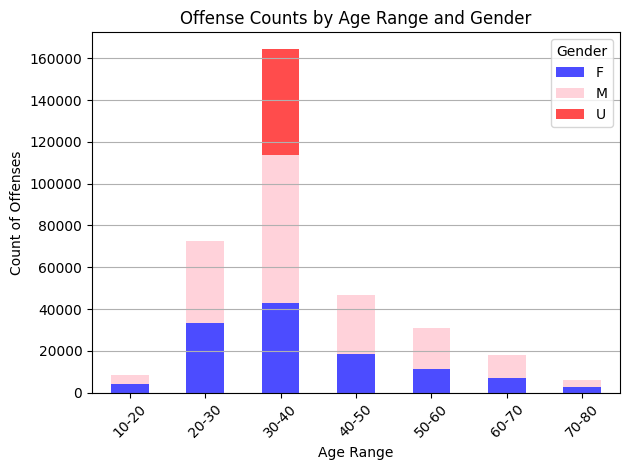

In [55]:
# Define bins and labels for age ranges
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

# Create a new column for age ranges in filtered_data
filtered_data['Age Range'] = pd.cut(filtered_data['Age'], bins=bins, labels=labels, right=False)

# Count offenses in each age range by gender
age_gender_counts = filtered_data.groupby(['Age Range', 'Sex']).size().unstack(fill_value=0)

print(age_gender_counts)

# Plotting
plt.figure(figsize=(10, 6))
age_gender_counts.plot(kind='bar', stacked=True, color=['blue', 'pink', 'red'], alpha=0.7)
plt.title('Offense Counts by Age Range and Gender')
plt.xlabel('Age Range')
plt.ylabel('Count of Offenses')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


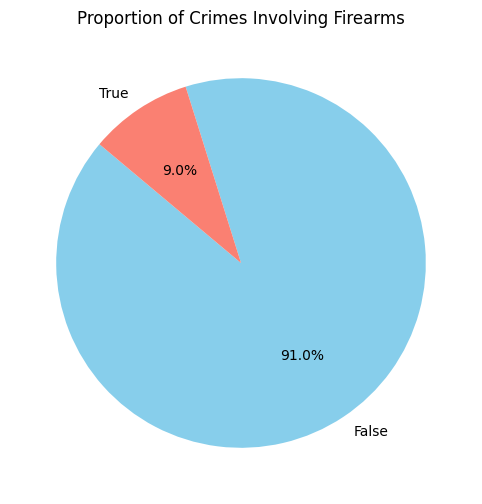

In [56]:
import matplotlib.pyplot as plt

# Define the pie chart function
def pie_fire_arm(data, title):
    plt.figure(figsize=(8, 6))
    data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
    plt.title(title)
    plt.ylabel('')  # Hide the y-label for a cleaner look
    plt.show()

# Ensure you have the firearm counts from filtered_data
firearm_counts = filtered_data['Firearm_Used_Flag'].value_counts()

# Call the function
pie_fire_arm(firearm_counts, 'Proportion of Crimes Involving Firearms')


Sex
M    20565
F     9726
U     1311
Name: count, dtype: int64



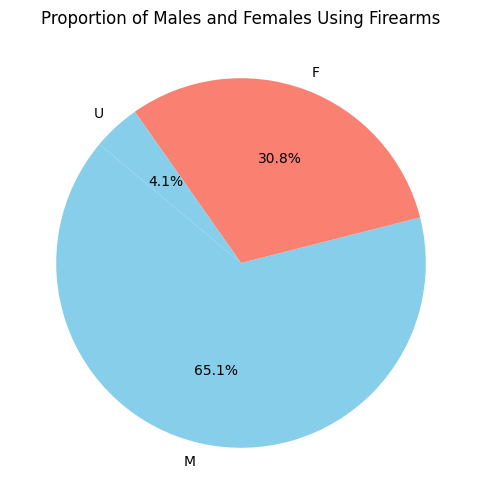

In [57]:
# Calculate the counts of each gender where 'Firearm_Used_Flag' is 1 in filtered_data
gen_firearm_used = filtered_data[filtered_data['Firearm_Used_Flag'] == 1]['Sex'].value_counts()

# Print the counts for verification
print(gen_firearm_used)
print()

# Plot the pie chart for the gender distribution of firearm usage
plt.figure(figsize=(8, 6))
gen_firearm_used.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title("Proportion of Males and Females Using Firearms")
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.show()


Unique values in DVFlag: ['False' 'True']
Total domestic violence cases: 31980


C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\1258240291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DVFlag'] = filtered_data['DVFlag'].astype(str)


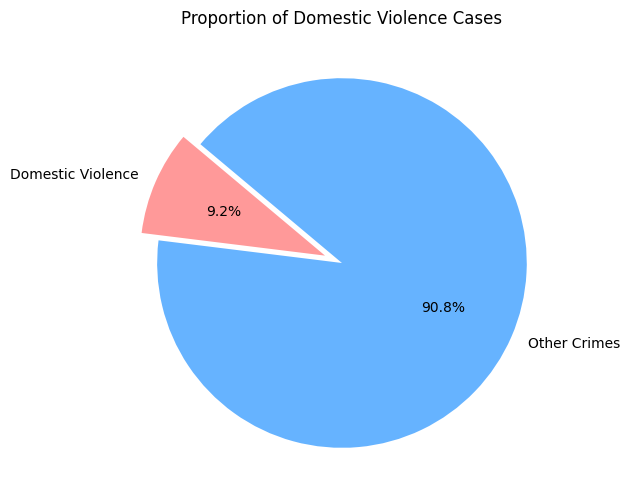

In [58]:
# Convert DVFlag to string in the filtered data
filtered_data['DVFlag'] = filtered_data['DVFlag'].astype(str)

# Check unique values in DVFlag to understand the contents
print("Unique values in DVFlag:", filtered_data['DVFlag'].unique())

# Filter for domestic violence cases
domestic_violence_cases = filtered_data[filtered_data['DVFlag'].isin(['True', 'Y'])].shape[0]
print("Total domestic violence cases:", domestic_violence_cases)

# Plotting the proportion of domestic violence cases
labels = ['Domestic Violence', 'Other Crimes']
sizes = [domestic_violence_cases, len(filtered_data) - domestic_violence_cases]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode the first slice (Domestic Violence)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Proportion of Domestic Violence Cases')
plt.show()


In [59]:
# Filter the data for arrests
arrest_data = filtered_data[filtered_data['Involvement'] == 'ARR']

# Group by Offense and count total arrests
arrest_counts = arrest_data.groupby('Offense').size().reset_index(name='total_arrests')

# Sort the data by total arrests in descending order
arrest_counts = arrest_counts.sort_values(by='total_arrests', ascending=False)

# Print the arrest counts for verification
print(arrest_counts)




                                              Offense  total_arrests
21                                        Stolen Auto             14
10                      Possession of Stolen Property              5
0                                Assault (Aggravated)              3
12                                    Property Damage              3
22                          Trespass of Real Property              3
5                       City/Municipal Warrant Arrest              2
3                                Burning or Exploding              2
20                                Stealing – Shoplift              2
19               Stealing from Auto (Theft from Auto)              2
15                               State Warrant Arrest              2
6   Felon/Prohibited Person in Possession of a Fir...              2
14                                 Robbery (Business)              2
1                          Burglary (Non-Residential)              1
13                              Re

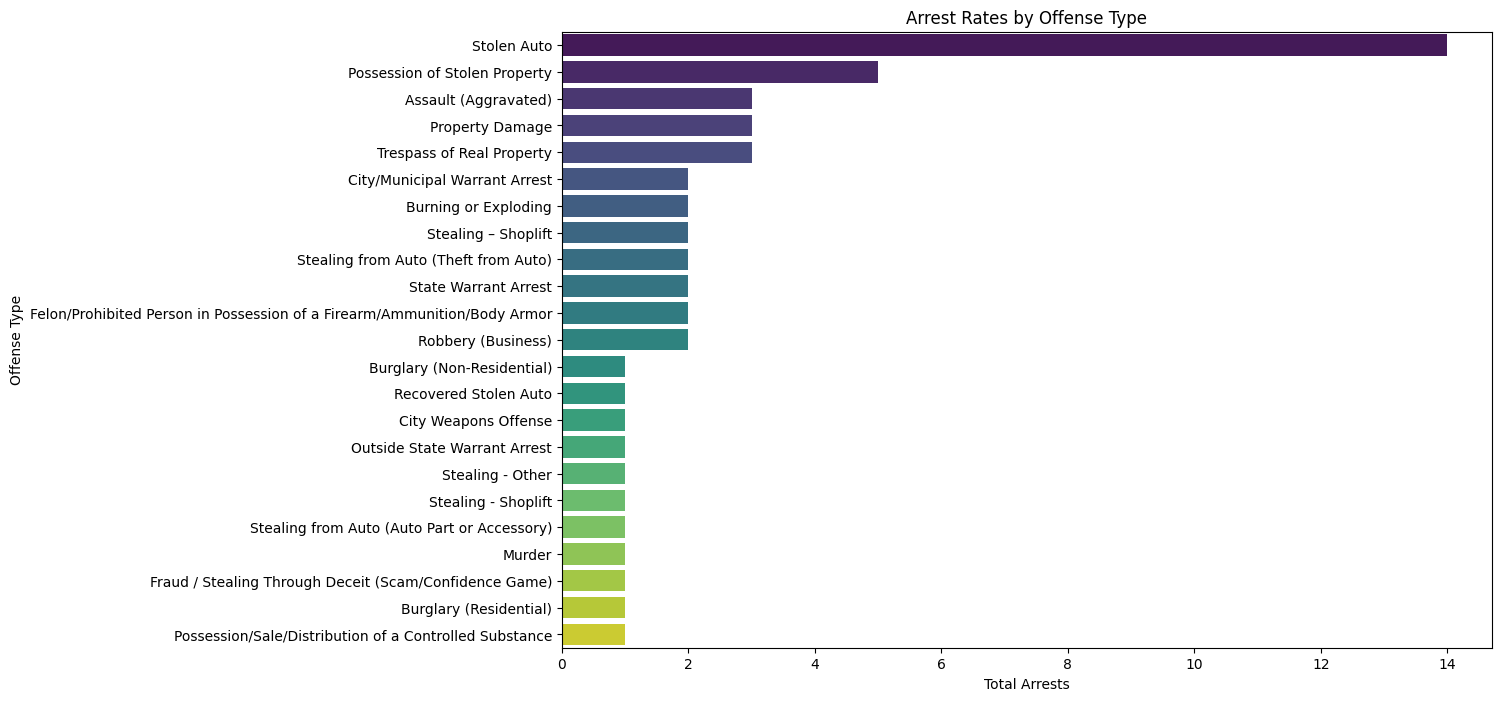

In [60]:
# Plotting the arrest rates by offense type
plt.figure(figsize=(12, 8))
sns.barplot(y='Offense', x='total_arrests', data=arrest_counts, palette='viridis')
plt.title('Arrest Rates by Offense Type')
plt.xlabel('Total Arrests')
plt.ylabel('Offense Type')
plt.show()

In [61]:
# Filter for victim involvement
victim_data_raw = filtered_data[filtered_data['Involvement'] == 'VIC']

# Group by Offense and Sex, counting the number of victims
victim_counts_raw = victim_data_raw.groupby(['Offense', 'Sex']).size().reset_index(name='victim_count')

# Print raw victim counts
print(victim_counts_raw)

# Filter to keep only offenses with more than 35 victims
victim_counts = victim_counts_raw[victim_counts_raw['victim_count'] > 35]

# Print filtered victim counts
print(victim_counts)

# Calculate the number of unique offenses and sexes
unique_offenses = victim_counts['Offense'].nunique()
unique_sexes = victim_counts['Sex'].nunique()

# Print the counts of unique offenses and sexes
print(f"Unique Offenses: {unique_offenses}")
print(f"Unique Sexes: {unique_sexes}")


                                       Offense Sex  victim_count
0                       Abandonment of a Child   F            11
1                       Abandonment of a Child   M             7
2                             Abuse of a Child   F           630
3                             Abuse of a Child   M           662
4                             Abuse of a Child   U             4
..                                         ...  ..           ...
356  Violation of Ex-Parte Order of Protection   F           534
357  Violation of Ex-Parte Order of Protection   M           149
358  Violation of Ex-Parte Order of Protection   U             3
359      Violation of Full Order of Protection   F           678
360      Violation of Full Order of Protection   M           181

[361 rows x 3 columns]
                                       Offense Sex  victim_count
2                             Abuse of a Child   F           630
3                             Abuse of a Child   M           662
7

In [62]:
# Define categories based on the offense types available
def categorize_offense(offense):
    if offense in ['Assault', 'Battery']:
        return 'Violent Offenses'
    elif offense in ['Theft', 'Burglary']:
        return 'Property Crimes'
    else:
        return 'Other'

# Apply categorization to the victim counts DataFrame
victim_counts['Offense_Category'] = victim_counts['Offense'].apply(categorize_offense)

# Re-group by the new offense categories
aggregated_counts = victim_counts.groupby(['Offense_Category', 'Sex']).sum().reset_index()

C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\1118387066.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_counts['Offense_Category'] = victim_counts['Offense'].apply(categorize_offense)


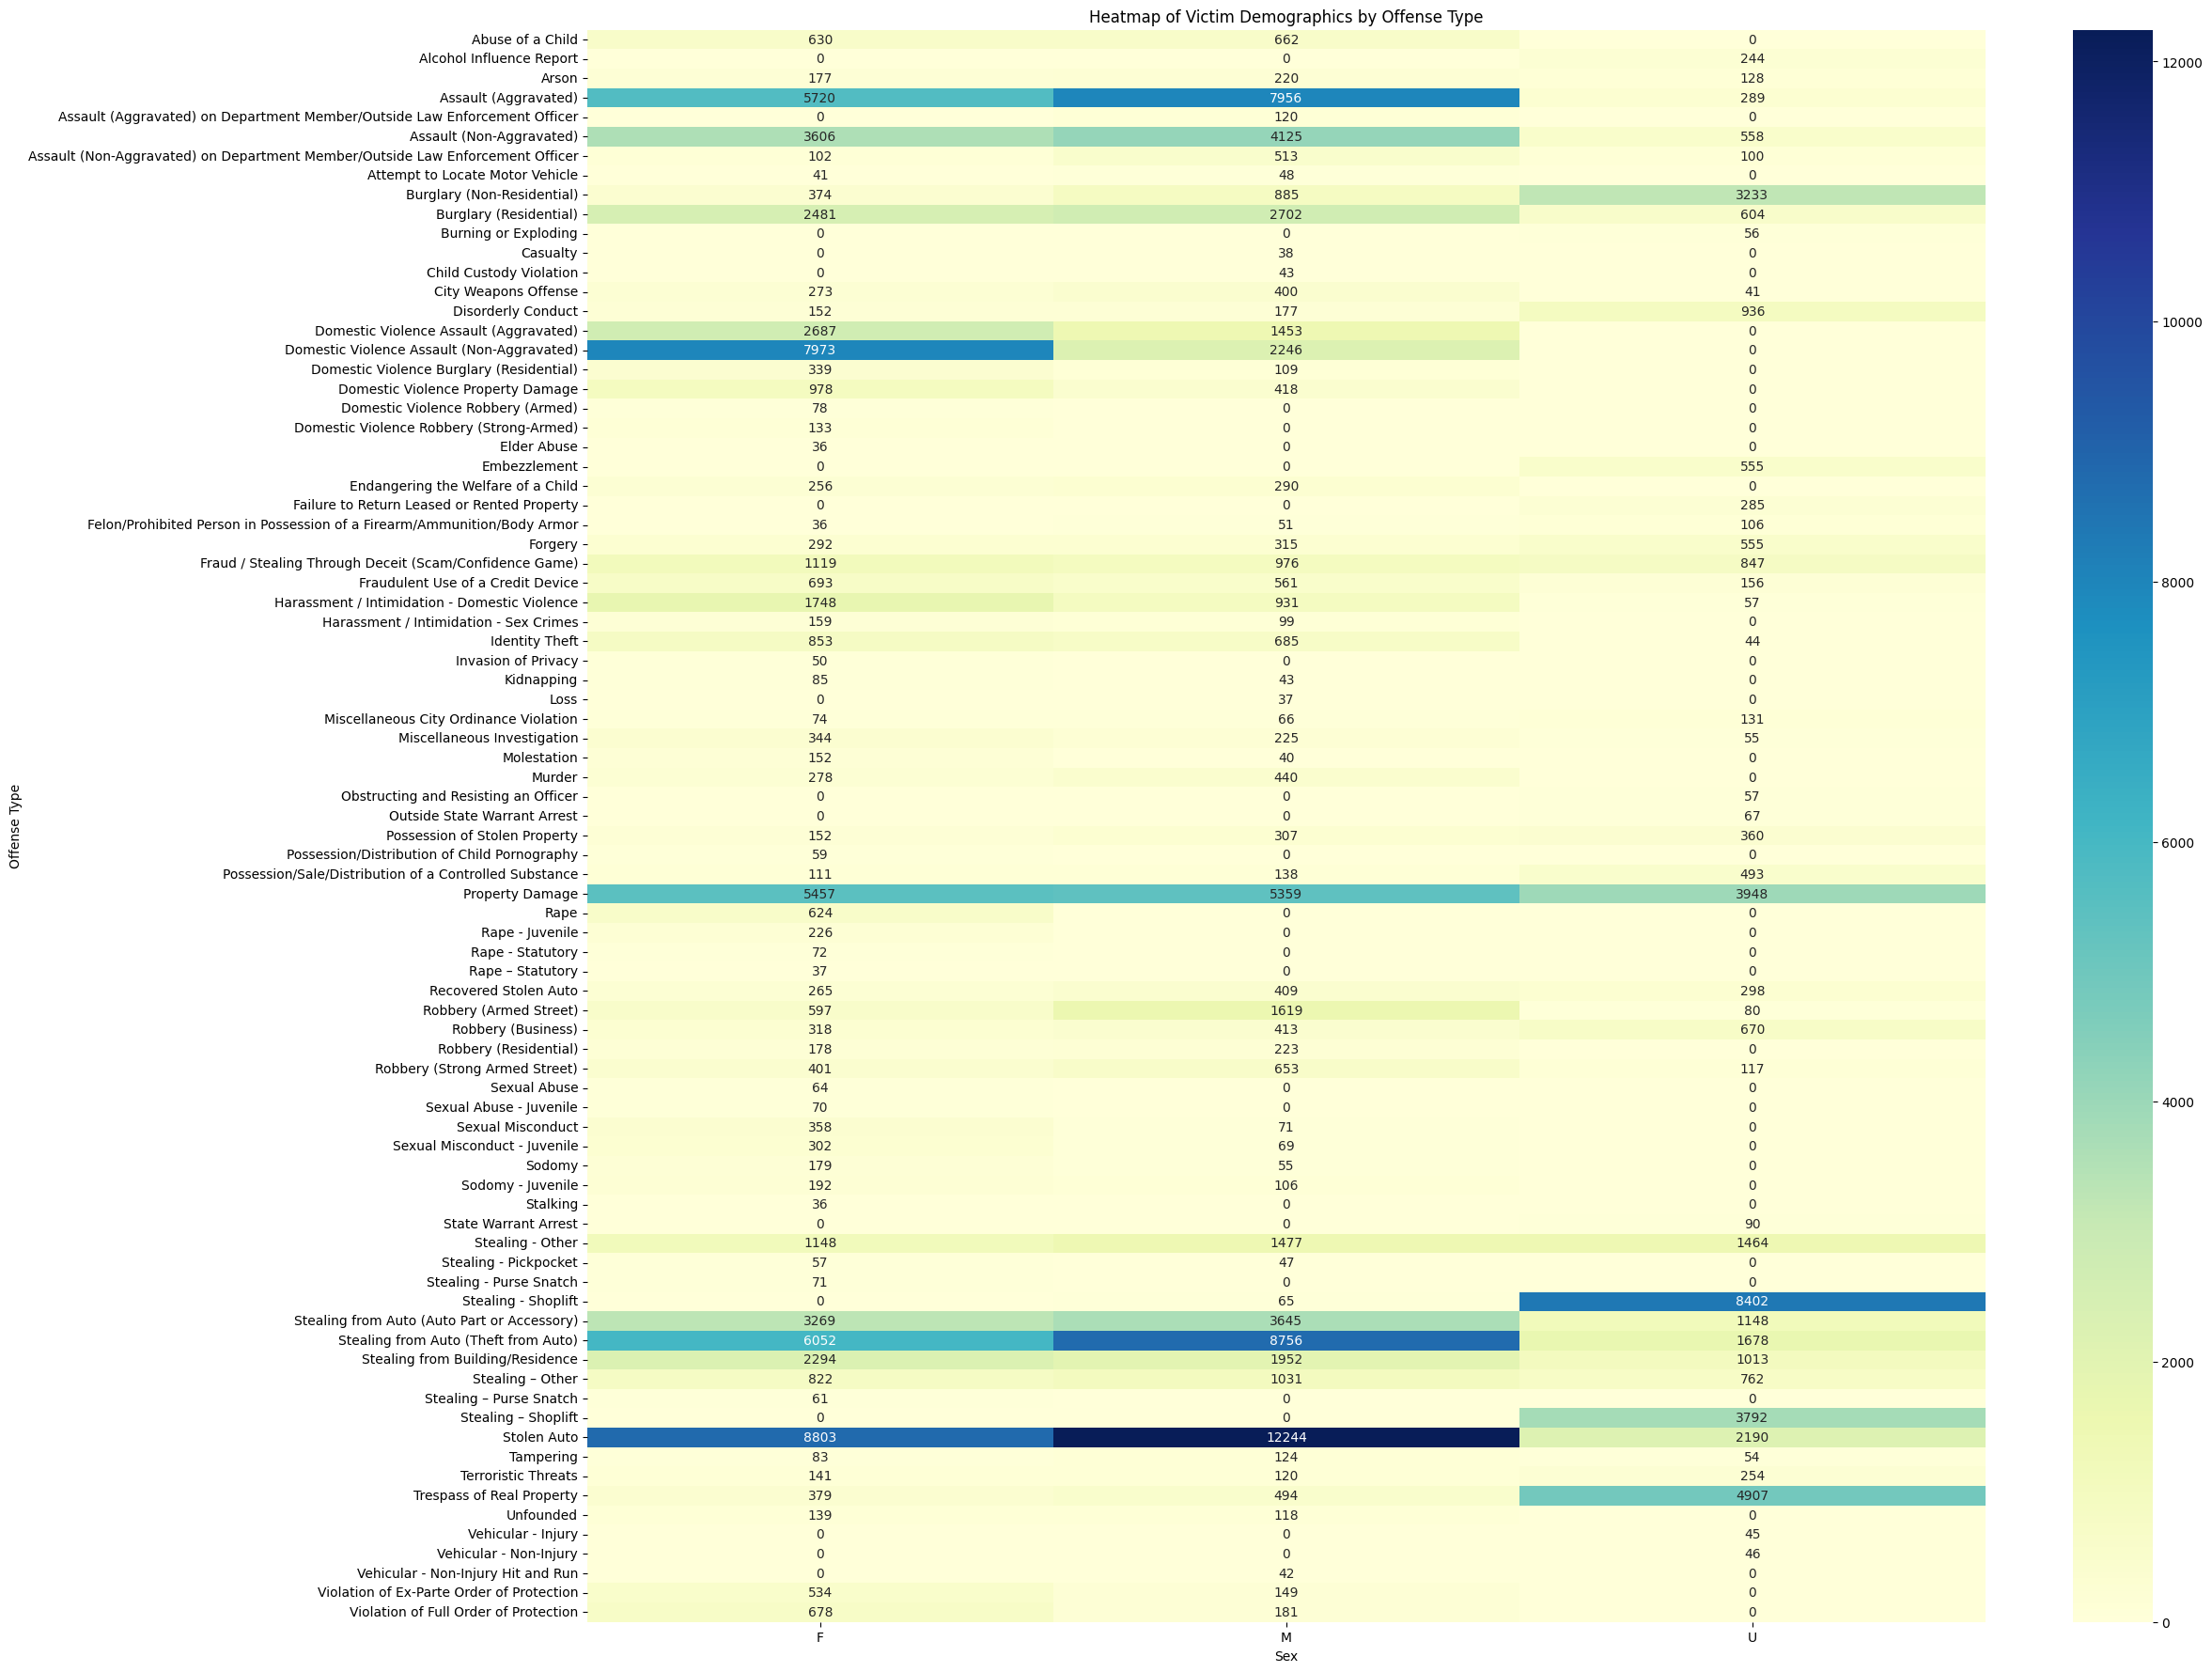

In [63]:
# Prepare data for heatmap
heatmap_data = victim_counts.pivot(index='Offense', columns='Sex', values='victim_count').fillna(0)

# Create the heatmap
plt.figure(figsize=(24, 22))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap of Victim Demographics by Offense Type')
plt.xlabel('Sex')
plt.ylabel('Offense Type')
plt.show()


In [64]:
### some more deep analysis

C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\1495529675.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Age Group'] = pd.cut(filtered_data['Age'], bins=age_bins, labels=age_labels, right=False)


<Figure size 1000x600 with 0 Axes>

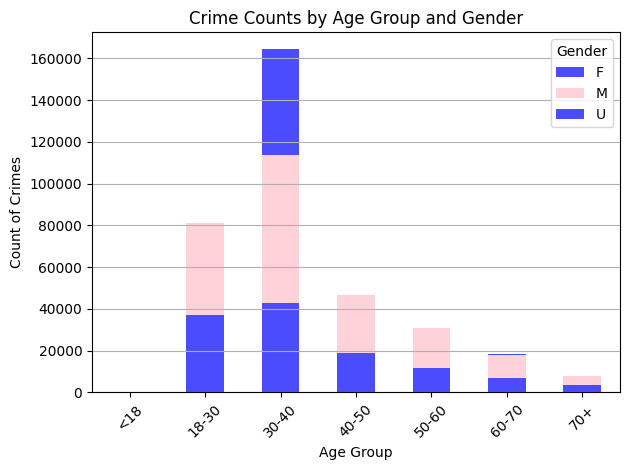

In [65]:
# Define age bins and labels
age_bins = [0, 18, 30, 40, 50, 60, 70, 100]
age_labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60-70', '70+']

# Create a new column for age groups
filtered_data['Age Group'] = pd.cut(filtered_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by Age Group and Gender
age_gender_counts = filtered_data.groupby(['Age Group', 'Sex']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
age_gender_counts.plot(kind='bar', stacked=True, color=['blue', 'pink'], alpha=0.7)
plt.title('Crime Counts by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


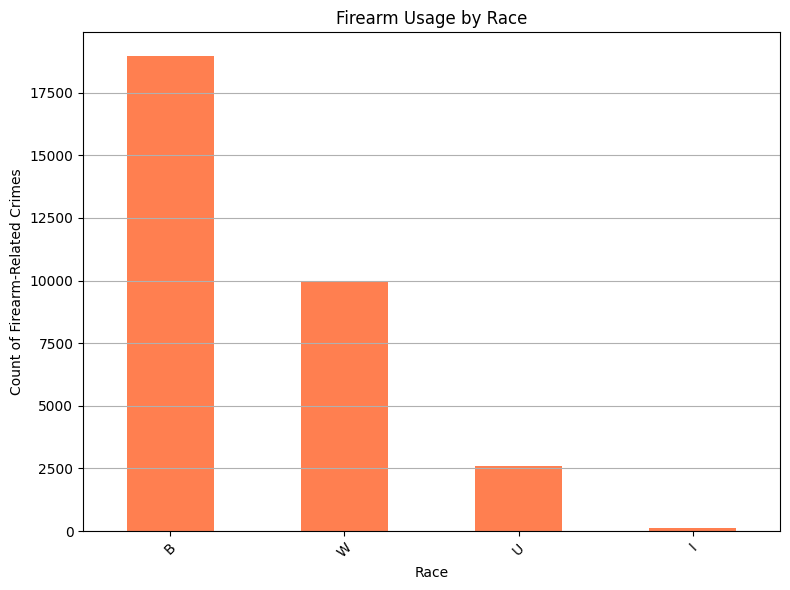

In [66]:
# Calculate counts of firearm usage by race
firearm_usage_by_race = filtered_data[filtered_data['Firearm_Used_Flag'] == 1]['Race'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
firearm_usage_by_race.plot(kind='bar', color='coral')
plt.title('Firearm Usage by Race')
plt.xlabel('Race')
plt.ylabel('Count of Firearm-Related Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


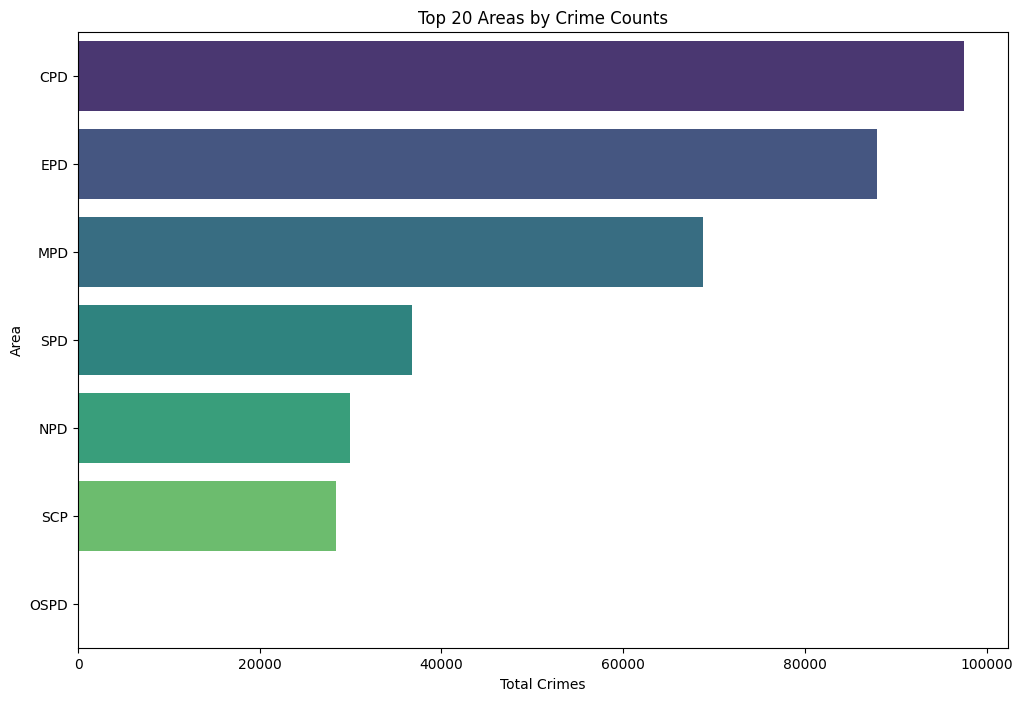

In [67]:
# Group by Area and count the number of crimes
area_crime_counts = filtered_data['Area'].value_counts().reset_index()
area_crime_counts.columns = ['Area', 'Total Crimes']

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Crimes', y='Area', data=area_crime_counts.head(20), palette='viridis')
plt.title('Top 20 Areas by Crime Counts')
plt.xlabel('Total Crimes')
plt.ylabel('Area')
plt.show()


<Figure size 1000x600 with 0 Axes>

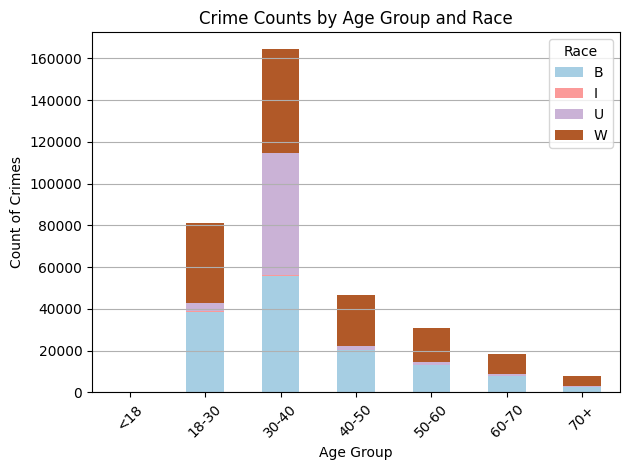

In [68]:
# Group by Age Group and Race
age_race_counts = filtered_data.groupby(['Age Group', 'Race']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
age_race_counts.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Crime Counts by Age Group and Race')
plt.xlabel('Age Group')
plt.ylabel('Count of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


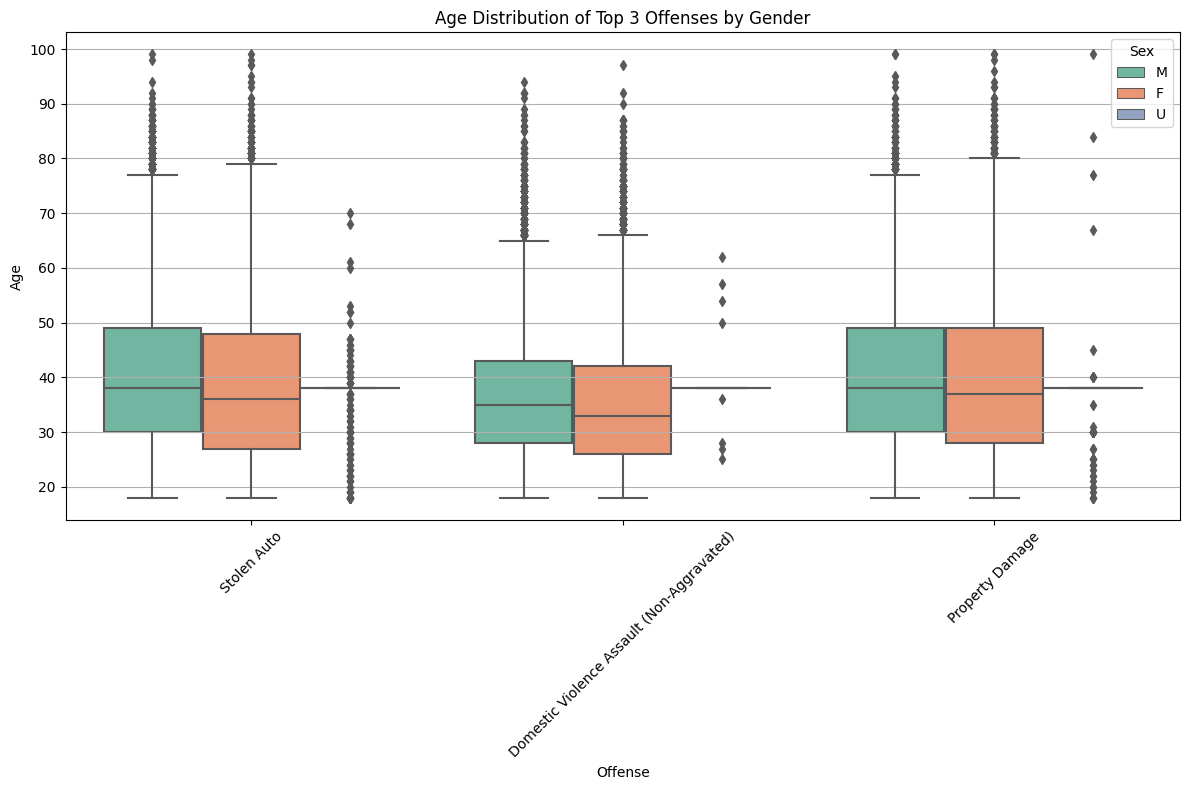

In [69]:
# 1. Age Distribution of Offenses by Gender

# Step 1: Identify the top 3 offenses by count
top_offenses = filtered_data['Offense'].value_counts().nlargest(3).index

# Step 2: Filter the data to include only top 3 offenses
top_offense_data = filtered_data[filtered_data['Offense'].isin(top_offenses)]

# Step 3: Create the box plot for top 3 offenses
plt.figure(figsize=(12, 8))
sns.boxplot(x='Offense', y='Age', hue='Sex', data=top_offense_data, palette='Set2')
plt.title('Age Distribution of Top 3 Offenses by Gender')
plt.xlabel('Offense')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

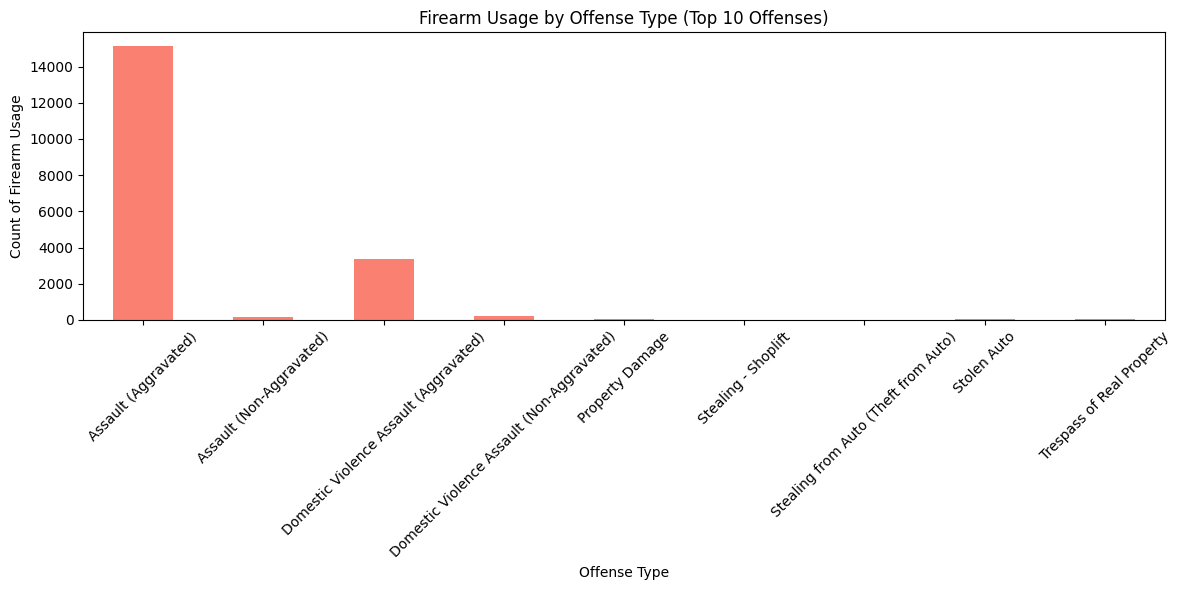

In [70]:
# Step 1: Count the occurrences of each offense
offense_counts = filtered_data['Offense'].value_counts()

# Step 2: Get the top 10 offenses
top_offenses = offense_counts.nlargest(10).index

# Step 3: Filter the data for top 10 offenses and count firearm usage
firearm_counts = filtered_data[
    (filtered_data['Firearm_Used_Flag'] == 1) & 
    (filtered_data['Offense'].isin(top_offenses))
].groupby('Offense').size()

# Step 4: Create a bar plot for firearm usage by offense type
plt.figure(figsize=(12, 6))
firearm_counts.plot(kind='bar', color='salmon')
plt.title('Firearm Usage by Offense Type (Top 10 Offenses)')
plt.xlabel('Offense Type')
plt.ylabel('Count of Firearm Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


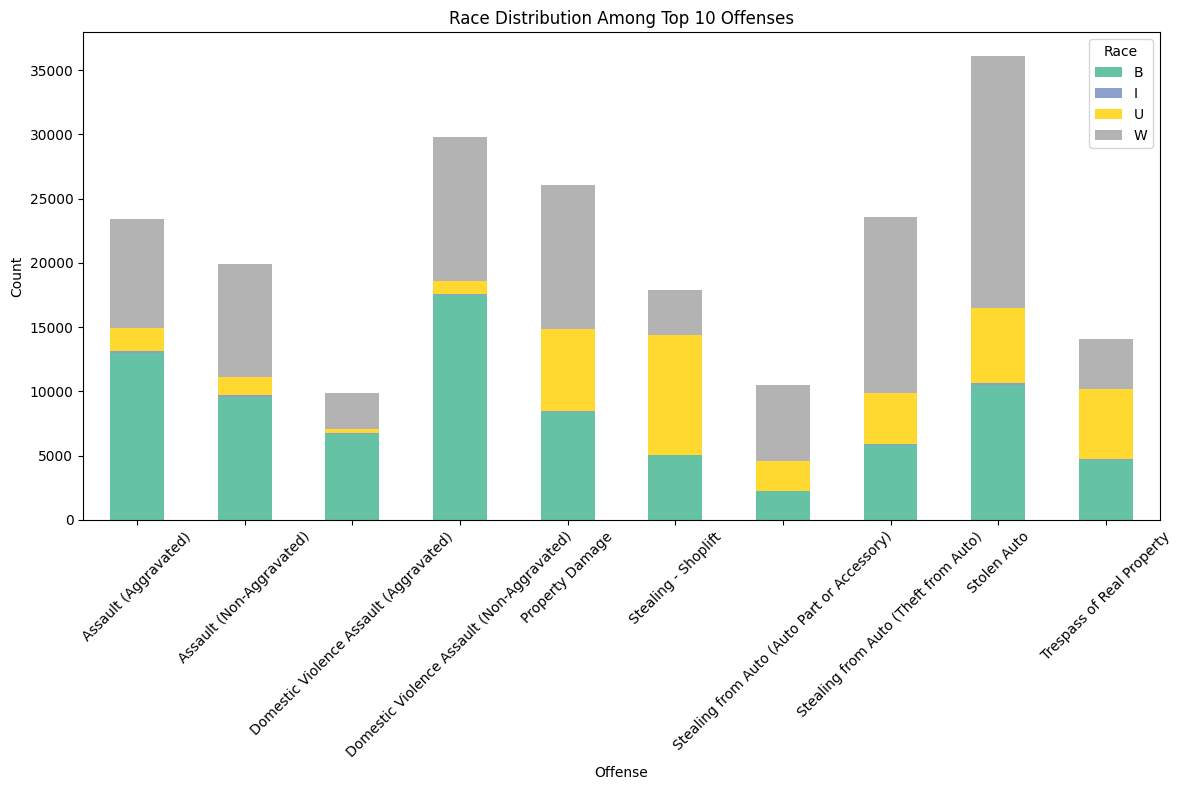

In [71]:
# 3. Race Distribution Among Offenses
# Step 1: Count the occurrences of each offense
offense_counts = filtered_data['Offense'].value_counts()

# Step 2: Get the top 10 offenses
top_offenses = offense_counts.nlargest(10).index

# Step 3: Filter the data for top 10 offenses and group by Race and Offense
race_offense_counts = filtered_data[filtered_data['Offense'].isin(top_offenses)].groupby(['Offense', 'Race']).size().unstack().fillna(0)

# Step 4: Create a stacked bar plot for race distribution among offenses
race_offense_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')
plt.title('Race Distribution Among Top 10 Offenses')
plt.xlabel('Offense')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\2969754368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Age Group'] = pd.cut(filtered_data['Age'], bins=age_bins, labels=age_labels, right=False)


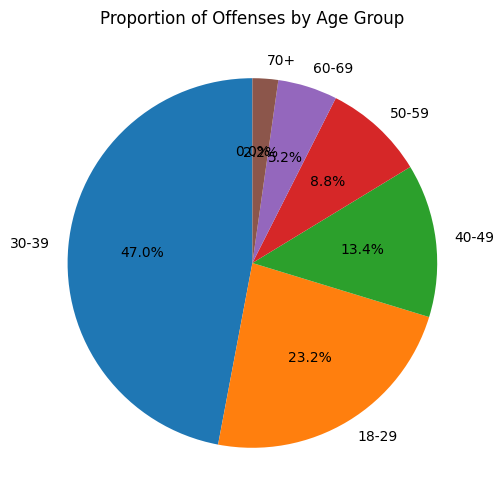

In [72]:
# Creating age bins and labels for age groups with 70+ grouping
age_bins = [0, 18, 30, 40, 50, 60, 70, 100]  # Adjusted the last bin to group 70+ together
age_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']  # Changed the last label to '70+'
filtered_data['Age Group'] = pd.cut(filtered_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Counting occurrences of each age group
age_group_counts = filtered_data['Age Group'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Offenses by Age Group')
plt.ylabel('')
plt.show()


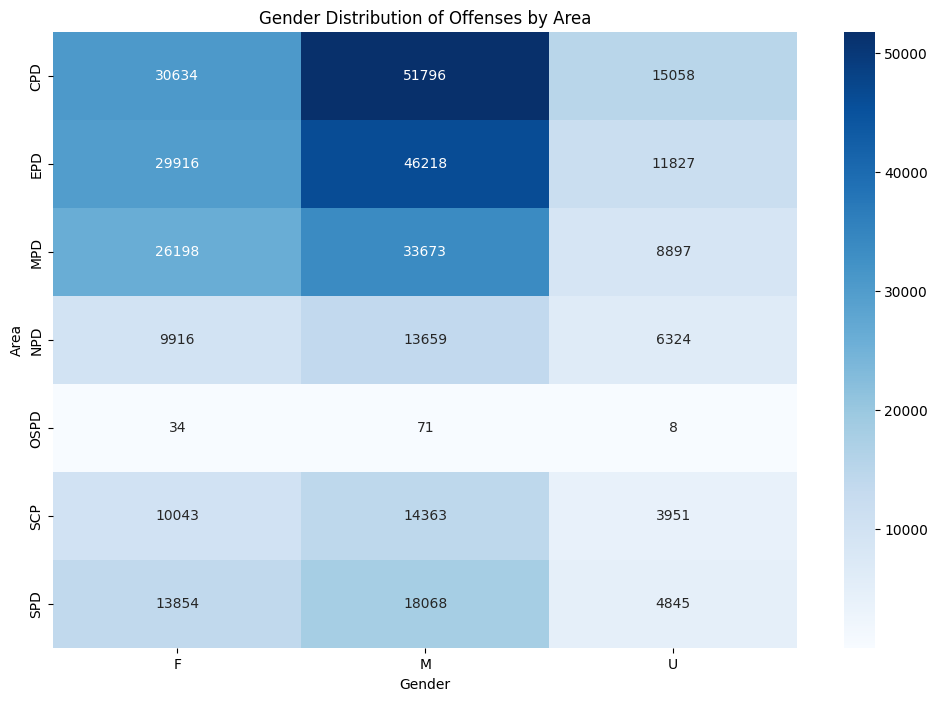

In [74]:
# 5. Gender Distribution of Offenses by Area

area_gender_counts = filtered_data.groupby(['Area', 'Sex']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(area_gender_counts, annot=True, fmt='d', cmap='Blues')
plt.title('Gender Distribution of Offenses by Area')
plt.xlabel('Gender')
plt.ylabel('Area')
plt.show()


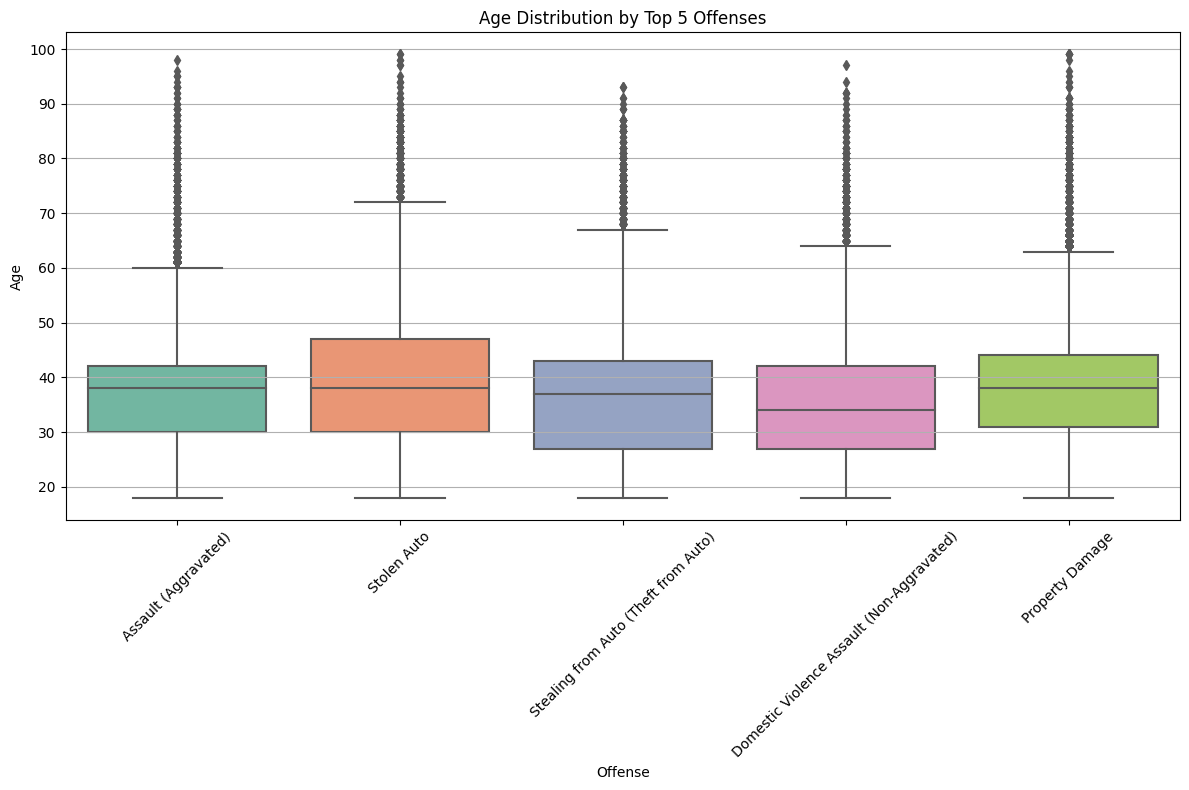

In [75]:
# Grouping the data by 'Offense' to get the top 5 offenses
top_offenses = filtered_data['Offense'].value_counts().nlargest(5).index

# Filtering the dataset for top 5 offenses
filtered_top5_data = filtered_data[filtered_data['Offense'].isin(top_offenses)]

# Creating the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Offense', y='Age', data=filtered_top5_data, palette='Set2')
plt.title('Age Distribution by Top 5 Offenses')
plt.xlabel('Offense')
plt.ylabel('Age')
plt.grid(axis='y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


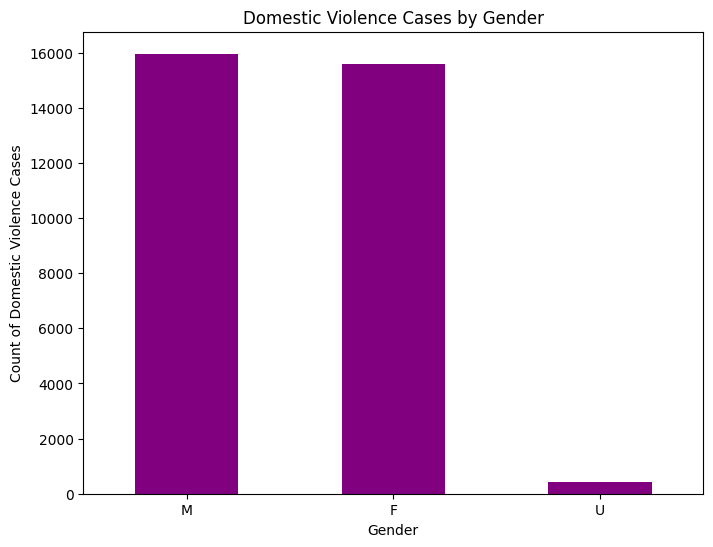

In [76]:
# 8. Comparison of Domestic Violence Cases by Gender

dv_gender_counts = filtered_data[filtered_data['DVFlag'] == 'True']['Sex'].value_counts()
plt.figure(figsize=(8, 6))
dv_gender_counts.plot(kind='bar', color='purple')
plt.title('Domestic Violence Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Domestic Violence Cases')
plt.xticks(rotation=0)
plt.show()


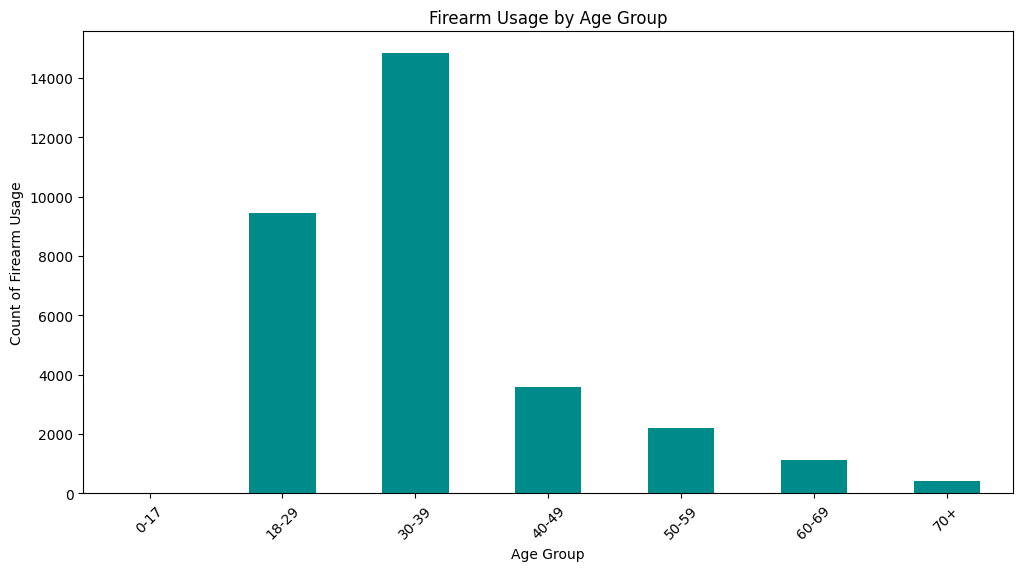

In [77]:
# 9. Firearm Usage by Age Group

firearm_age_counts = filtered_data[filtered_data['Firearm_Used_Flag'] == 1].groupby('Age Group').size()
plt.figure(figsize=(12, 6))
firearm_age_counts.plot(kind='bar', color='darkcyan')
plt.title('Firearm Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Firearm Usage')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x800 with 0 Axes>

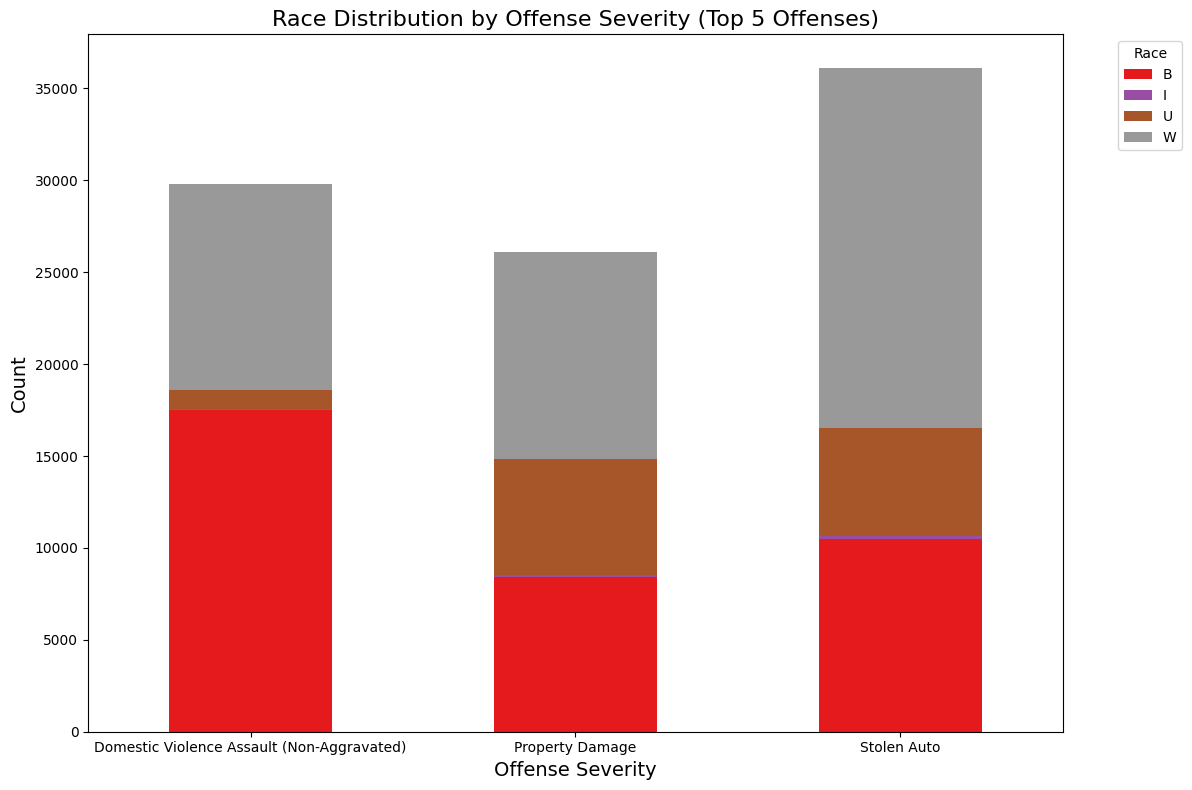

In [78]:
# Get the top 5 offenses based on count
top_offenses = filtered_data['Offense'].value_counts().nlargest(3).index

# Filter the dataset for the top 5 offenses
filtered_top5_data = filtered_data[filtered_data['Offense'].isin(top_offenses)]

# Grouping the data by 'Offense' and 'Race' to get the counts
severity_race_counts = filtered_top5_data.groupby(['Offense', 'Race']).size().unstack().fillna(0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
severity_race_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set1')
plt.title('Race Distribution by Offense Severity (Top 5 Offenses)', fontsize=16)
plt.xlabel('Offense Severity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot
plt.tight_layout()  # Adjust layout
plt.show()


C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\3817664191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Reported_Hour'] = filtered_data['Reported_hour'] + filtered_data['Reported_minute'] / 60


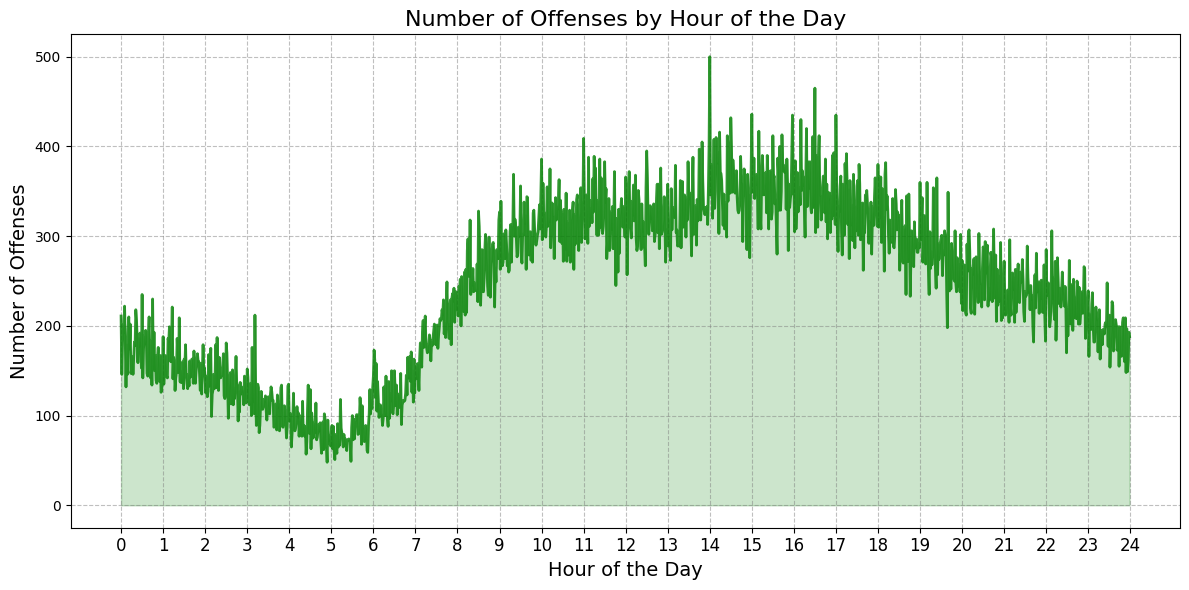

In [79]:
# 11 Calculate reported hour in decimal format
filtered_data['Reported_Hour'] = filtered_data['Reported_hour'] + filtered_data['Reported_minute'] / 60

# Count the number of offenses by reported hour
hourly_offense_counts = filtered_data.groupby('Reported_Hour').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(hourly_offense_counts.index, hourly_offense_counts, color='green', linewidth=2, alpha=0.8)  # Single line plot
plt.fill_between(hourly_offense_counts.index, hourly_offense_counts, color='green', alpha=0.2)  # Optional area fill

# Enhancing the plot
plt.title('Number of Offenses by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Offenses', fontsize=14)
plt.xticks(range(0, 25), fontsize=12)  # Show 0-24 for hours
plt.grid(color='gray', linestyle='--', alpha=0.5)  # Lighter grid lines for readability
plt.tight_layout()  # Adjust layout
plt.show()


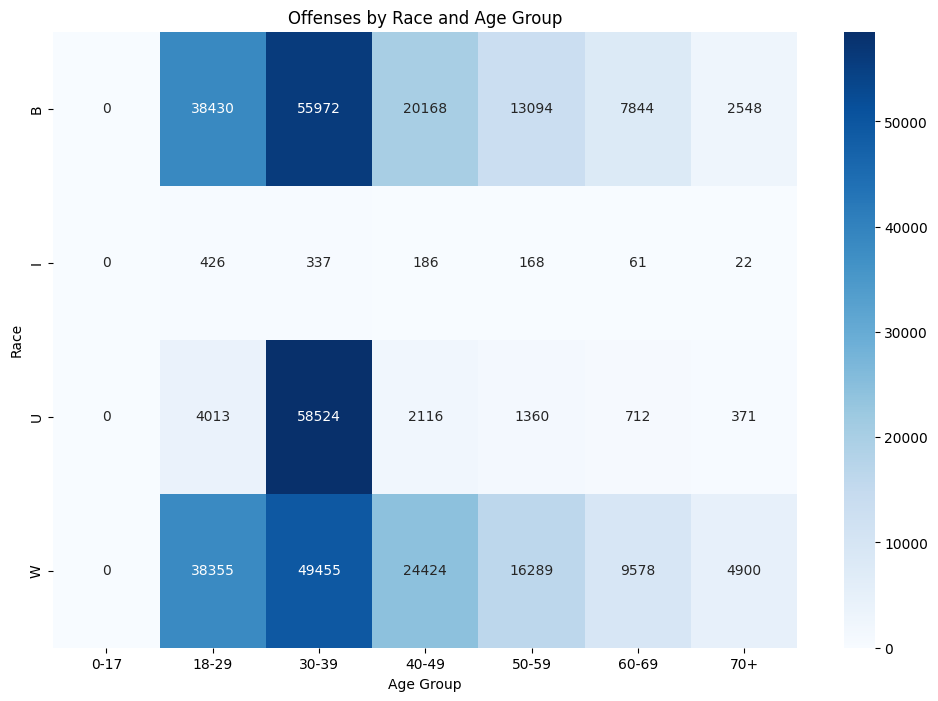

In [80]:
# 12. Heatmap of Offenses by Race and Age Group

race_age_heatmap_data = filtered_data.pivot_table(index='Race', columns='Age Group', values='Offense', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(race_age_heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Offenses by Race and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Race')
plt.show()


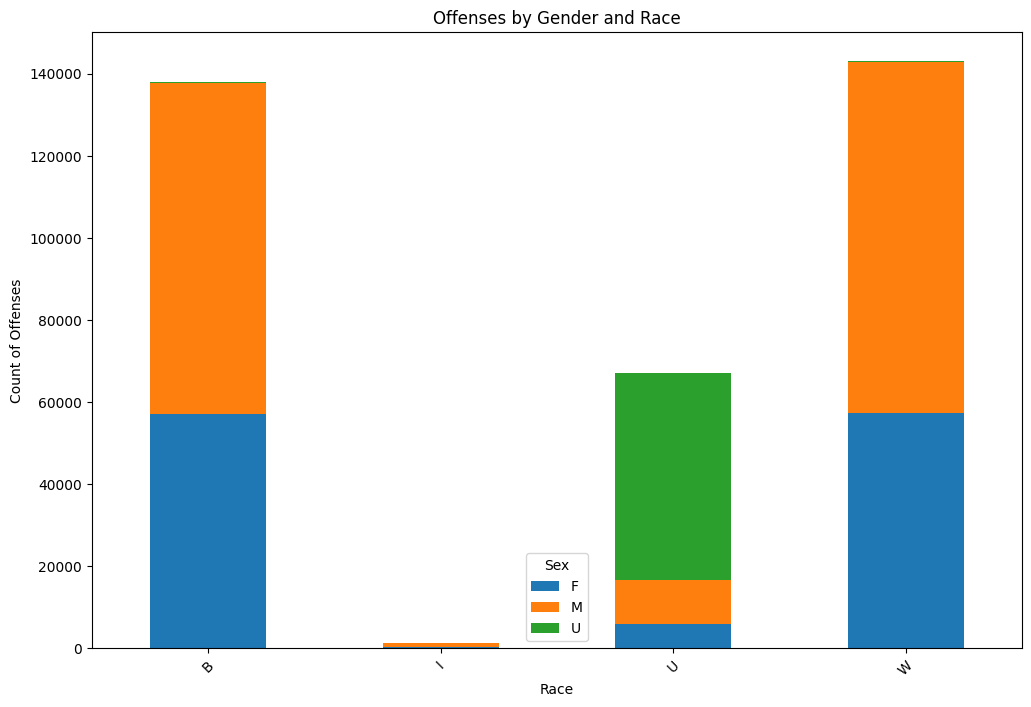

In [81]:
#13. Gender and Race Interaction in Offenses

gender_race_counts = filtered_data.groupby(['Race', 'Sex']).size().unstack(fill_value=0)
gender_race_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Offenses by Gender and Race')
plt.xlabel('Race')
plt.ylabel('Count of Offenses')
plt.xticks(rotation=45)
plt.show()


In [82]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349353 entries, 0 to 349566
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Report_No          349353 non-null  object  
 1   Reported_year      349353 non-null  int64   
 2   Reported_month     349353 non-null  int64   
 3   Reported_day       349353 non-null  int64   
 4   Reported_hour      349353 non-null  int64   
 5   Reported_minute    349353 non-null  int64   
 6   From_year          349353 non-null  int64   
 7   From_month         349353 non-null  int64   
 8   From_day           349353 non-null  int64   
 9   From_hour          349353 non-null  int64   
 10  From_minute        349353 non-null  int64   
 11  Offense            349353 non-null  object  
 12  IBRS               349353 non-null  object  
 13  Description        349353 non-null  object  
 14  Beat               349353 non-null  float64 
 15  Address            349353 non-null  obj

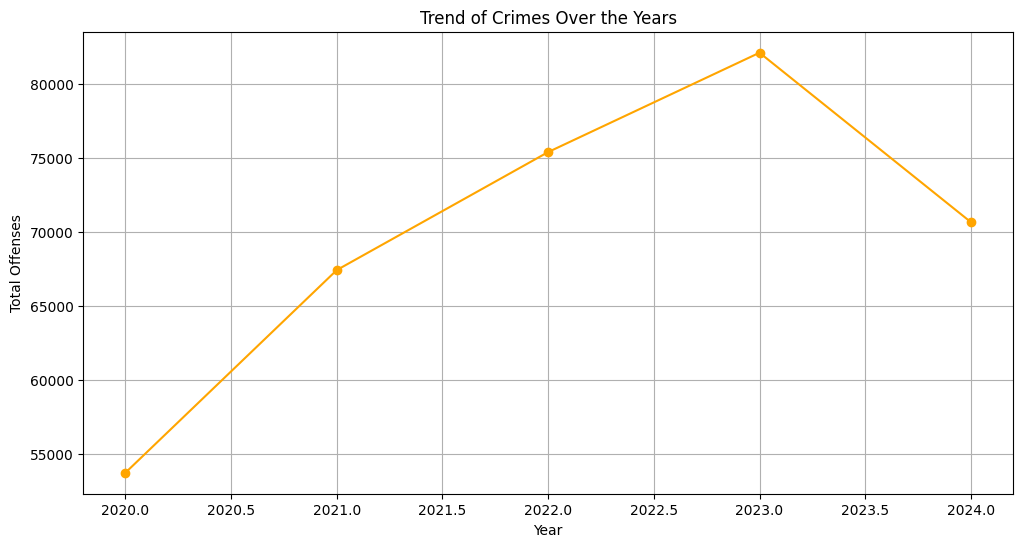

In [83]:
# 15. Trend of Crimes Over Years

# Use the correct column name for the year
yearly_offense_counts = filtered_data['Reported_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
yearly_offense_counts.plot(kind='line', marker='o', color='orange')
plt.title('Trend of Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Offenses')
plt.grid()

# Display the plot
plt.show()


C:\Users\kamal\AppData\Local\Temp\ipykernel_14932\3811342989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month_Year'] = filtered_data['Reported_month'].astype(str) + '-' + filtered_data['Reported_year'].astype(str)


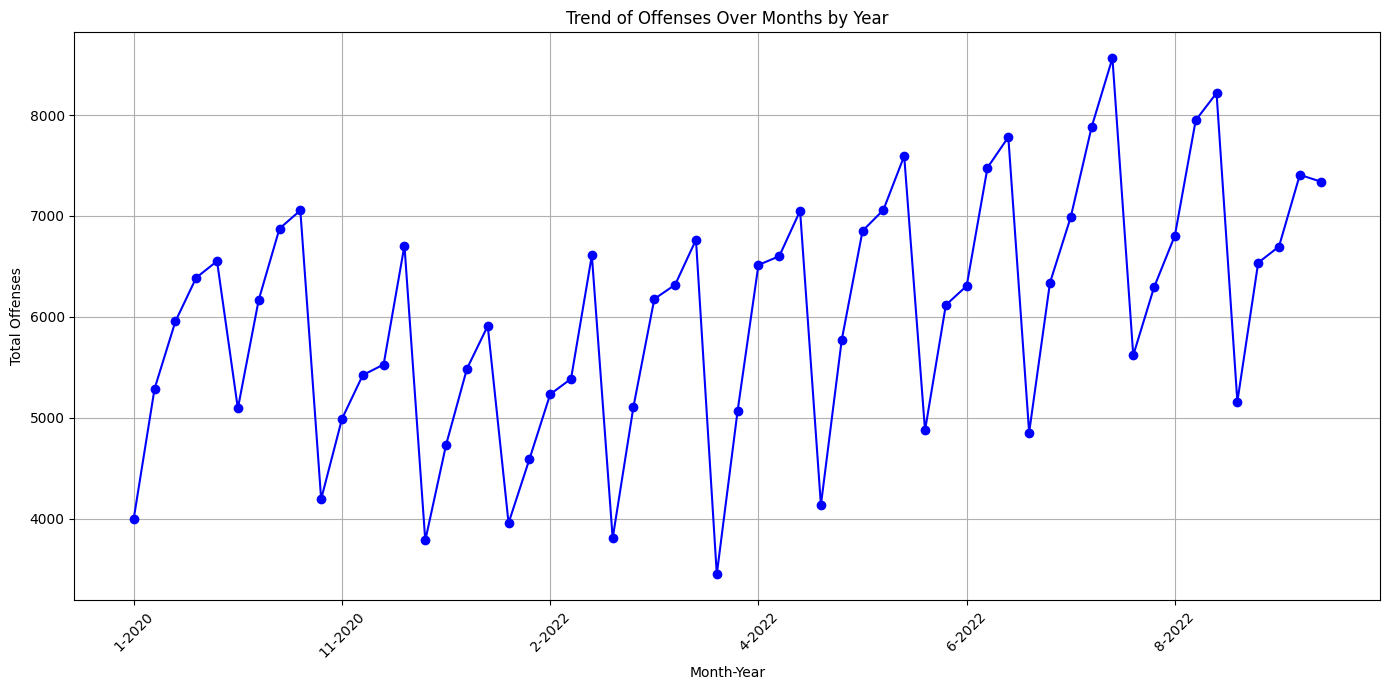

In [84]:
# 16. Trend of Offenses Over Months by Year

# Create a new column for Month-Year for better aggregation
filtered_data['Month_Year'] = filtered_data['Reported_month'].astype(str) + '-' + filtered_data['Reported_year'].astype(str)

# Grouping by 'Month-Year' to get the counts of offenses
monthly_offense_counts = filtered_data.groupby('Month_Year').size()

# Plotting the trend
plt.figure(figsize=(14, 7))
monthly_offense_counts.plot(kind='line', marker='o', color='blue')
plt.title('Trend of Offenses Over Months by Year')
plt.xlabel('Month-Year')
plt.ylabel('Total Offenses')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


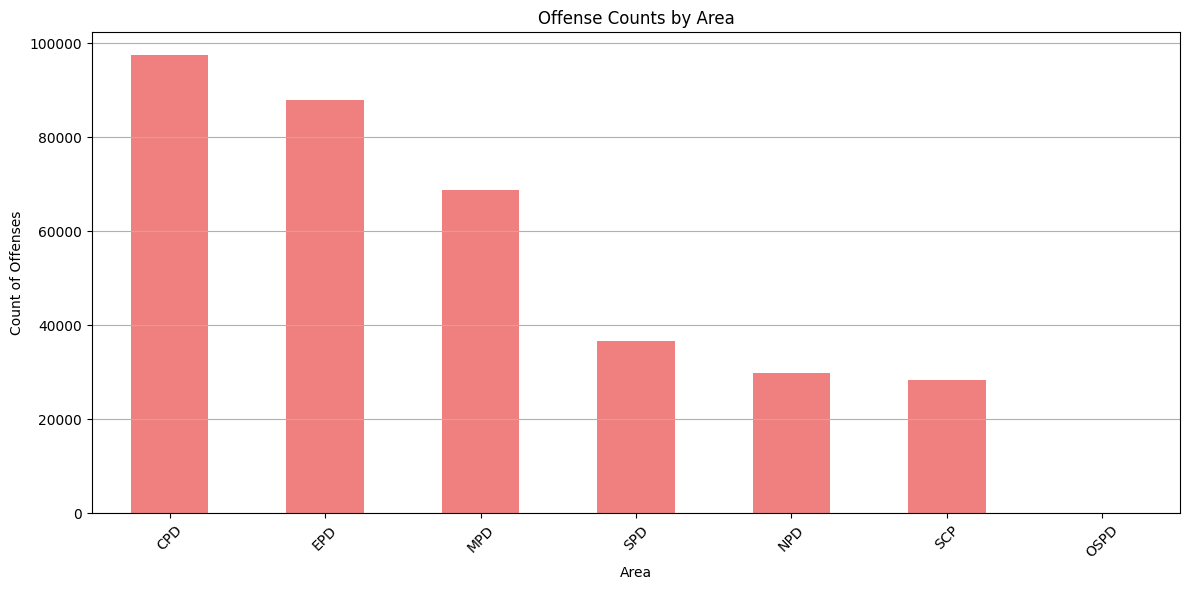

In [85]:
# 18. Offense Counts by Area
plt.figure(figsize=(12, 6))
filtered_data['Area'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Offense Counts by Area')
plt.xlabel('Area')
plt.ylabel('Count of Offenses')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


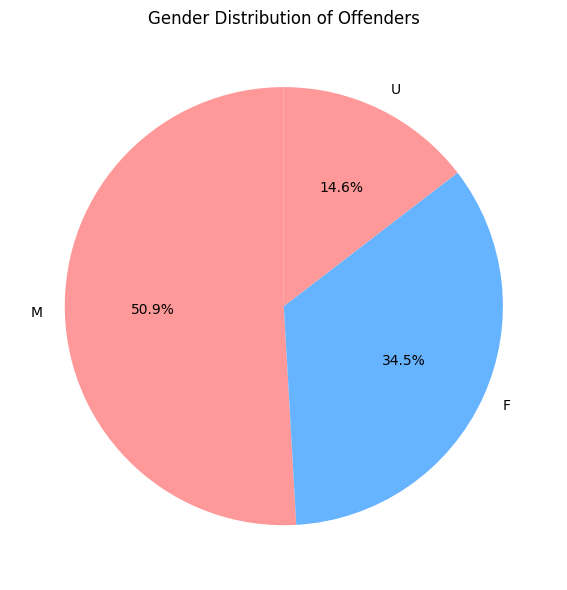

In [86]:
# 19. Gender Distribution of Offenders
plt.figure(figsize=(8, 6))
filtered_data['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B3FF'])
plt.title('Gender Distribution of Offenders')
plt.ylabel('')  # Remove the y-label for a cleaner look
plt.tight_layout()
plt.show()


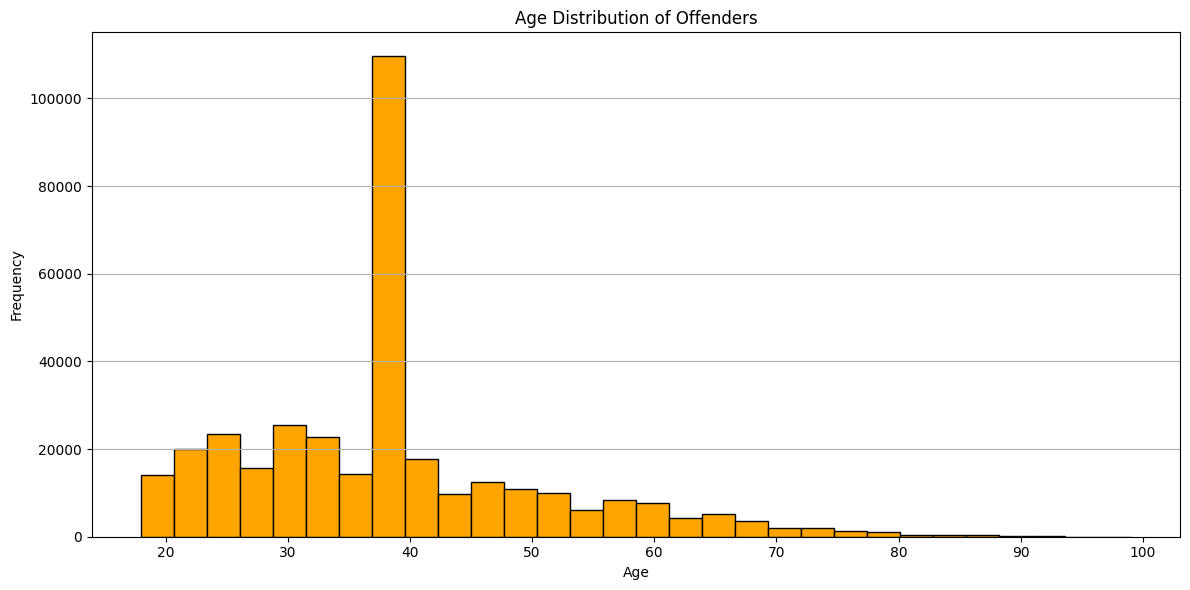

In [87]:
# 20. Age Distribution of Offenders
plt.figure(figsize=(12, 6))
filtered_data['Age'].plot(kind='hist', bins=30, color='orange', edgecolor='black')
plt.title('Age Distribution of Offenders')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


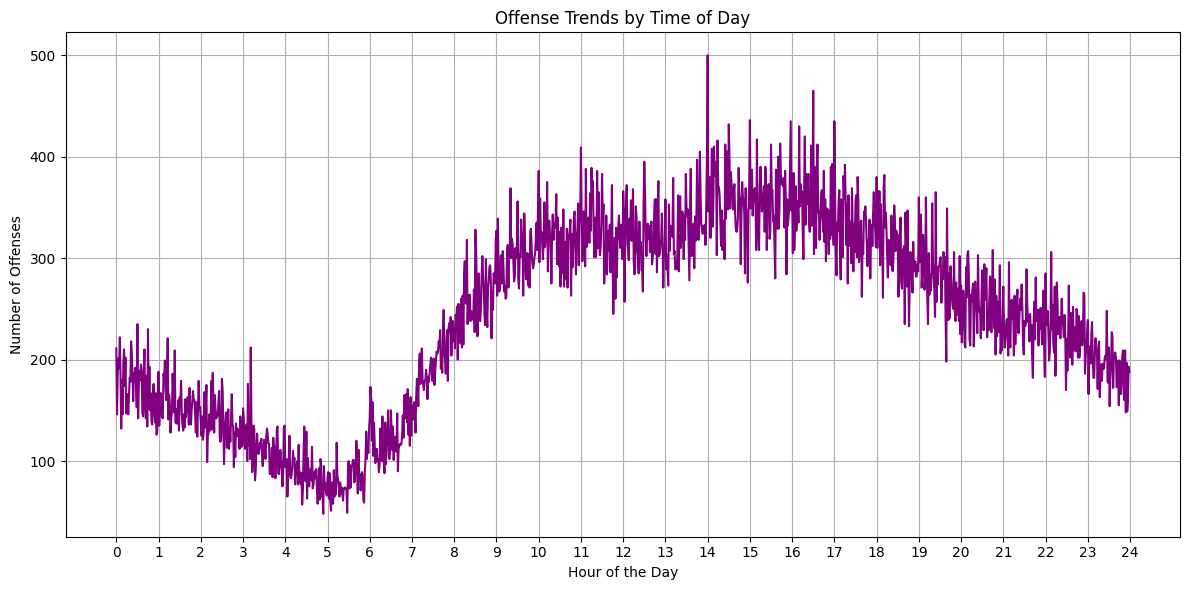

In [88]:
# 21. Offense Trends by Time of Day - Simplified Line Graph
plt.figure(figsize=(12, 6))
hourly_offense_counts = filtered_data['Reported_Hour'].value_counts().sort_index()

# Plotting the line graph without markers
hourly_offense_counts.plot(kind='line', color='purple')
plt.title('Offense Trends by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Offenses')
plt.xticks(range(0, 25))
plt.grid()
plt.tight_layout()
plt.show()


In [89]:
filtered_data.to_csv('datasets/filtered_data.csv', index=False)

In [90]:
filtered_data.size


10829943

In [91]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349353 entries, 0 to 349566
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Report_No          349353 non-null  object  
 1   Reported_year      349353 non-null  int64   
 2   Reported_month     349353 non-null  int64   
 3   Reported_day       349353 non-null  int64   
 4   Reported_hour      349353 non-null  int64   
 5   Reported_minute    349353 non-null  int64   
 6   From_year          349353 non-null  int64   
 7   From_month         349353 non-null  int64   
 8   From_day           349353 non-null  int64   
 9   From_hour          349353 non-null  int64   
 10  From_minute        349353 non-null  int64   
 11  Offense            349353 non-null  object  
 12  IBRS               349353 non-null  object  
 13  Description        349353 non-null  object  
 14  Beat               349353 non-null  float64 
 15  Address            349353 non-null  obj

In [92]:
filtered_data.describe()

Reported_year  Reported_month   Reported_day  Reported_hour  \
count  349353.000000   349353.000000  349353.000000  349353.000000   
mean     2022.139257        6.391384      15.523367      12.948536   
std         1.353800        3.249219       8.795136       6.066957   
min      2020.000000        1.000000       1.000000       0.000000   
25%      2021.000000        4.000000       8.000000       9.000000   
50%      2022.000000        6.000000      15.000000      13.000000   
75%      2023.000000        9.000000      23.000000      18.000000   
max      2024.000000       12.000000      31.000000      23.000000   

       Reported_minute      From_year     From_month       From_day  \
count    349353.000000  349353.000000  349353.000000  349353.000000   
mean         29.306109    2022.109428       6.398663      15.480820   
std          17.329183       1.494699       3.256788       8.843981   
min           0.000000    1922.000000       1.000000       1.000000   
25%          14.000000    2021.000000       4.000000       8.000000   
50%          29.000000    2022.000000       7.000000      15.000000   
75%          44.000000    2023.000000       9.000000      23.000000   
max          59.000000    2024.000000      12.000000      31.000000   

           From_hour    From_minute           Beat            Age  \
count  349353.000000  349353.000000  349353.000000  349353.000000   
mean       13.149737      21.596508     307.084124      38.382859   
std         6.824653      18.839258     162.383947      12.232876   
min         0.000000       0.000000     109.000000      18.000000   
25%         8.000000       0.000000     141.000000      30.000000   
50%        14.000000      20.000000     312.000000      38.000000   
75%        19.000000      37.000000     414.000000      42.000000   
max        23.000000      59.000000     999.000000      99.000000   

       Reported_Hour  
count  349353.000000  
mean       13.436971  
std         6.071362  
min         0.000000  
25%         9.433333  
50%        13.966667  
75%        18.133333  
max        23.983333